# 1 Description

HELP International is an international NGO that is dedicated to fighting poverty and providing amenities and relief for people of backward countries. The NGO needs to decide which countries are in the most acute need of aid to use the money strategically and efficiently. To achieve this goal, the countries need to be categorized into groups.

This project aims at categorizing the countries according to some socio-economic and health factors and thus suggesting the countries that the NGO should focus on the most.

This project can be found on GitHub: https://github.com/spaceship-glitch/countries.

The dataset is from Kaggle: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data.

The dataset consists of two files:
- Country-data.csv: contains socio-economic and health factors of the countries.
- data-dictionary.csv: contains the description of each column from the file `Country-data.csv`.

Description of columns of `Country-data.csv`:
- country: Name of the country.
- child_mort: Death of children under 5 years of age per 1000 live births.
- exports: Exports of goods and services per capita. Given as percentage of the GDP per capita.
- health: Total health spending per capita. Given as percentage of GDP per capita.
- imports: Imports of goods and services per capita. Given as percentage of the GDP per capita.
- income: Net income per person.
- inflation: The measurement of the annual growth rate of the Total GDP.
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same.
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

This is an **unsupervised learning** problem, specifically a **clustering** problem.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA, NMF
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
import warnings
import os
from IPython.display import display

# 2 Exploratory Data Analysis (EDA)

In [2]:
# load data
desc = pd.read_csv('data/data-dictionary.csv')
country = pd.read_csv('data/Country-data.csv')

country_original = country.copy()

---
## 2.1 Basic Information
First, I show some basic information of the dataset.

In [3]:
# description of columns of country
pd.set_option('max_colwidth', 300)
desc

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [4]:
# country data
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


---
According to the above outputs, there are 167 rows and 10 columns in the country data. 

## 2.2 Examination of invalid values and duplicated rows
Next, I check whether there are invalid values or duplicated rows.

In [7]:
print("Count of null values: {}".format(np.sum(country.isnull(), axis=0)))

Count of null values: country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [8]:
print("Count of duplicate rows: {}".format(np.sum(country['country'].duplicated())))

Count of duplicate rows: 0


---
So there are neither invalid values nor duplicated rows. 

## 2.3 Examination of Correlated Columns
Next, I check whether there are correlated factor columns in the data.

<Axes: >

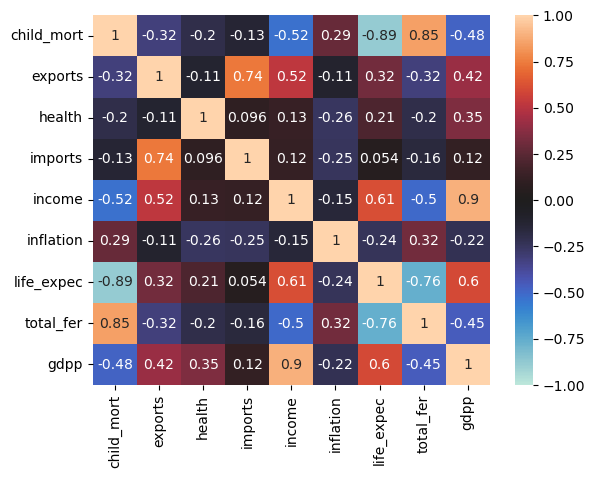

In [9]:
# exclude the country name column
country_factors = country.copy()
country_factors = country_factors.drop(columns=["country"])
# draw heatmap
sns.heatmap(country_factors.corr(), vmin=-1.0, vmax=1.0, annot=True, fmt='.2g', center=0.0, xticklabels=True, yticklabels=True)

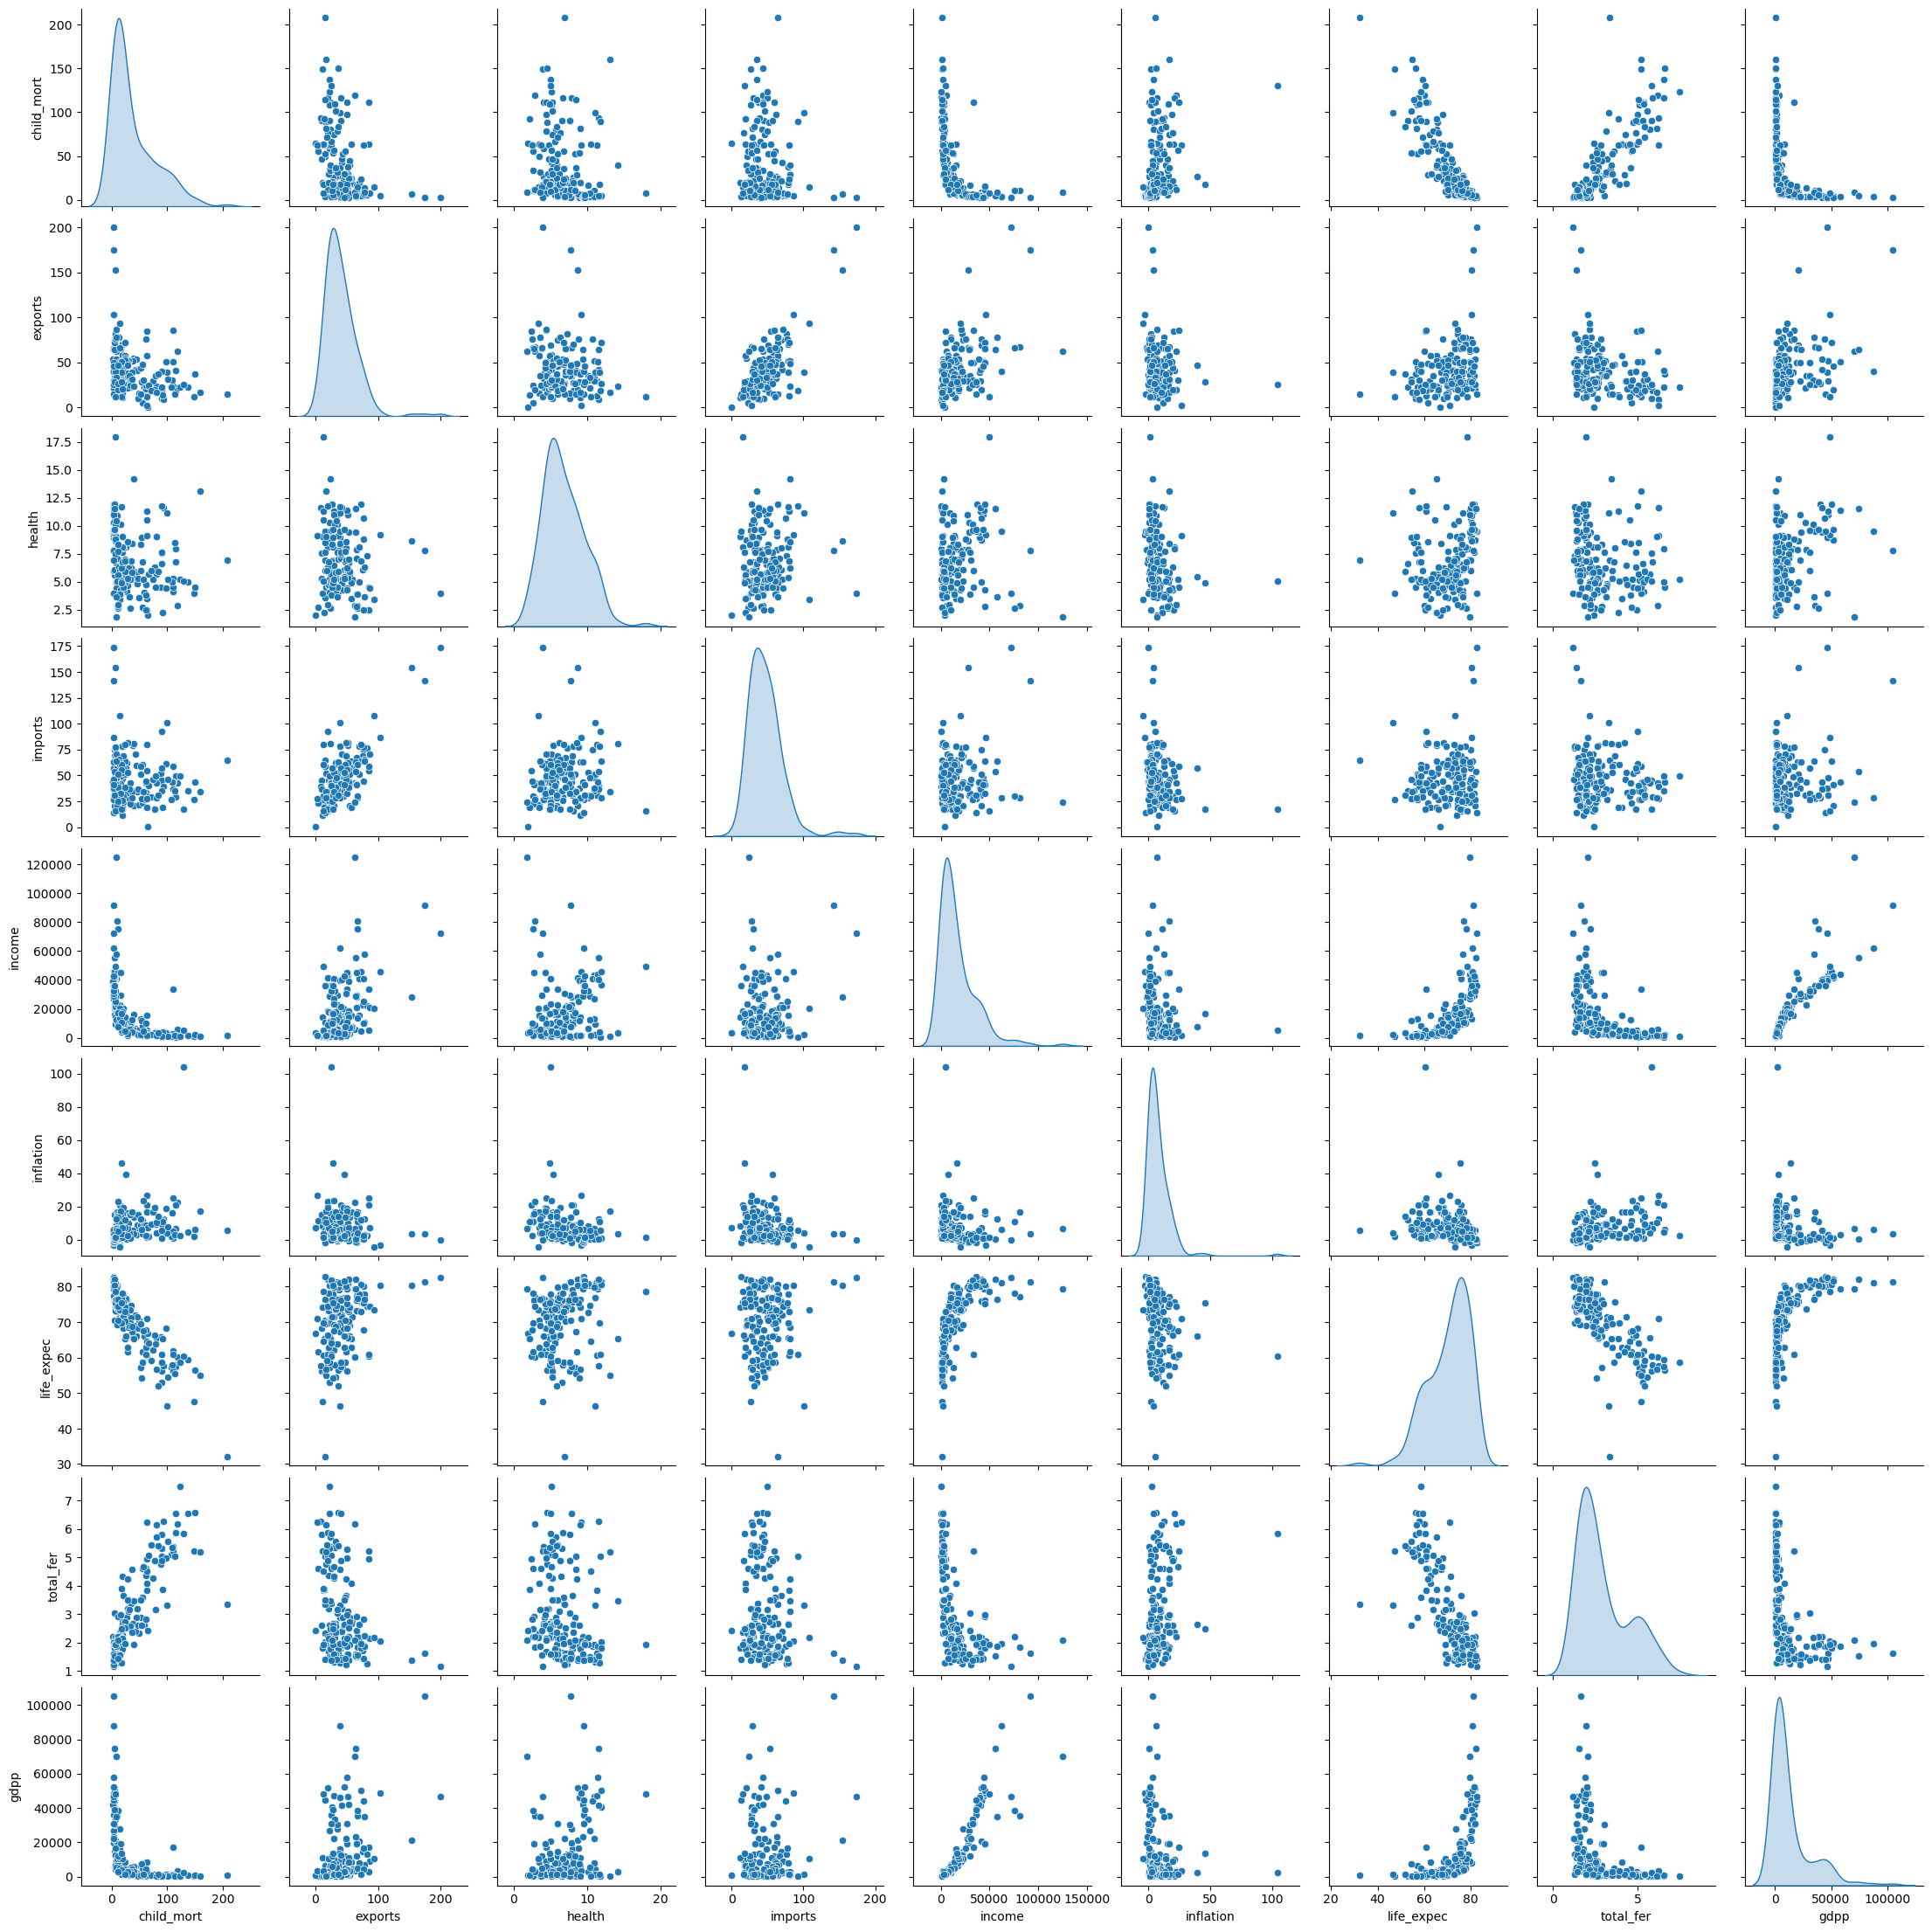

In [10]:
# pair plot of the factor columns
# suppress warnings
with warnings.catch_warnings(record=True):
    sns.pairplot(country_factors, diag_kind='kde')

---
Here, I choose the threshold of correlation coefficient to be 0.75. There are three pairs of factors with the absolute values of correlation coefficients greater than this threshold. The three pairs are child_mort and life_expec (-0.89), child_mort and total_fer (0.85), life_expec and total_fer (-0.76) and income and gdpp (0.9). Thus child_mort, life_expec and total_fer are mutually correlated with one another. I decide to keep the child_mort column and drop the other two columns. As to the pair of income and gdpp, I keep the income column and drop the gdpp column. 

In [11]:
country = country.drop(columns=['life_expec', 'total_fer', 'gdpp'])

---
## 2.4 Factor Standardization
Next, I examine the range and distribution of each column using histgrams.

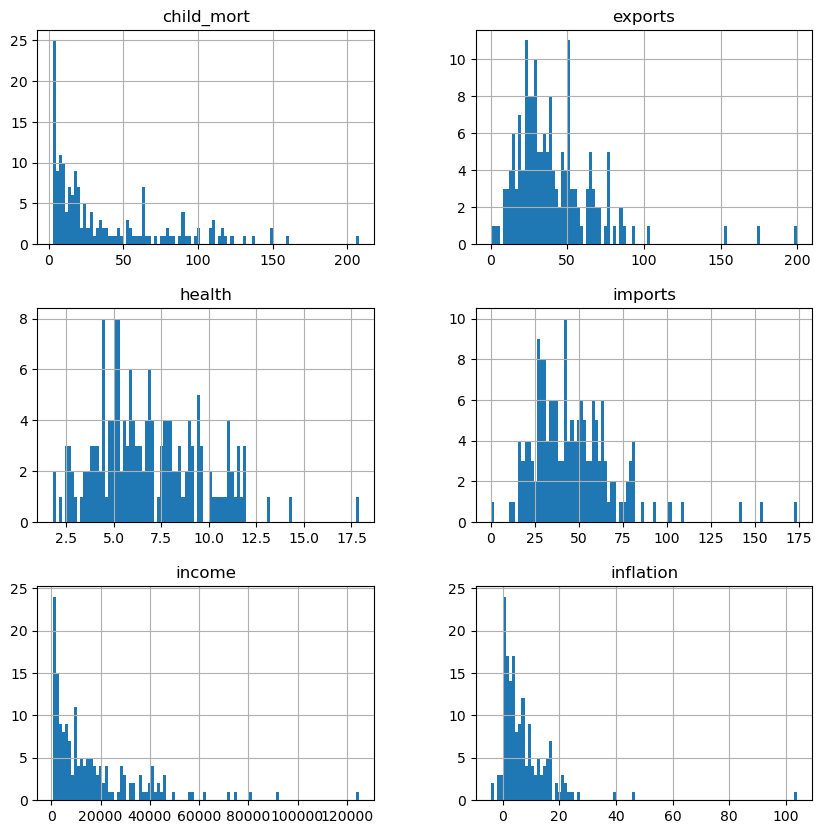

In [12]:
country.hist(bins=100, figsize=(10, 10))
plt.show()

---
It is shown that the ranges of the factors differ significantly. Therefore, I standardize the factors using the formula
$$\frac{X-Mean(X)}{Std(X)}$$

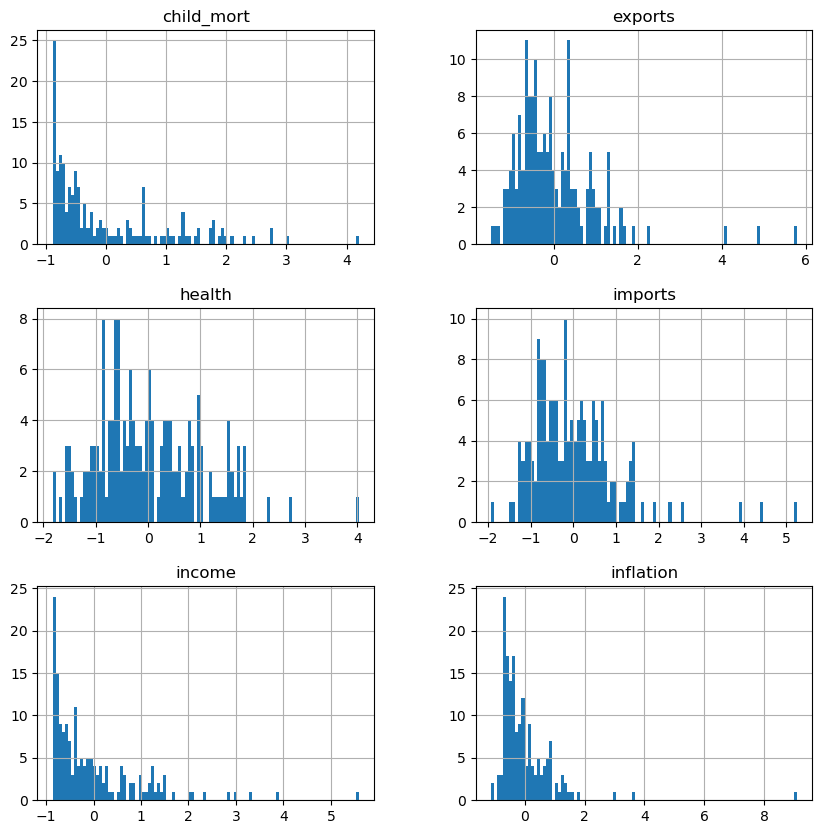

In [13]:
# standardization
for col_name in country.columns:
    if col_name != 'country':
        mean = country[col_name].mean()
        std = country[col_name].std()
        country[col_name] = country[col_name].apply(lambda x: (x - mean) / std)

country.hist(bins=100, figsize=(10, 10))
plt.show()

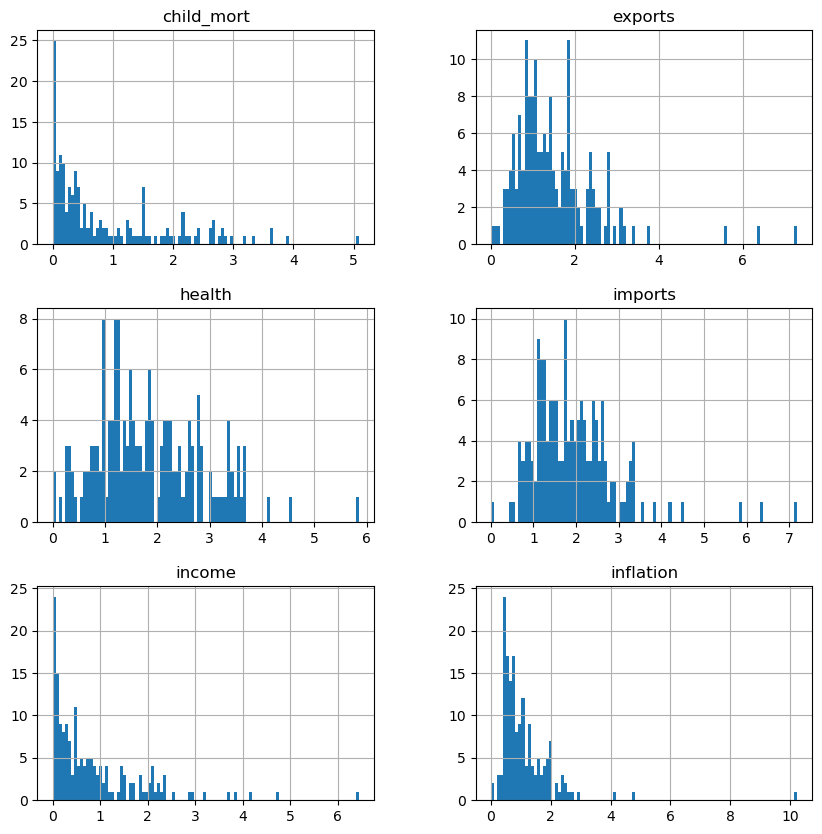

In [14]:
# make factors non-negative
for col_name in country.columns:
    if col_name != "country":
        min = country[col_name].min()
        country[col_name] = country[col_name].apply(lambda x : x - min)

country.hist(bins=100, figsize=(10, 10))
plt.show()

In [15]:
# split country name column
country_names = country['country']
country = country.drop(columns=['country'])

---
## 2.5 Outliers
There are some values deviate from the means to a large extent. However, I do not think they can be treated as outliers because they are valid. Finally, no values are dropped as outliers. 

# 3 Analysis and Results

This is a clustering problem. Now I try different clustering methods and compare their performances.

## 3.1 K-means Clustering Without Dimension Reduction

First, I try K-means clustering using the intial six factor columns without dimension reduction. I use the elbow method with distortion metric to choose the best cluster number (K) from the range [2, 20]. Silhouette score is used as another metric to check the performance of different cluster numbers.

In [16]:
# distortion metric
def distortion(data, labels, cluster_centers):
    d = 0
    for i in range(len(labels)):
        if isinstance(data, pd.DataFrame):
            row = data.iloc[i]
        else:
            row = data[i]
        label = labels[i]
        center = cluster_centers[label]
        distance_sq = np.sum(np.power(row - center, 2))
        d += distance_sq

    d /= len(labels)
    return d

env: OMP_NUM_THREADS=1
Distortion scores: [4.616733612620189, 3.9479998796410944, 3.4465184425834163, 3.1609161905531358, 2.5564707870842027, 2.1005121393084143, 1.9377872999565648, 1.7402783682087948, 1.6038946742657605, 1.544504082715735, 1.4692628622471107, 1.3629958656922636, 1.305100098999724, 1.2601495912711669, 1.1811064534973157, 1.127381063394593, 1.0729321187767342, 1.0313477488064153, 0.9336368682068773]
Silhouette scores: [0.23069987657308716, 0.20729300959994326, 0.19111094016141025, 0.199759455727239, 0.24332572806456623, 0.2432954967064417, 0.22352950171425912, 0.24223003582826122, 0.2465174329521798, 0.22064602940992128, 0.21474183096377072, 0.21521620253309365, 0.2082856334523521, 0.20582663102690638, 0.20624561992640725, 0.2036613426486777, 0.21066943375673636, 0.20665402800636282, 0.2182803222329247]


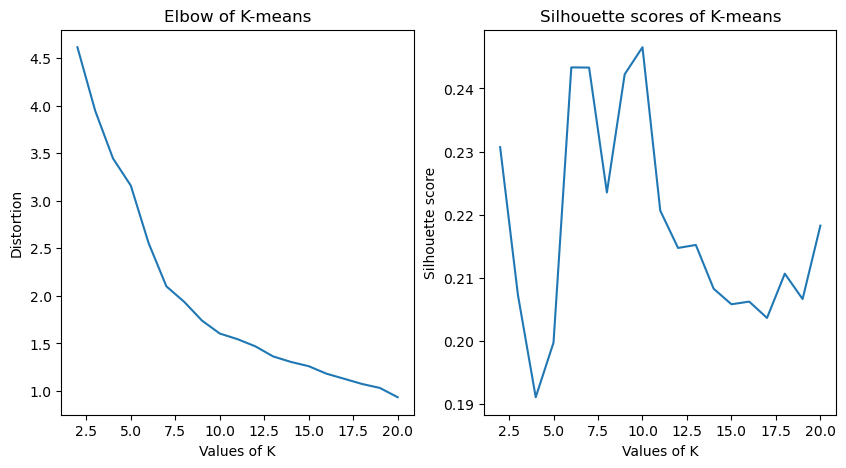

In [17]:
%env OMP_NUM_THREADS=1

ks = list(range(2, 21))
d_scores = []
s_scores = []

for k in ks:
    with warnings.catch_warnings(record=True):
        model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=1)
        model.fit(country)
    d_score = distortion(country, model.labels_, model.cluster_centers_)
    d_scores.append(d_score)
    s_score = silhouette_score(country, model.labels_)
    s_scores.append(s_score)

print("Distortion scores: {}".format(d_scores))
print("Silhouette scores: {}".format(s_scores))

# plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, d_scores)
plt.xlabel("Values of K")
plt.ylabel("Distortion")
plt.title("Elbow of K-means")

plt.subplot(1, 2, 2)
plt.plot(ks, s_scores)
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores of K-means")

plt.show()


---
We can see from the above figure that the best K is 10. Next, I print the 10 groups of countries.

In [18]:
k = 10
with warnings.catch_warnings(record=True):
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=1)
    model.fit(country)

groups = []
for i in range(k):
    groups.append([])
    
for i in range(len(model.labels_)):
    label = model.labels_[i]
    groups[label].append(country_names[i])

for i in range(k):
    print("Group {} contains: ".format(i))
    print(groups[i])
    print()
    display(country_original.loc[country_original['country'].isin(groups[i])].head())
    print()

Group 0 contains: 
['Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bolivia', 'China', 'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt', 'Eritrea', 'Guatemala', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kazakhstan', 'Kenya', 'Madagascar', 'Myanmar', 'Nepal', 'Pakistan', 'Peru', 'Philippines', 'Russia', 'South Africa', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Turkey', 'Uzbekistan', 'Venezuela', 'Yemen']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758



Group 1 contains: 
['Luxembourg', 'Malta', 'Singapore']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600



Group 2 contains: 
['Australia', 'Austria', 'Bahamas', 'Bosnia and Herzegovina', 'Brazil', 'Canada', 'Chile', 'Costa Rica', 'Croatia', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'New Zealand', 'Norway', 'Portugal', 'Serbia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States', 'Uruguay']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610
22,Brazil,19.8,10.7,9.01,11.8,14500,8.410,74.2,1.80,11200



Group 3 contains: 
['Belgium', 'Czech Republic', 'Estonia', 'Hungary', 'Ireland', 'Lithuania', 'Malaysia', 'Maldives', 'Netherlands', 'Panama', 'Seychelles', 'Slovak Republic', 'Slovenia', 'Vietnam']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
15,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.43,77.5,1.51,19800
51,Estonia,4.5,75.1,6.03,68.7,22700,1.74,76.0,1.72,14600
67,Hungary,6.0,81.8,7.33,76.5,22300,2.33,74.5,1.25,13100
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.22,80.4,2.05,48700



Group 4 contains: 
['Bahrain', 'Brunei', 'Kuwait', 'Libya', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500
89,Libya,16.6,65.6,3.88,42.1,29600,14.20,76.1,2.41,12100
115,Oman,11.7,65.7,2.77,41.2,45300,15.60,76.1,2.90,19300



Group 5 contains: 
['Nigeria']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330



Group 6 contains: 
['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', "Cote d'Ivoire", 'Gambia', 'Guinea-Bissau', 'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda', 'Senegal', 'Sierra Leone', 'Togo', 'Uganda']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310



Group 7 contains: 
['Albania', 'Antigua and Barbuda', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Botswana', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Cyprus', 'El Salvador', 'Fiji', 'Georgia', 'Grenada', 'Guyana', 'Jamaica', 'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Macedonia, FYR', 'Mauritius', 'Montenegro', 'Morocco', 'Namibia', 'Paraguay', 'Poland', 'Romania', 'Samoa', 'Solomon Islands', 'South Korea', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga', 'Tunisia', 'Ukraine', 'Vanuatu']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340



Group 8 contains: 
['Kiribati', 'Lesotho', 'Liberia', 'Micronesia, Fed. Sts.', 'Moldova']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
81,Kiribati,62.7,13.3,11.3,79.9,1730,1.52,60.7,3.84,1490
87,Lesotho,99.7,39.4,11.1,101.0,2380,4.15,46.5,3.30,1170
88,Liberia,89.3,19.1,11.8,92.6,700,5.47,60.8,5.02,327
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.80,65.4,3.46,2860
102,Moldova,17.2,39.2,11.7,78.5,3910,11.10,69.7,1.27,1630



Group 9 contains: 
['Angola', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Equatorial Guinea', 'Gabon', 'Ghana', 'Guinea', 'Lao', 'Mauritania', 'Mongolia', 'Turkmenistan', 'Zambia']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.7,60.4,4.95,2740
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100
55,Gabon,63.7,57.7,3.50,18.9,15400,16.6,62.9,4.08,8750


---
However, I think this K is a little large. Next, I try to reduce the dimension of the feature space before K-means clustering.

## 3.2 PCA + K-means Clustering

PCA is used to generate a latent space of dimension 4.

Explained variance ratio: [0.39064323 0.21984372 0.17544572 0.12011976]
Distortion scores: [4.059040111152929, 3.4006968504990973, 2.9365034710829208, 2.5962644485690944, 2.057371238442803, 1.7901489638542825, 1.6510537595312162, 1.5375109793511523, 1.430196232666757, 1.3346099714377802, 1.3260813399183096, 1.1369140635903767, 1.0256368643378155, 0.9953404779486191, 0.9607336915333361, 0.8772477408766435, 0.8375681149854394, 0.7755999509859115, 0.7402905710830526]
Silhouette scores: [0.2519436820792673, 0.23279630258675954, 0.26214103205678246, 0.2570230178360139, 0.2625873284365744, 0.27063656499693245, 0.24649287261213182, 0.23152901218094088, 0.21769636334479348, 0.2099323567166215, 0.17583833377617253, 0.22223300320240127, 0.23736029925716418, 0.23405380320861052, 0.23248039390696082, 0.22614157884649286, 0.22436579876038124, 0.2291226254358918, 0.23007783065984622]


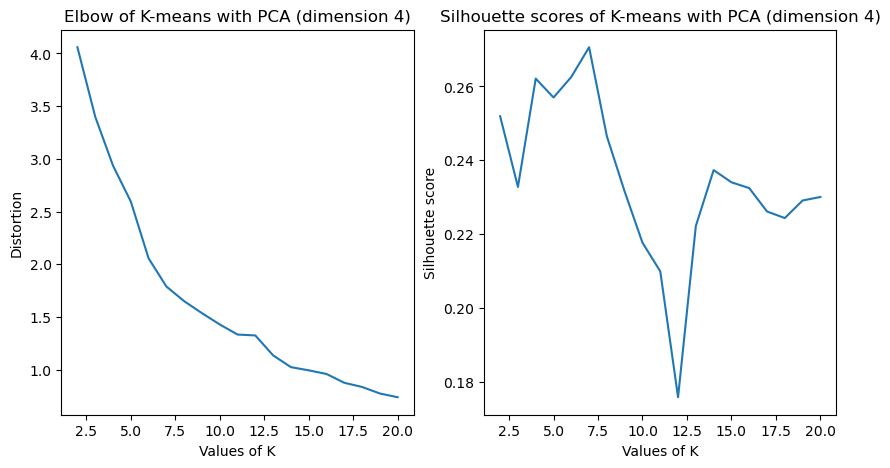

In [19]:
# dimension reduction with PCA
pca_dim4 = PCA(n_components=4)
country_dim4 = pca_dim4.fit_transform(country)
print("Explained variance ratio: {}".format(pca_dim4.explained_variance_ratio_))

ks = list(range(2, 21))
d_scores = []
s_scores = []

for k in ks:
    with warnings.catch_warnings(record=True):
        model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=1)
        model.fit(country_dim4)
    d_score = distortion(country_dim4, model.labels_, model.cluster_centers_)
    d_scores.append(d_score)
    s_score = silhouette_score(country_dim4, model.labels_)
    s_scores.append(s_score)

print("Distortion scores: {}".format(d_scores))
print("Silhouette scores: {}".format(s_scores))

# plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, d_scores)
plt.xlabel("Values of K")
plt.ylabel("Distortion")
plt.title("Elbow of K-means with PCA (dimension 4)")

plt.subplot(1, 2, 2)
plt.plot(ks, s_scores)
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores of K-means with PCA (dimension 4)")

plt.show()

---
According to the above results, the best K is 7 when using  4-dim latent space generated by PCA. Next, I print the 7 groups of countries. 

In [20]:
k = 7
with warnings.catch_warnings(record=True):
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=1)
    model.fit(country_dim4)

groups = []
for i in range(k):
    groups.append([])
    
for i in range(len(model.labels_)):
    label = model.labels_[i]
    groups[label].append(country_names[i])

for i in range(k):
    print("Group {} contains: ".format(i))
    print(groups[i])
    print()
    display(country_original.loc[country_original['country'].isin(groups[i])].head())
    print()

Group 0 contains: 
['Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Comoros', 'Congo, Rep.', "Cote d'Ivoire", 'Dominican Republic', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Kazakhstan', 'Kenya', 'Lao', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mongolia', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Pakistan', 'Peru', 'Philippines', 'Russia', 'Senegal', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Uzbekistan', 'Venezuela', 'Yemen', 'Zambia']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758



Group 1 contains: 
['Ireland', 'Luxembourg', 'Malta', 'Seychelles', 'Singapore']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600



Group 2 contains: 
['Argentina', 'Australia', 'Austria', 'Bahamas', 'Bosnia and Herzegovina', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Serbia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States', 'Uruguay']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610



Group 3 contains: 
['Bahrain', 'Brunei', 'Kuwait', 'Libya', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500
89,Libya,16.6,65.6,3.88,42.1,29600,14.20,76.1,2.41,12100
115,Oman,11.7,65.7,2.77,41.2,45300,15.60,76.1,2.90,19300



Group 4 contains: 
['Nigeria']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330



Group 5 contains: 
['Albania', 'Antigua and Barbuda', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Botswana', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Cyprus', 'Czech Republic', 'El Salvador', 'Estonia', 'Fiji', 'Grenada', 'Guyana', 'Hungary', 'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Montenegro', 'Morocco', 'Namibia', 'Panama', 'Paraguay', 'Romania', 'Samoa', 'Slovak Republic', 'Slovenia', 'Solomon Islands', 'South Korea', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga', 'Tunisia', 'Turkmenistan', 'Ukraine', 'Vanuatu', 'Vietnam']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400



Group 6 contains: 
['Afghanistan', 'Burundi', 'Congo, Dem. Rep.', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Lesotho', 'Liberia', 'Micronesia, Fed. Sts.', 'Moldova', 'Rwanda', 'Sierra Leone', 'Togo', 'Uganda']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547
66,Haiti,208.0,15.30,6.91,64.7,1500,5.45,32.1,3.33,662


Explained variance ratio: [0.39064323 0.21984372]


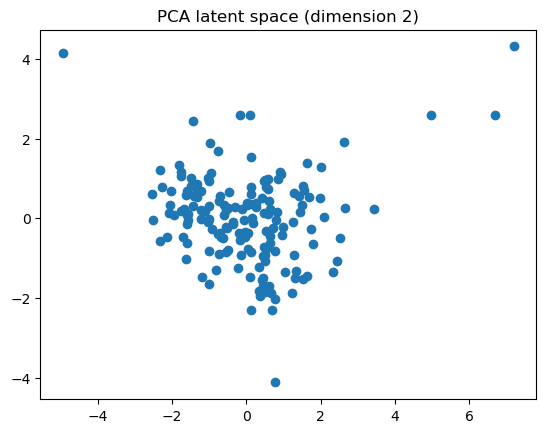

Distortion scores: [2.3071688784189988, 1.6684009910170796, 1.1132168272694456, 0.9111915830754097, 0.7620904139915976, 0.6481389260488183, 0.5473791950872269, 0.48900652914509357, 0.4118100885918699, 0.3646888991053507, 0.3452674993978098, 0.30516811393229165, 0.30375793221627684, 0.2747860311546409, 0.2560285828786023, 0.22846206942682407, 0.19997273535658264, 0.19807794635664847, 0.17886439501644288]
Silhouette scores: [0.3636435244437253, 0.3687147105647883, 0.404236871421396, 0.36594957960101854, 0.3748815035986511, 0.3786775017854506, 0.34523695560652623, 0.35257306739258865, 0.3663251654495014, 0.34868579393181204, 0.3420558140595187, 0.3606695444879286, 0.32146560215799275, 0.33886294968688097, 0.32680559088572025, 0.3397282674316784, 0.35073501895013043, 0.35801134605848983, 0.35157179658137705]


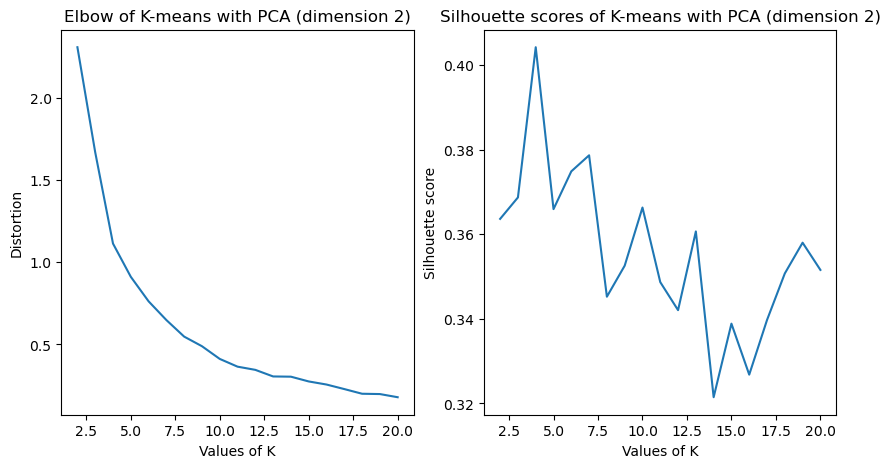

In [21]:
# dimension reduction with PCA
pca_dim2 = PCA(n_components=2)
country_dim2 = pca_dim2.fit_transform(country)
print("Explained variance ratio: {}".format(pca_dim2.explained_variance_ratio_))

# plot the 2-dim space
plt.figure()
plt.scatter(country_dim2[:, 0], country_dim2[:, 1])
plt.title("PCA latent space (dimension 2)")
plt.show()

ks = list(range(2, 21))
d_scores = []
s_scores = []

for k in ks:
    with warnings.catch_warnings(record=True):
        model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=1)
        model.fit(country_dim2)
    d_score = distortion(country_dim2, model.labels_, model.cluster_centers_)
    d_scores.append(d_score)
    s_score = silhouette_score(country_dim2, model.labels_)
    s_scores.append(s_score)

print("Distortion scores: {}".format(d_scores))
print("Silhouette scores: {}".format(s_scores))

# plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, d_scores)
plt.xlabel("Values of K")
plt.ylabel("Distortion")
plt.title("Elbow of K-means with PCA (dimension 2)")

plt.subplot(1, 2, 2)
plt.plot(ks, s_scores)
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores of K-means with PCA (dimension 2)")

plt.show()

---
The above figures show different best Ks. The elbow method suggests the best K to be 7, while the silhouette score suggests the best K to be 4 when using  2-dim latent space generated by PCA. Next, I choose K to be 7 and print the 7 groups of countries. 

In [22]:
k = 7
with warnings.catch_warnings(record=True):
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=1)
    model.fit(country_dim2)

groups = []
for i in range(k):
    groups.append([])
    
for i in range(len(model.labels_)):
    label = model.labels_[i]
    groups[label].append(country_names[i])

for i in range(k):
    print("Group {} contains: ".format(i))
    print(groups[i])
    print()
    display(country_original.loc[country_original['country'].isin(groups[i])].head())
    print()

Group 0 contains: 
['Afghanistan', 'Algeria', 'Argentina', 'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Egypt', 'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Indonesia', 'Iran', 'Kenya', 'Lao', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Pakistan', 'Senegal', 'Sierra Leone', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Uganda', 'Uzbekistan', 'Venezuela', 'Yemen', 'Zambia']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758



Group 1 contains: 
['Australia', 'Austria', 'Bahamas', 'Barbados', 'Bosnia and Herzegovina', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Kiribati', 'Micronesia, Fed. Sts.', 'Moldova', 'Montenegro', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Rwanda', 'Serbia', 'South Africa', 'Spain', 'Sweden', 'Turkey', 'United Kingdom', 'United States', 'Uruguay']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610



Group 2 contains: 
['Albania', 'Antigua and Barbuda', 'Armenia', 'Azerbaijan', 'Belarus', 'Belize', 'Bhutan', 'Botswana', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Dominican Republic', 'El Salvador', 'Fiji', 'Grenada', 'Guatemala', 'Guyana', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Macedonia, FYR', 'Mauritius', 'Morocco', 'Namibia', 'Oman', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Solomon Islands', 'South Korea', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Togo', 'Tonga', 'Tunisia', 'Ukraine', 'Vanuatu', 'Vietnam']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840
14,Belarus,5.5,51.4,5.61,64.5,16200,15.10,70.4,1.49,6030



Group 3 contains: 
['Luxembourg', 'Malta', 'Singapore']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600



Group 4 contains: 
['Bahrain', 'Belgium', 'Brunei', 'Cyprus', 'Czech Republic', 'Estonia', 'Hungary', 'Ireland', 'Kuwait', 'Lithuania', 'Malaysia', 'Maldives', 'Netherlands', 'Panama', 'Qatar', 'Seychelles', 'Slovak Republic', 'Slovenia', 'Switzerland', 'United Arab Emirates']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700
15,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.01,79.9,1.42,30800
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.43,77.5,1.51,19800



Group 5 contains: 
['Nigeria']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330



Group 6 contains: 
['Angola', 'Congo, Rep.', 'Equatorial Guinea', 'Gabon', 'Mauritania', 'Mongolia', 'Turkmenistan']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.7,60.4,4.95,2740
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100
55,Gabon,63.7,57.7,3.50,18.9,15400,16.6,62.9,4.08,8750
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.9,68.2,4.98,1200


## 3.3 NMF + K-means Clusterinng

Reconstruction error: 11.861610489995194
Distortion scores: [0.10520881508197007, 0.08811190751731987, 0.05820455796298178, 0.0524384606370748, 0.04124816995254926, 0.03753106889599275, 0.03320050691203173, 0.029647384780241037, 0.025119036092962163, 0.02310675882055592, 0.021231748385274102, 0.019405328720733715, 0.018658378737114466, 0.017847406547203903, 0.01690450873967314, 0.016290200370662707, 0.0157898172593949, 0.014083324451508183, 0.013395485304992254]
Silhouette scores: [0.3363420790749724, 0.2656206092006775, 0.28101152116718997, 0.23143578041060175, 0.26754064455749305, 0.26955340426231555, 0.2518050511318261, 0.2675023213370931, 0.29412445517564495, 0.2974244846238828, 0.2966561659964697, 0.3045545007920581, 0.2806802695926863, 0.27327475282169356, 0.28055071059515124, 0.2600640209402905, 0.2571757271608256, 0.273237454613612, 0.264793966784565]


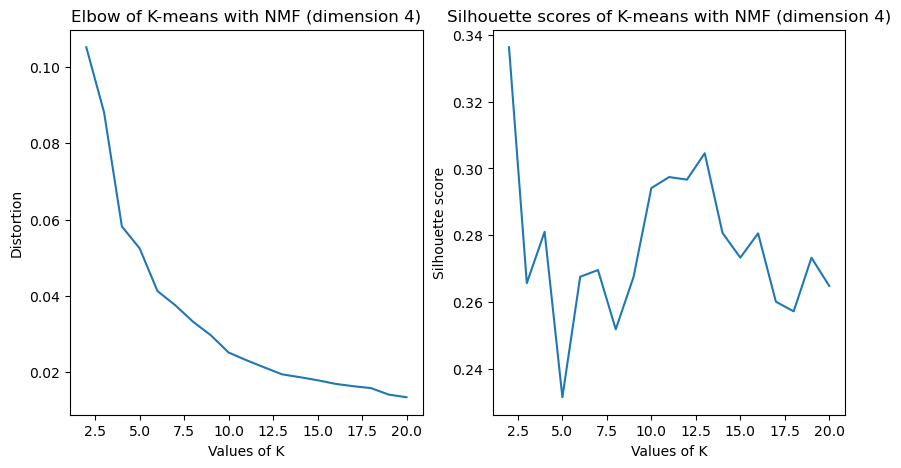

In [23]:
# dimension reduction with NMF
nmf_dim4 = NMF(n_components=4, random_state=1)
w_dim4 = nmf_dim4.fit_transform(country)
print("Reconstruction error: {}".format(nmf_dim4.reconstruction_err_))

ks = list(range(2, 21))
d_scores = []
s_scores = []

for k in ks:
    with warnings.catch_warnings(record=True):
        model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=1)
        model.fit(w_dim4)
    d_score = distortion(w_dim4, model.labels_, model.cluster_centers_)
    d_scores.append(d_score)
    s_score = silhouette_score(w_dim4, model.labels_)
    s_scores.append(s_score)

print("Distortion scores: {}".format(d_scores))
print("Silhouette scores: {}".format(s_scores))

# plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, d_scores)
plt.xlabel("Values of K")
plt.ylabel("Distortion")
plt.title("Elbow of K-means with NMF (dimension 4)")

plt.subplot(1, 2, 2)
plt.plot(ks, s_scores)
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores of K-means with NMF (dimension 4)")

plt.show()

---
The above figures show different best Ks. The elbow method suggests the best K to be 10, while the silhouette score suggests the best K to be 2 when using 4-dim latent space generated by NMF. Next, I choose K to be 10 and print the 10 groups of countries. 

In [24]:
k = 10
with warnings.catch_warnings(record=True):
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=1)
    model.fit(w_dim4)

groups = []
for i in range(k):
    groups.append([])
    
for i in range(len(model.labels_)):
    label = model.labels_[i]
    groups[label].append(country_names[i])

for i in range(k):
    print("Group {} contains: ".format(i))
    print(groups[i])
    print()
    display(country_original.loc[country_original['country'].isin(groups[i])].head())
    print()

Group 0 contains: 
['Afghanistan', 'Bangladesh', 'Benin', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Lao', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Myanmar', 'Niger', 'Pakistan', 'Senegal', 'Tajikistan', 'Tanzania', 'Togo']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310



Group 1 contains: 
['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Estonia', 'Hungary', 'Ireland', 'Israel', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Maldives', 'Mauritius', 'Montenegro', 'Panama', 'Poland', 'Slovak Republic', 'Slovenia', 'South Korea']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500



Group 2 contains: 
['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Canada', 'Costa Rica', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Italy', 'Japan', 'Micronesia, Fed. Sts.', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Serbia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400



Group 3 contains: 
['Nigeria']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330



Group 4 contains: 
['Azerbaijan', 'Bahrain', 'Belarus', 'Brunei', 'Kuwait', 'Libya', 'Malaysia', 'Oman', 'Qatar', 'Russia', 'Saudi Arabia', 'United Arab Emirates', 'Vietnam']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700
14,Belarus,5.5,51.4,5.61,64.5,16200,15.10,70.4,1.49,6030
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500



Group 5 contains: 
['Albania', 'Armenia', 'Belize', 'Bhutan', 'Bolivia', 'Cambodia', 'Cape Verde', 'China', 'Dominican Republic', 'Egypt', 'El Salvador', 'Fiji', 'Grenada', 'Guatemala', 'Guyana', 'Jamaica', 'Kyrgyz Republic', 'Morocco', 'Namibia', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Samoa', 'Seychelles', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga', 'Tunisia', 'Turkmenistan', 'Vanuatu']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
16,Belize,18.8,58.2,5.20,57.5,7880,1.14,71.4,2.71,4340
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1980



Group 6 contains: 
['Luxembourg', 'Malta', 'Singapore']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600



Group 7 contains: 
['Algeria', 'Angola', 'Argentina', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Equatorial Guinea', 'Gabon', 'Ghana', 'Guinea', 'Indonesia', 'Iran', 'Kazakhstan', 'Mauritania', 'Nepal', 'Sri Lanka', 'Sudan', 'Timor-Leste', 'Uzbekistan', 'Yemen', 'Zambia']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,27.3,38.4,4.17,31.4,12900,16.1,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
5,Argentina,14.5,18.9,8.10,16.0,18700,20.9,75.8,2.37,10300
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.7,60.4,4.95,2740



Group 8 contains: 
['Mongolia', 'Venezuela']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500



Group 9 contains: 
['Botswana', 'Brazil', 'Burundi', 'Chile', 'Colombia', 'Ecuador', 'Georgia', 'Iraq', 'Jordan', 'Kiribati', 'Lesotho', 'Liberia', 'Moldova', 'Rwanda', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Turkey', 'Uganda', 'Ukraine', 'Uruguay']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
21,Botswana,52.5,43.60,8.30,51.3,13300,8.92,57.1,2.88,6350
22,Brazil,19.8,10.70,9.01,11.8,14500,8.41,74.2,1.80,11200
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
33,Chile,8.7,37.70,7.96,31.3,19400,8.96,79.1,1.88,12900
35,Colombia,18.6,15.90,7.59,17.8,10900,3.86,76.4,2.01,6250


Reconstruction error: 22.046274008330155


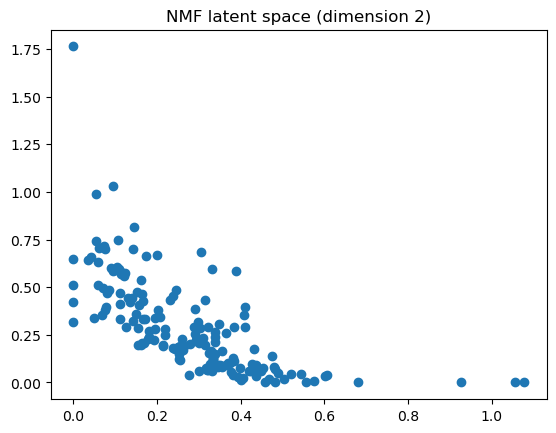

Distortion scores: [0.04131983582799383, 0.029215779426932424, 0.02300390662737318, 0.015547803187974213, 0.010806442519793315, 0.009465651679339772, 0.007812673062899515, 0.006232291403687254, 0.005480228062224662, 0.005053251393849023, 0.004472100170991093, 0.004121139533350817, 0.0035349235462092897, 0.0032160487269994134, 0.003102830684397487, 0.002537698432425361, 0.002305651682069483, 0.0021986447929452234, 0.002043688082192803]
Silhouette scores: [0.5326097257067536, 0.43742739262897484, 0.44964964470567487, 0.44579087354939917, 0.4363140446127006, 0.4298381735047783, 0.38928376501478124, 0.4080309769032728, 0.38633660807405196, 0.3872591845036689, 0.38620201383536484, 0.39841572591616925, 0.39514159513518604, 0.39542184118803747, 0.40196210672293803, 0.41346902646387274, 0.4165163980335269, 0.4050460100589561, 0.38919127751120663]


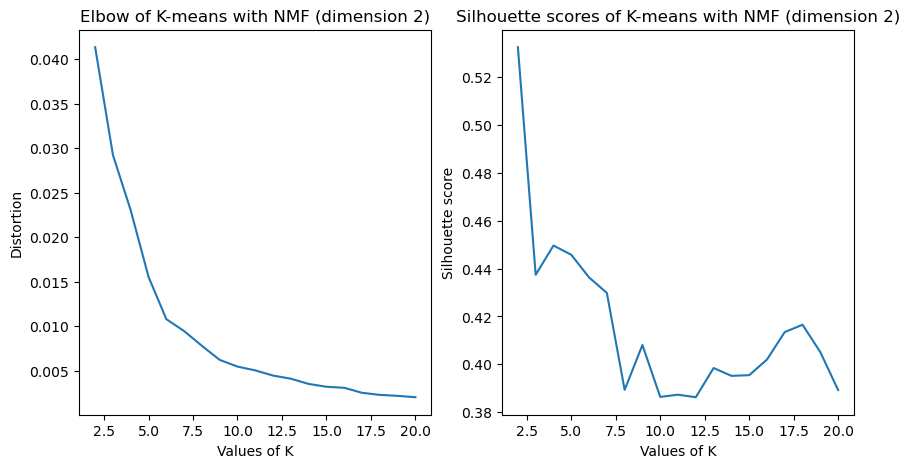

In [25]:
# dimension reduction with NMF
nmf_dim2 = NMF(n_components=2, random_state=1)
w_dim2 = nmf_dim2.fit_transform(country)
print("Reconstruction error: {}".format(nmf_dim2.reconstruction_err_))

# plot 2-dim feature space
plt.figure()
plt.scatter(w_dim2[:, 0], w_dim2[:, 1])
plt.title("NMF latent space (dimension 2)")
plt.show()

ks = list(range(2, 21))
d_scores = []
s_scores = []

for k in ks:
    with warnings.catch_warnings(record=True):
        model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=1)
        model.fit(w_dim2)
    d_score = distortion(w_dim2, model.labels_, model.cluster_centers_)
    d_scores.append(d_score)
    s_score = silhouette_score(w_dim2, model.labels_)
    s_scores.append(s_score)

print("Distortion scores: {}".format(d_scores))
print("Silhouette scores: {}".format(s_scores))

# plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, d_scores)
plt.xlabel("Values of K")
plt.ylabel("Distortion")
plt.title("Elbow of K-means with NMF (dimension 2)")

plt.subplot(1, 2, 2)
plt.plot(ks, s_scores)
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores of K-means with NMF (dimension 2)")

plt.show()

---
The elbow method suggests the best K to be 6, while the silhouette score suggest the best K to be 2. I choose the best K to be 6 and print the 6 groups of countries.

In [26]:
k = 6
with warnings.catch_warnings(record=True):
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=1)
    model.fit(w_dim2)

groups = []
for i in range(k):
    groups.append([])
    
for i in range(len(model.labels_)):
    label = model.labels_[i]
    groups[label].append(country_names[i])

for i in range(k):
    print("Group {} contains: ".format(i))
    print(groups[i])
    print()
    display(country_original.loc[country_original['country'].isin(groups[i])].head())
    print()

Group 0 contains: 
['Algeria', 'Argentina', 'Azerbaijan', 'Bangladesh', 'Benin', 'Bolivia', 'Brazil', 'Cameroon', 'Comoros', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Eritrea', 'Gabon', 'Gambia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kazakhstan', 'Kenya', 'Kiribati', 'Lao', 'Madagascar', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda', 'Senegal', 'South Africa', 'Sri Lanka', 'Tajikistan', 'Tanzania', 'Togo', 'Uzbekistan']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758



Group 1 contains: 
['Antigua and Barbuda', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Belize', 'Brunei', 'Bulgaria', 'Canada', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Poland', 'Portugal', 'Qatar', 'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Arab Emirates', 'United Kingdom', 'United States']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700



Group 2 contains: 
['Afghanistan', 'Angola', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Equatorial Guinea', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mauritania', 'Mongolia', 'Mozambique', 'Niger', 'Sierra Leone', 'Sudan', 'Timor-Leste', 'Uganda', 'Venezuela', 'Yemen', 'Zambia']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553
3,Angola,119.0,62.30,2.85,42.9,5900,22.40,60.1,6.16,3530
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446



Group 3 contains: 
['Luxembourg', 'Malta', 'Singapore']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600



Group 4 contains: 
['Nigeria']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330



Group 5 contains: 
['Albania', 'Armenia', 'Belarus', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Jamaica', 'Jordan', 'Kyrgyz Republic', 'Libya', 'Micronesia, Fed. Sts.', 'Moldova', 'Morocco', 'Namibia', 'Oman', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Solomon Islands', 'St. Vincent and the Grenadines', 'Suriname', 'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay', 'Vanuatu', 'Vietnam']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
14,Belarus,5.5,51.4,5.61,64.5,16200,15.10,70.4,1.49,6030
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.40,76.8,1.31,4610


---
In all the K-means clustering results, there is one single-element group which only consists of Nigeria. Nigeria is a country with very high child mortality (130 death of children under 5 years of age per 1000 live births), inflation (104) and total fertiity rate (5.84 children that would be born to each woman), and low life expectation (60.5), GDP per capita (2330), exports of goods and services (25.3% of GDP per capita) and imports (17.4% of GDP per capita). I think these results suggest that Nigeria is in the direst need of aid.

## 3.4 Hierarchical Clustering

Next, I use another clustering method, Hierarchical Clustering, to categorize the countries.

In [27]:
# plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

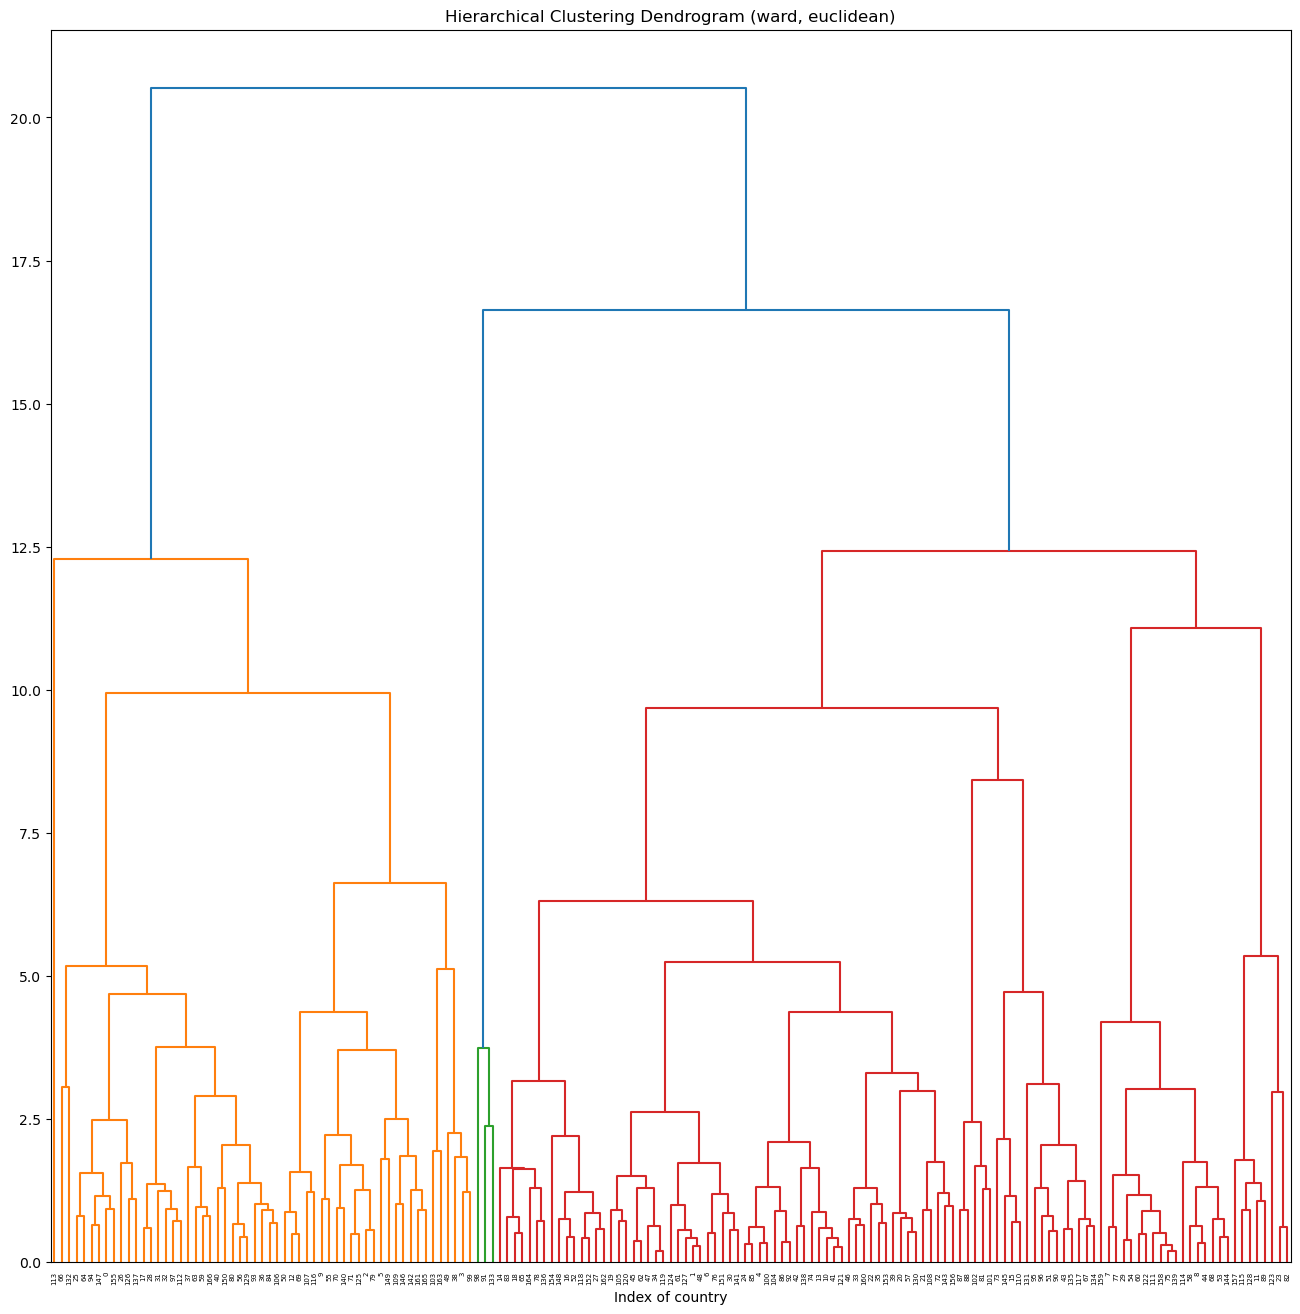

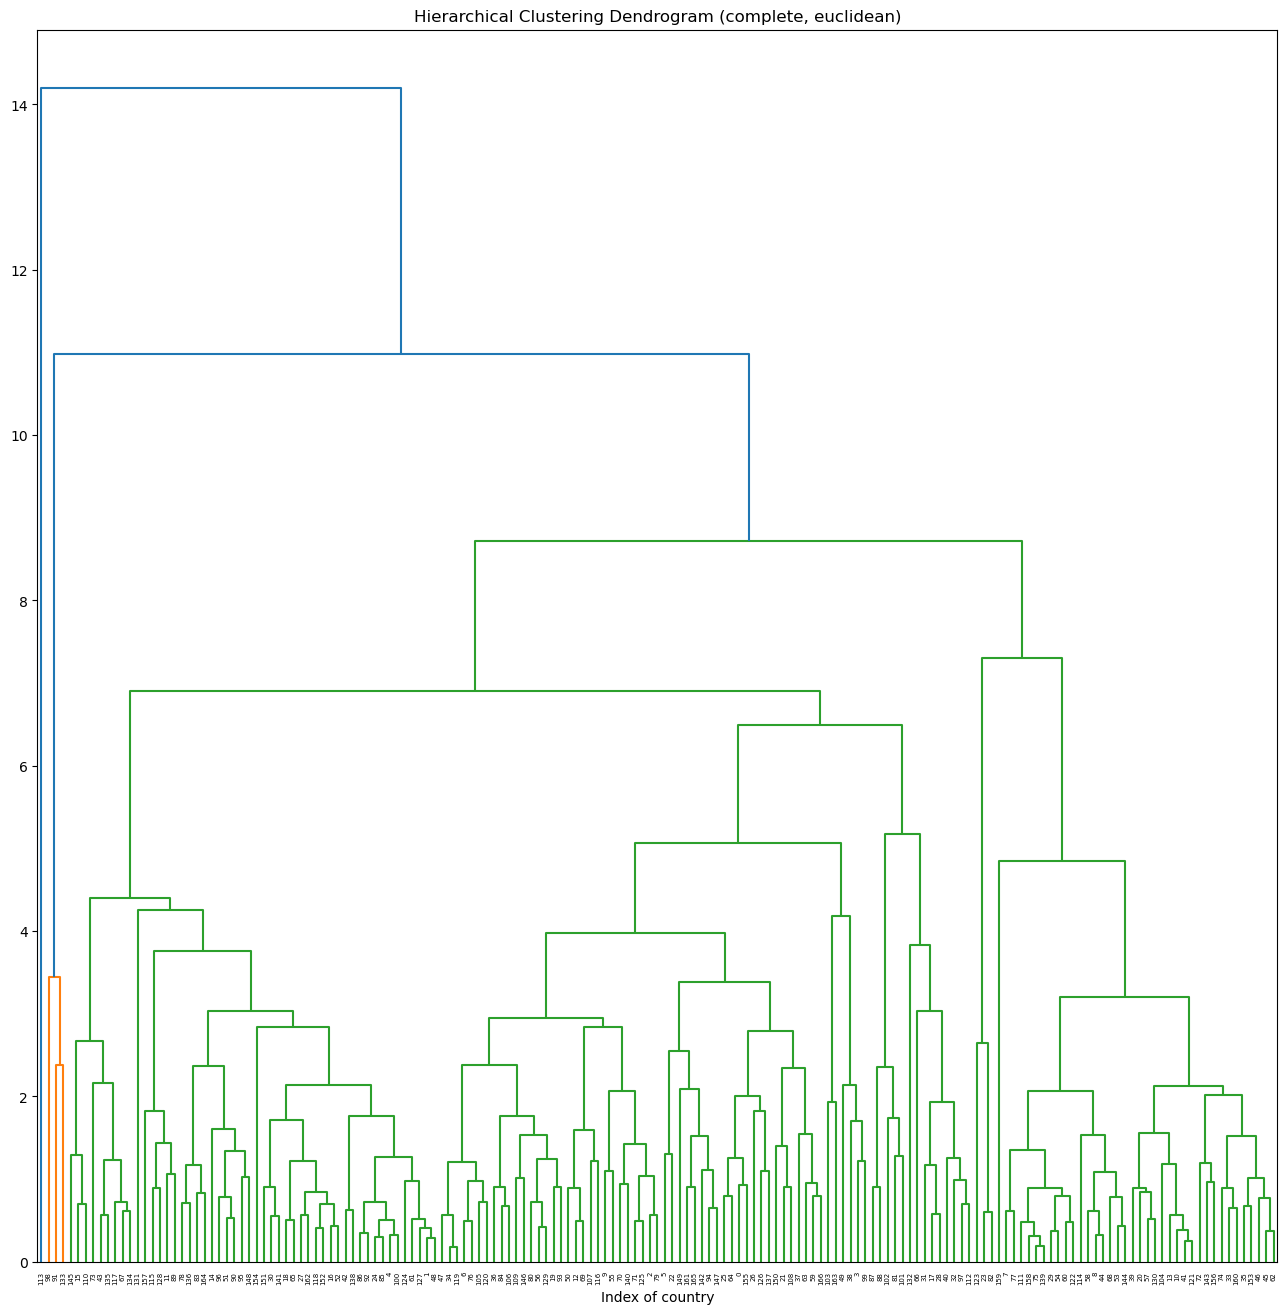

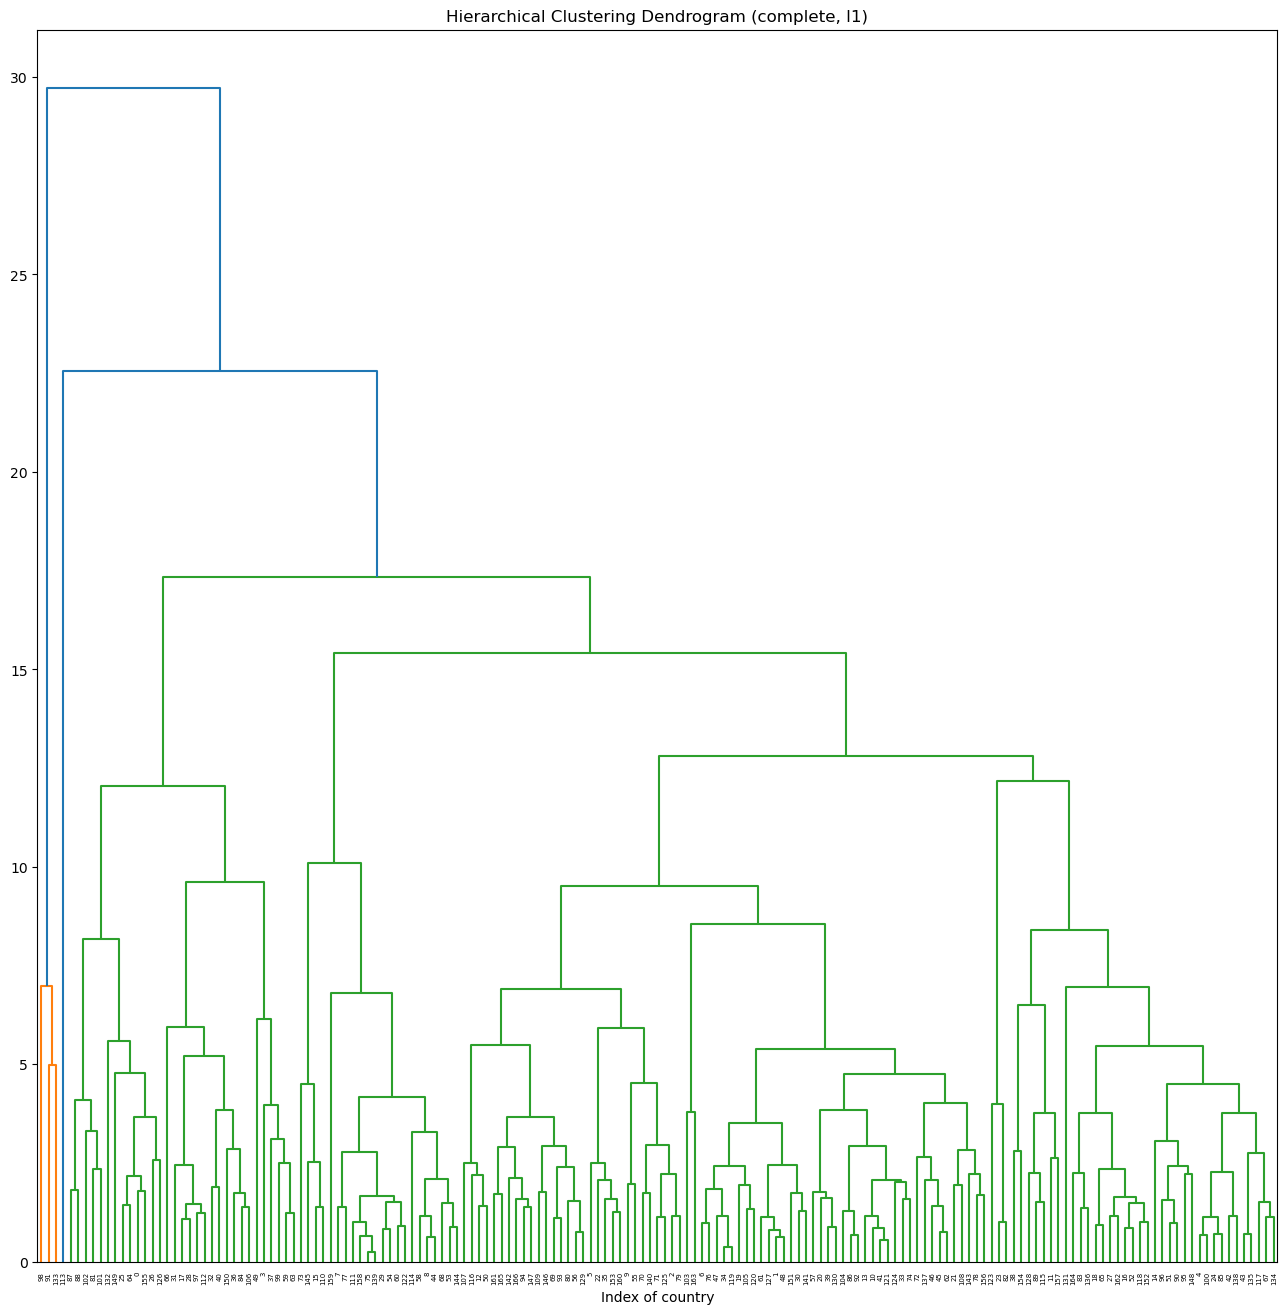

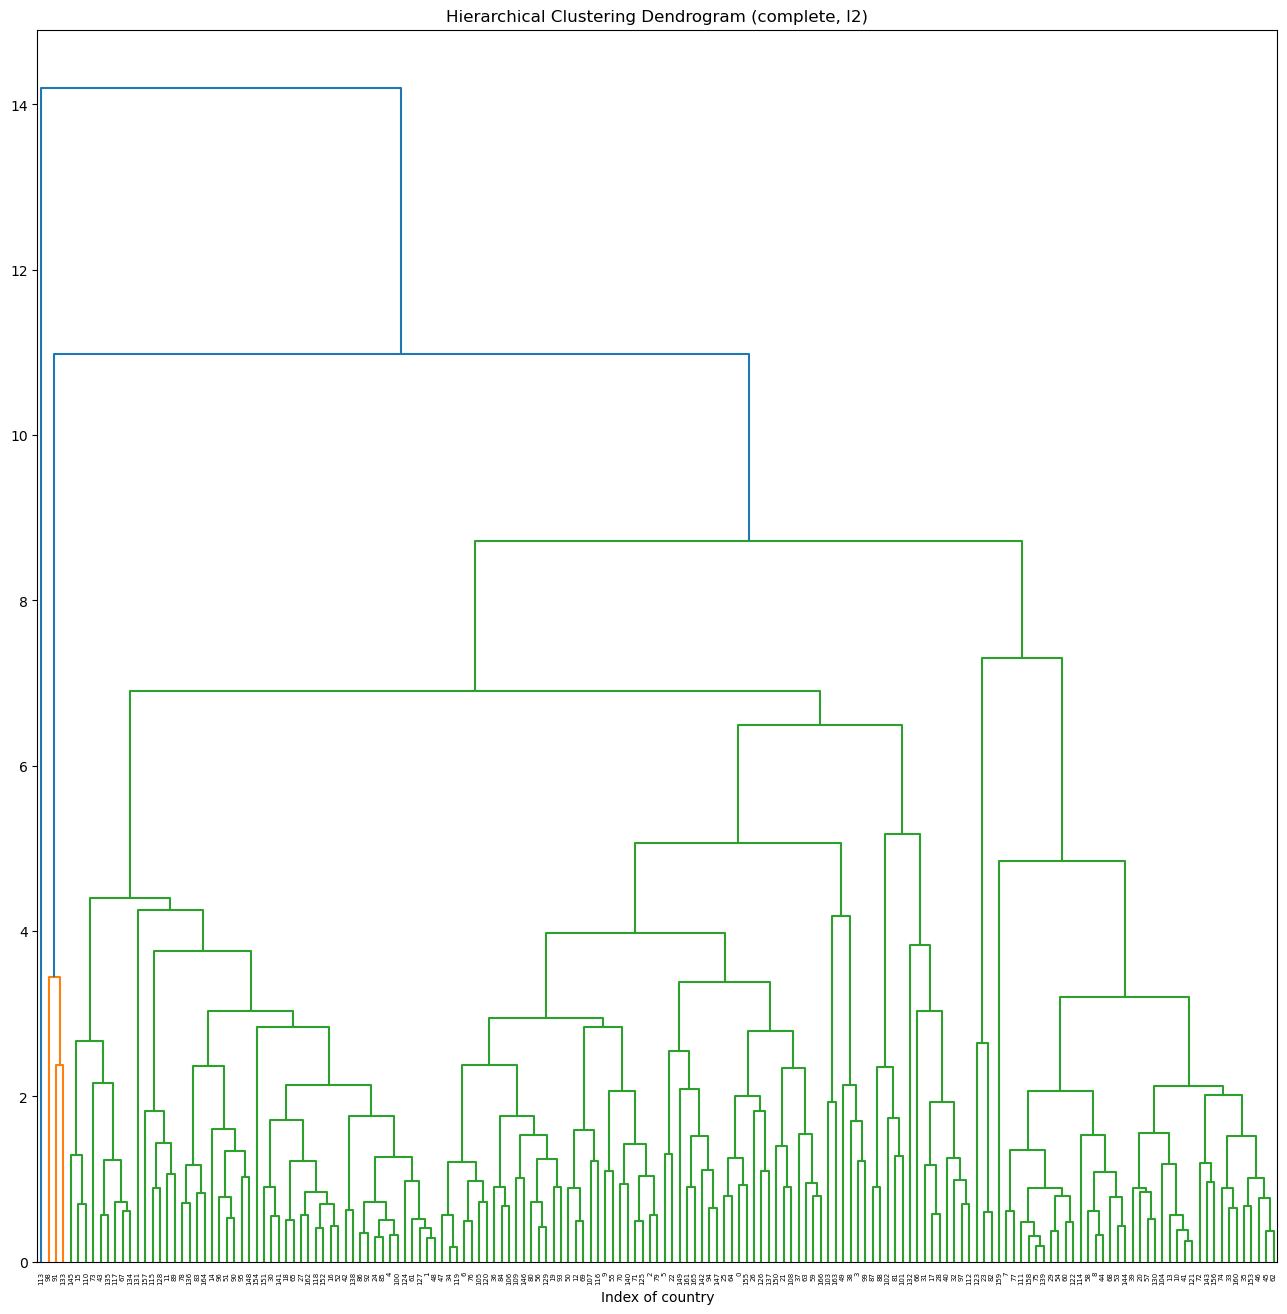

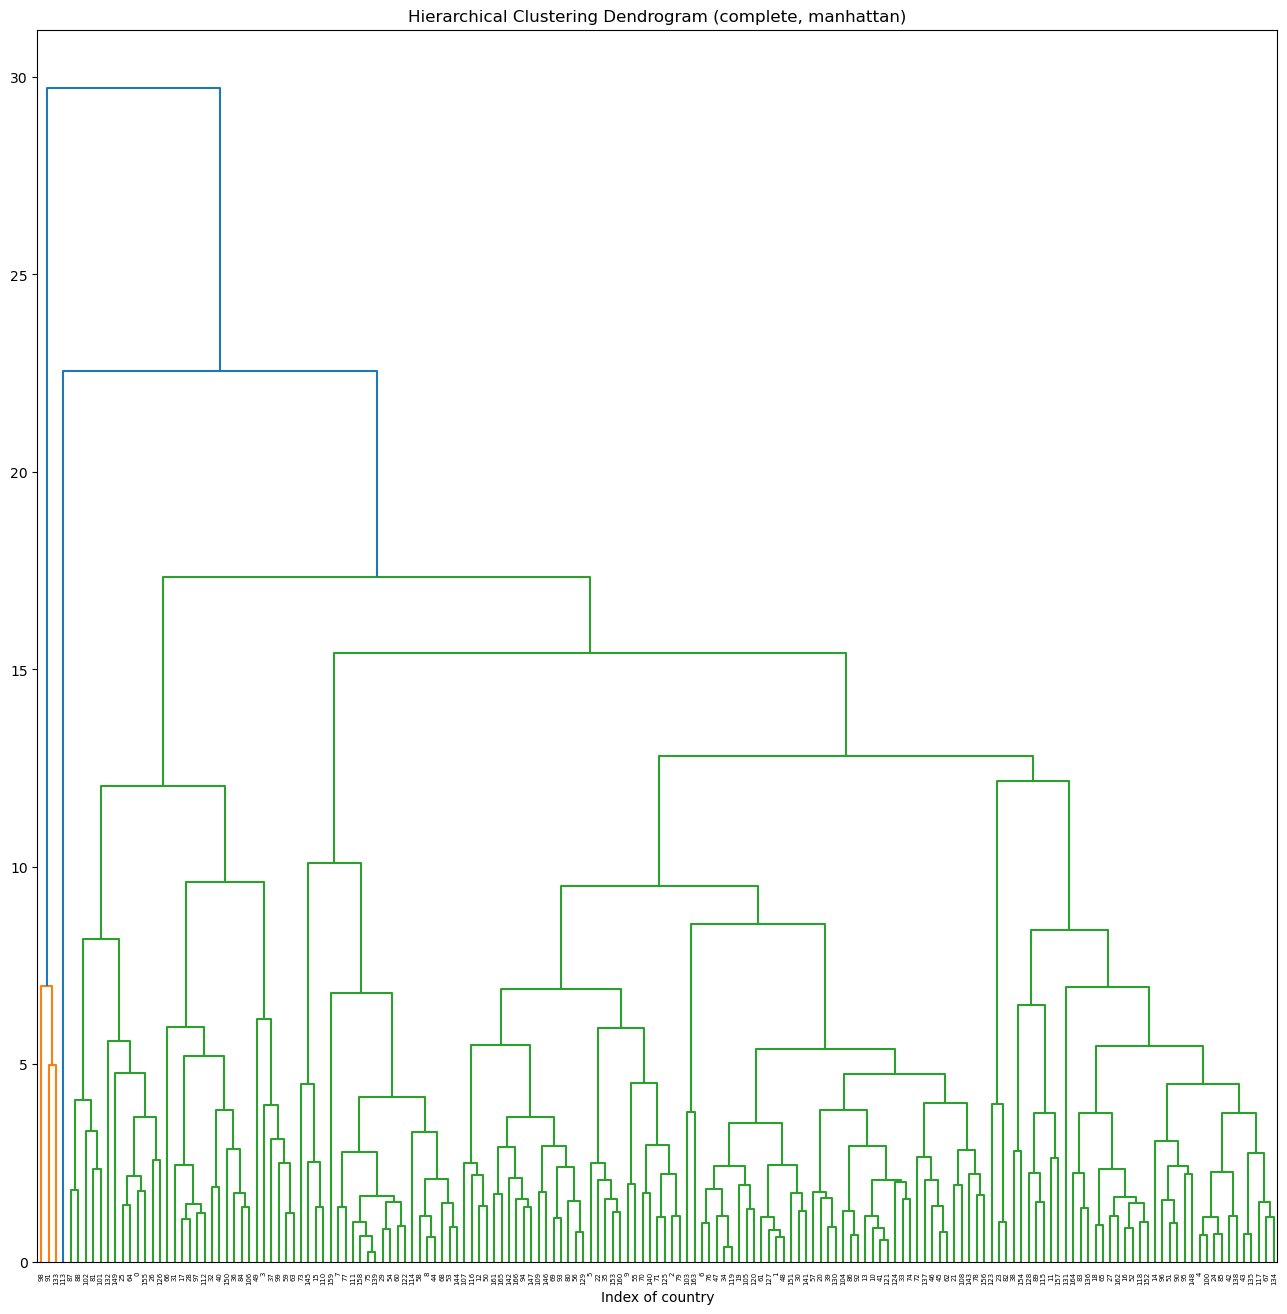

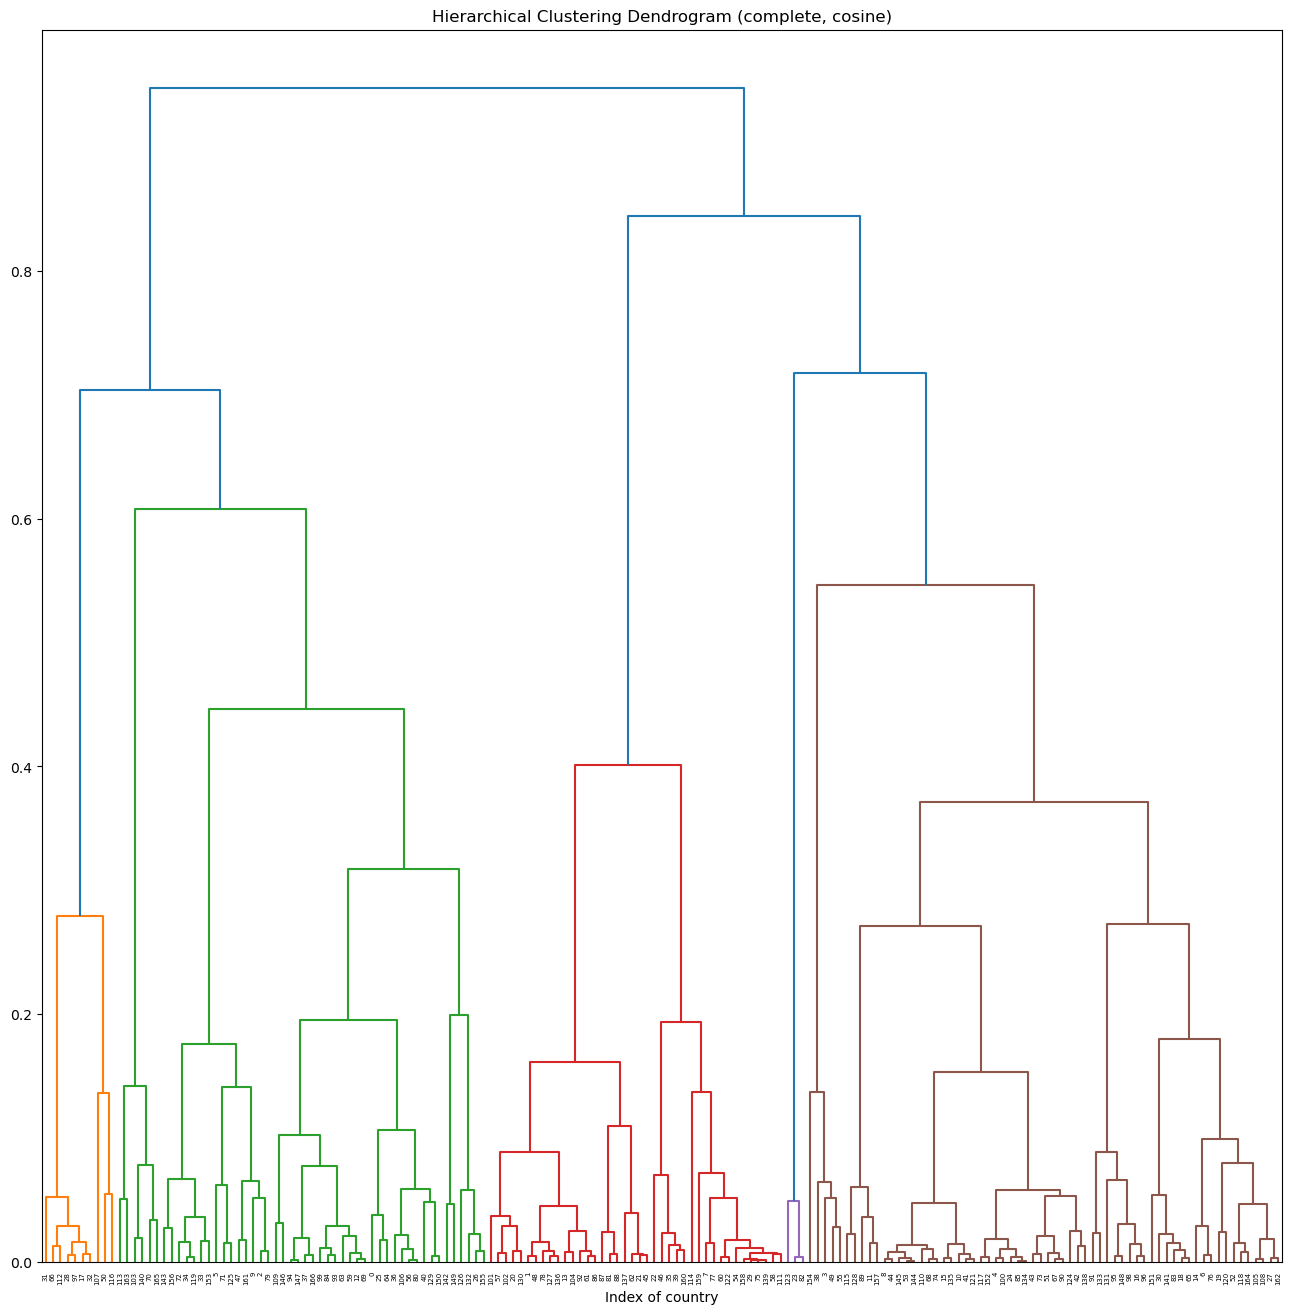

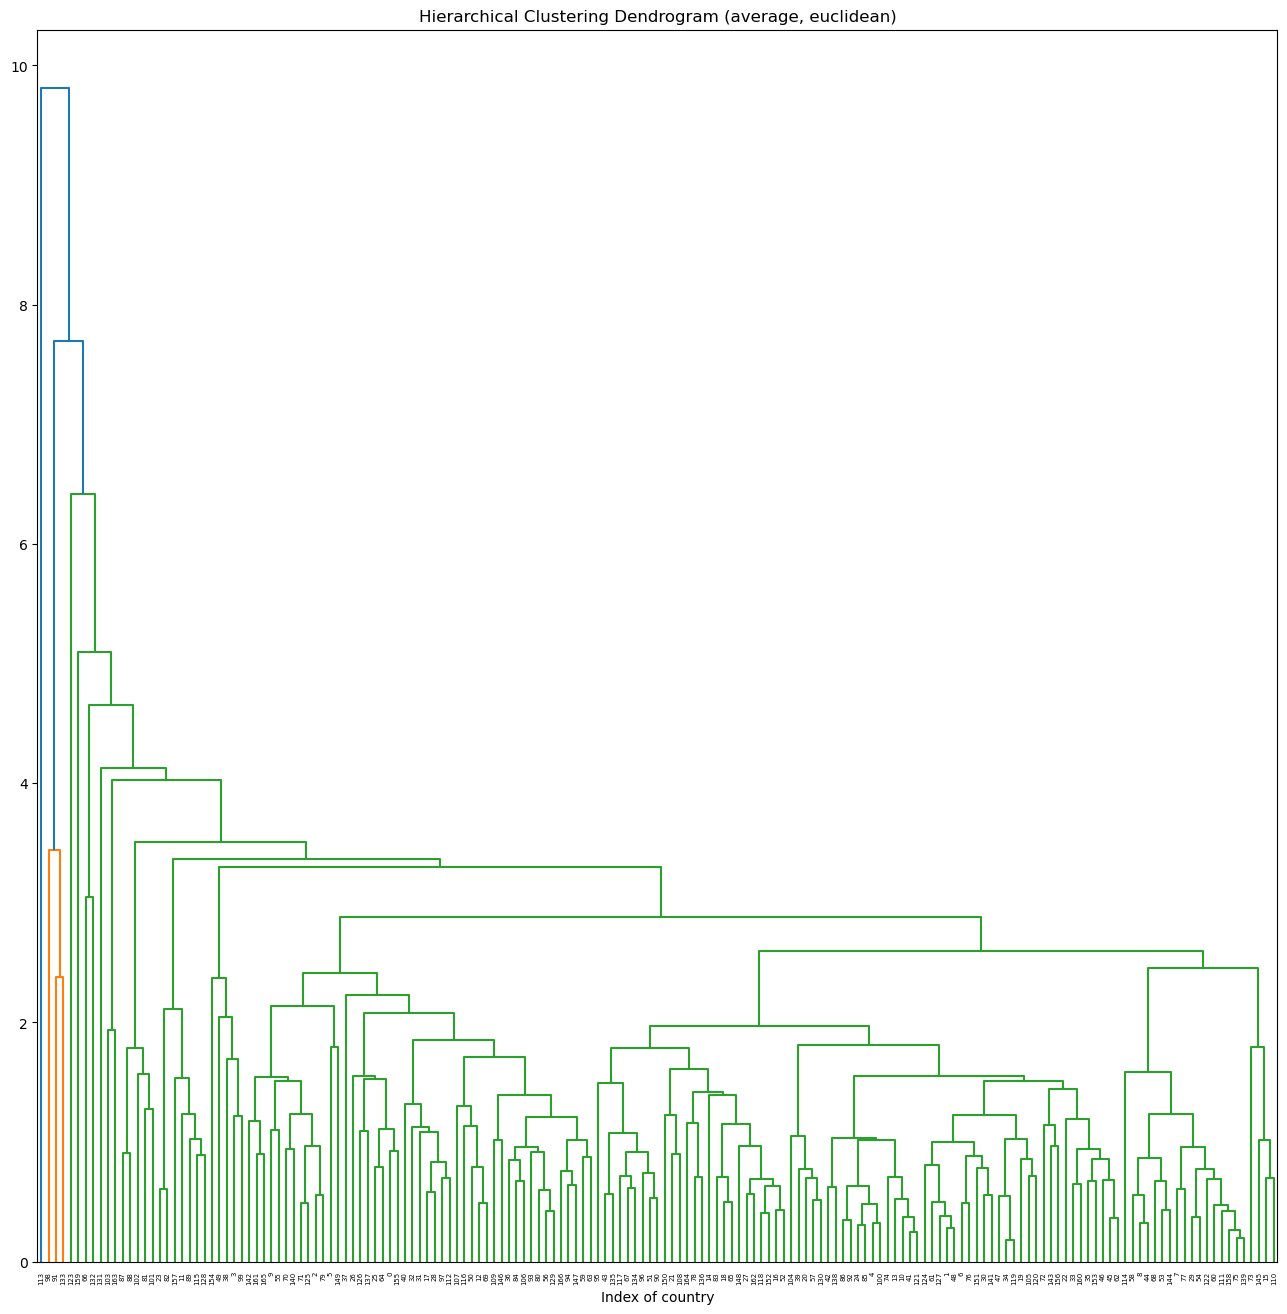

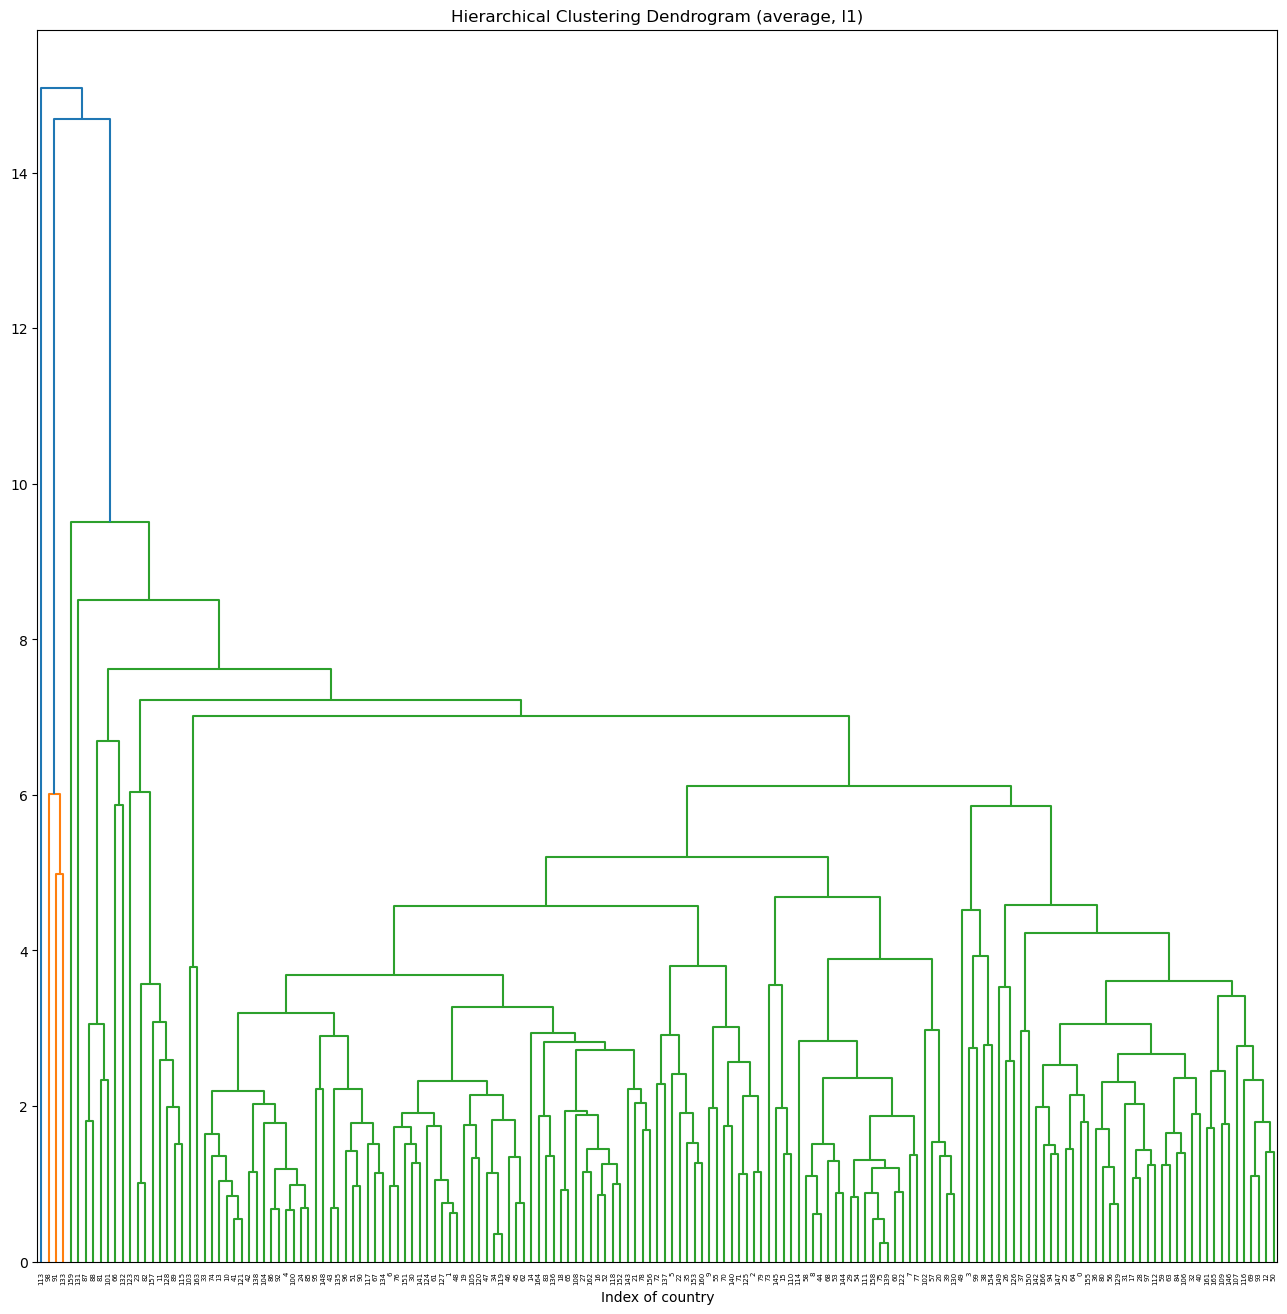

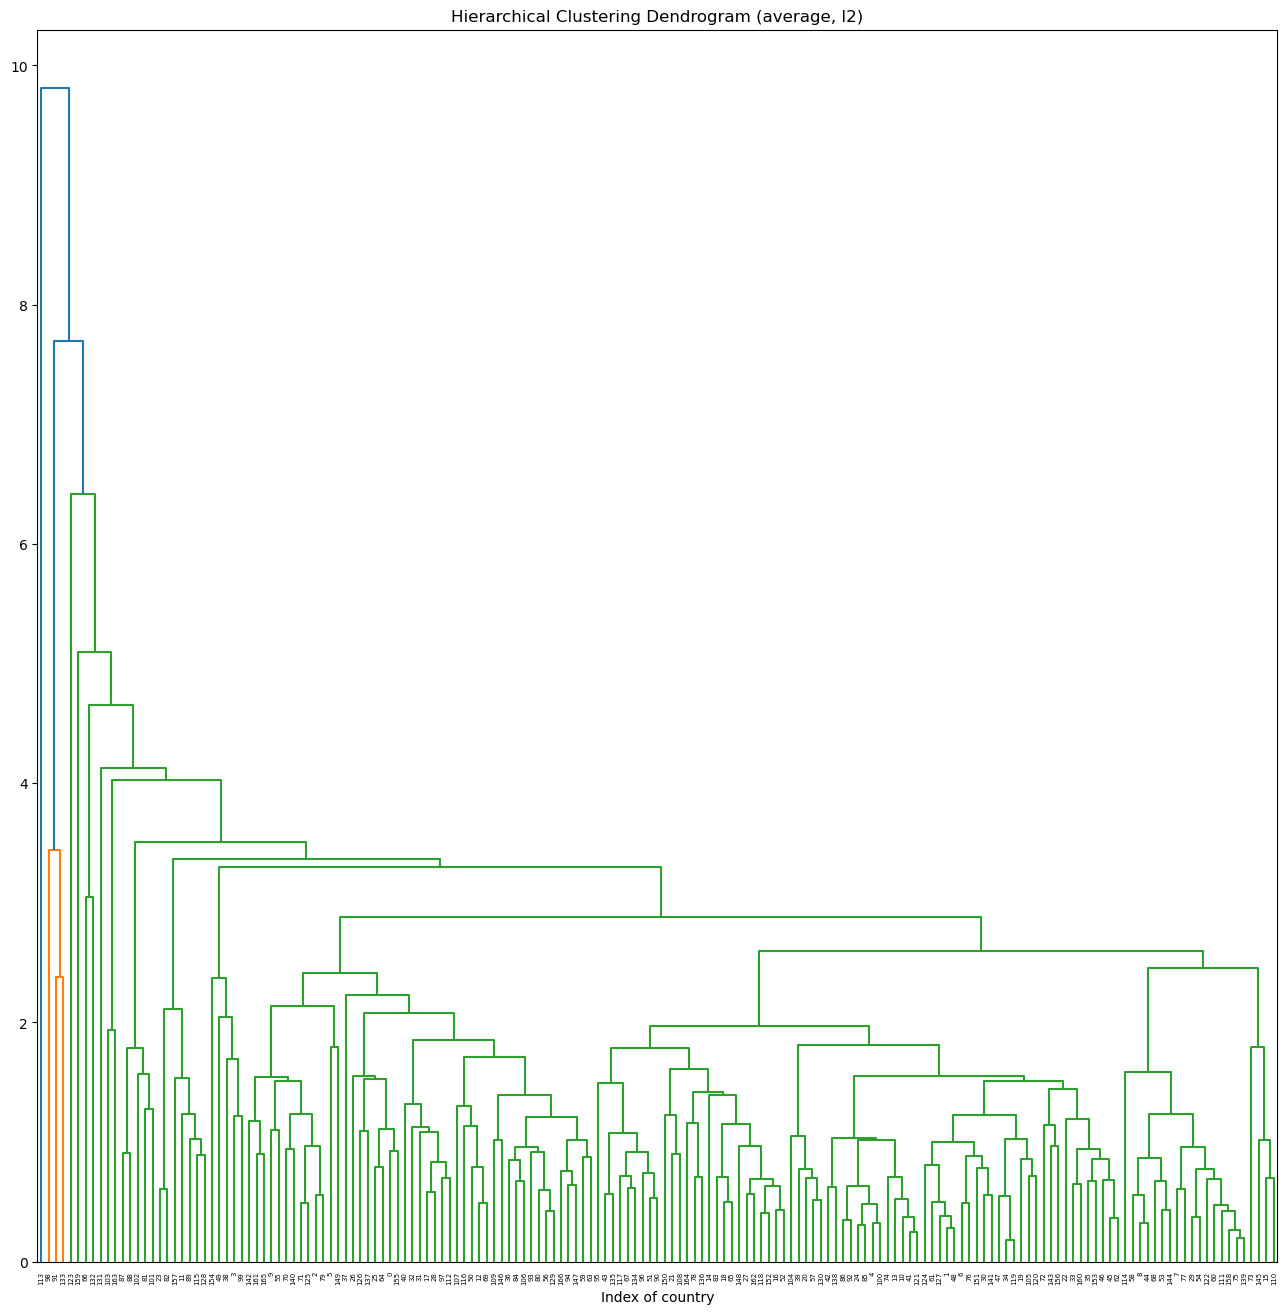

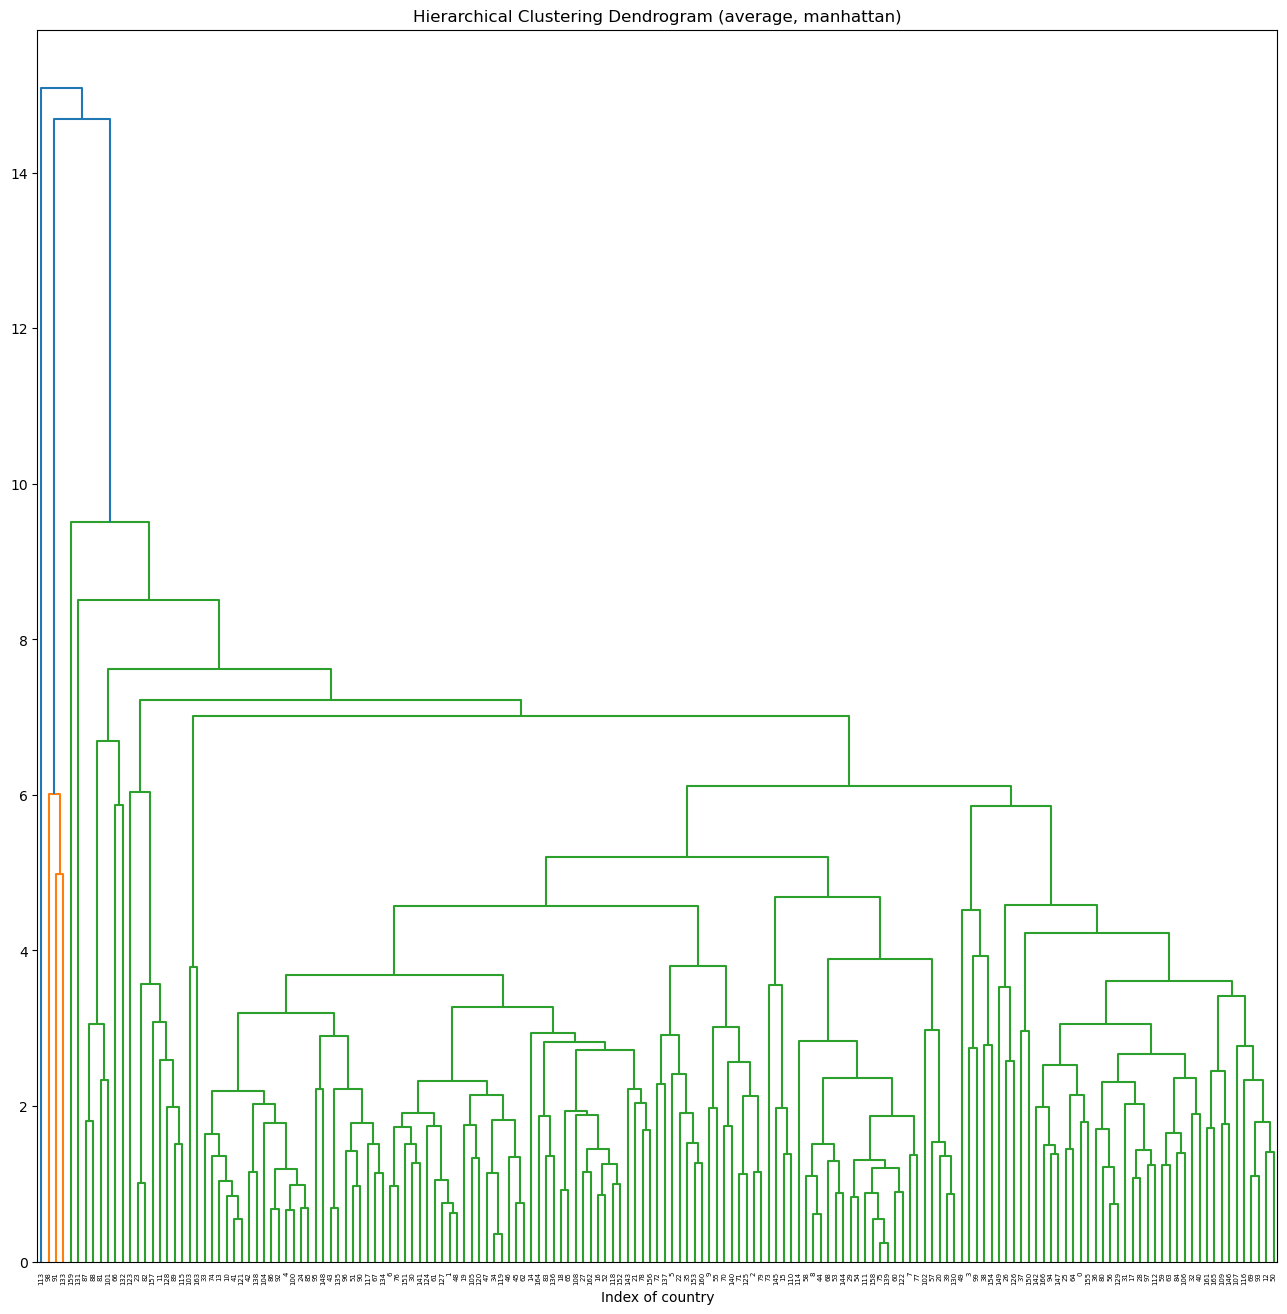

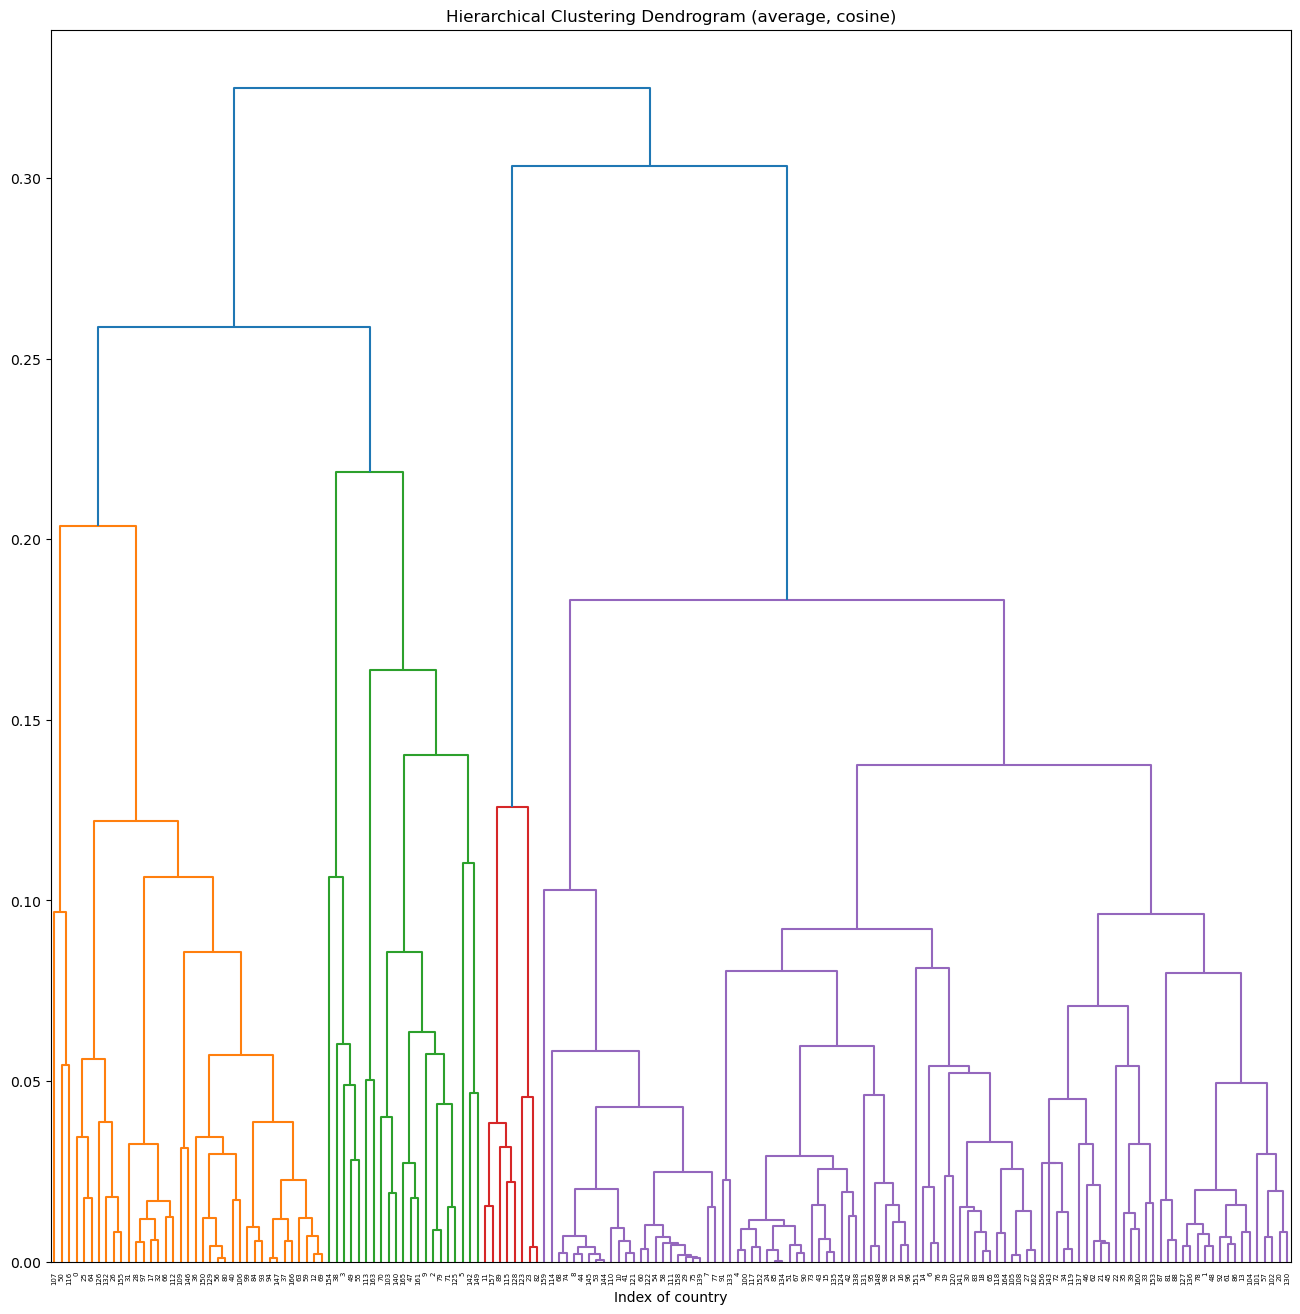

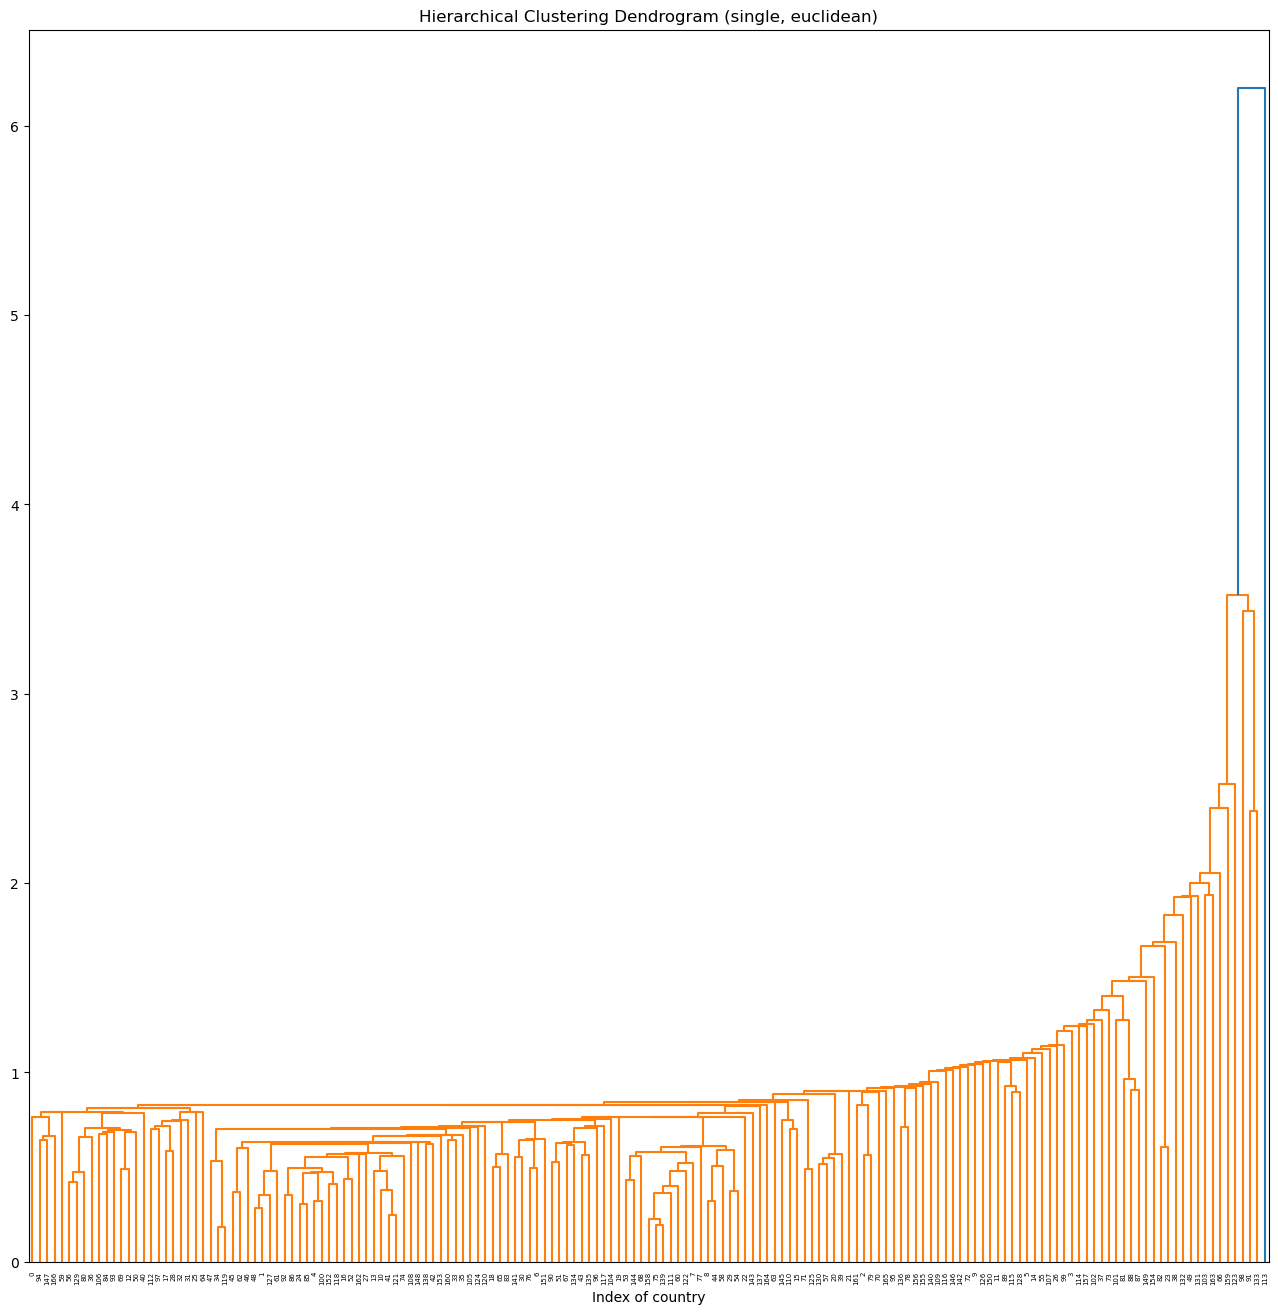

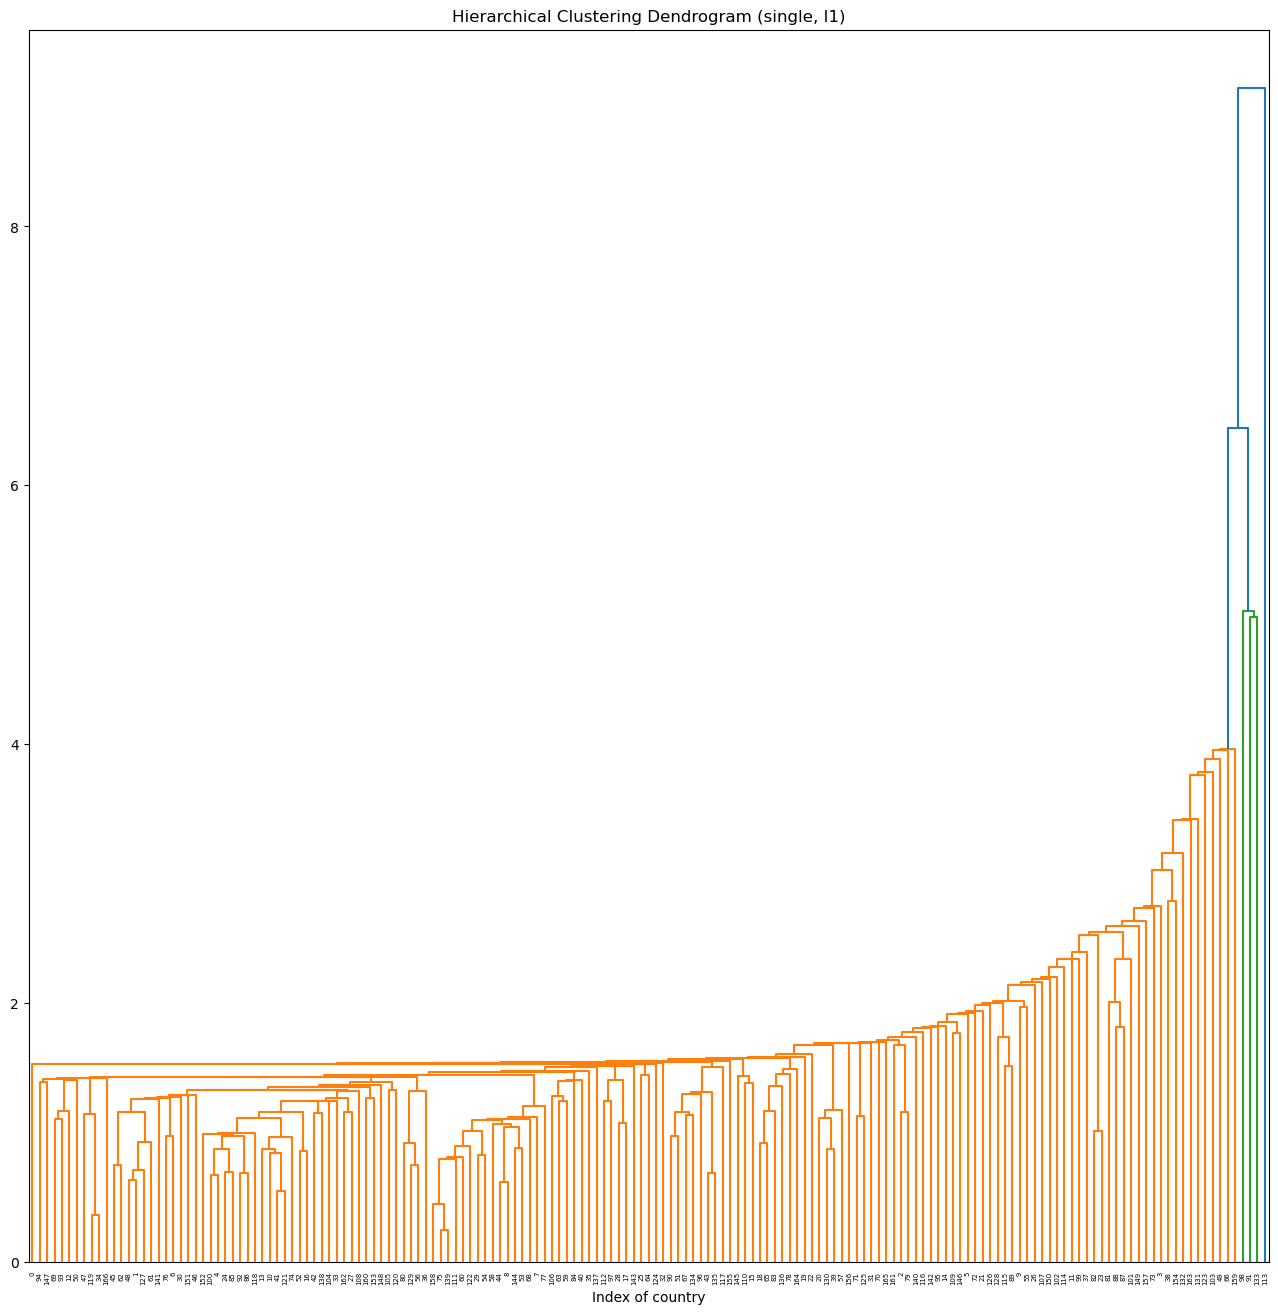

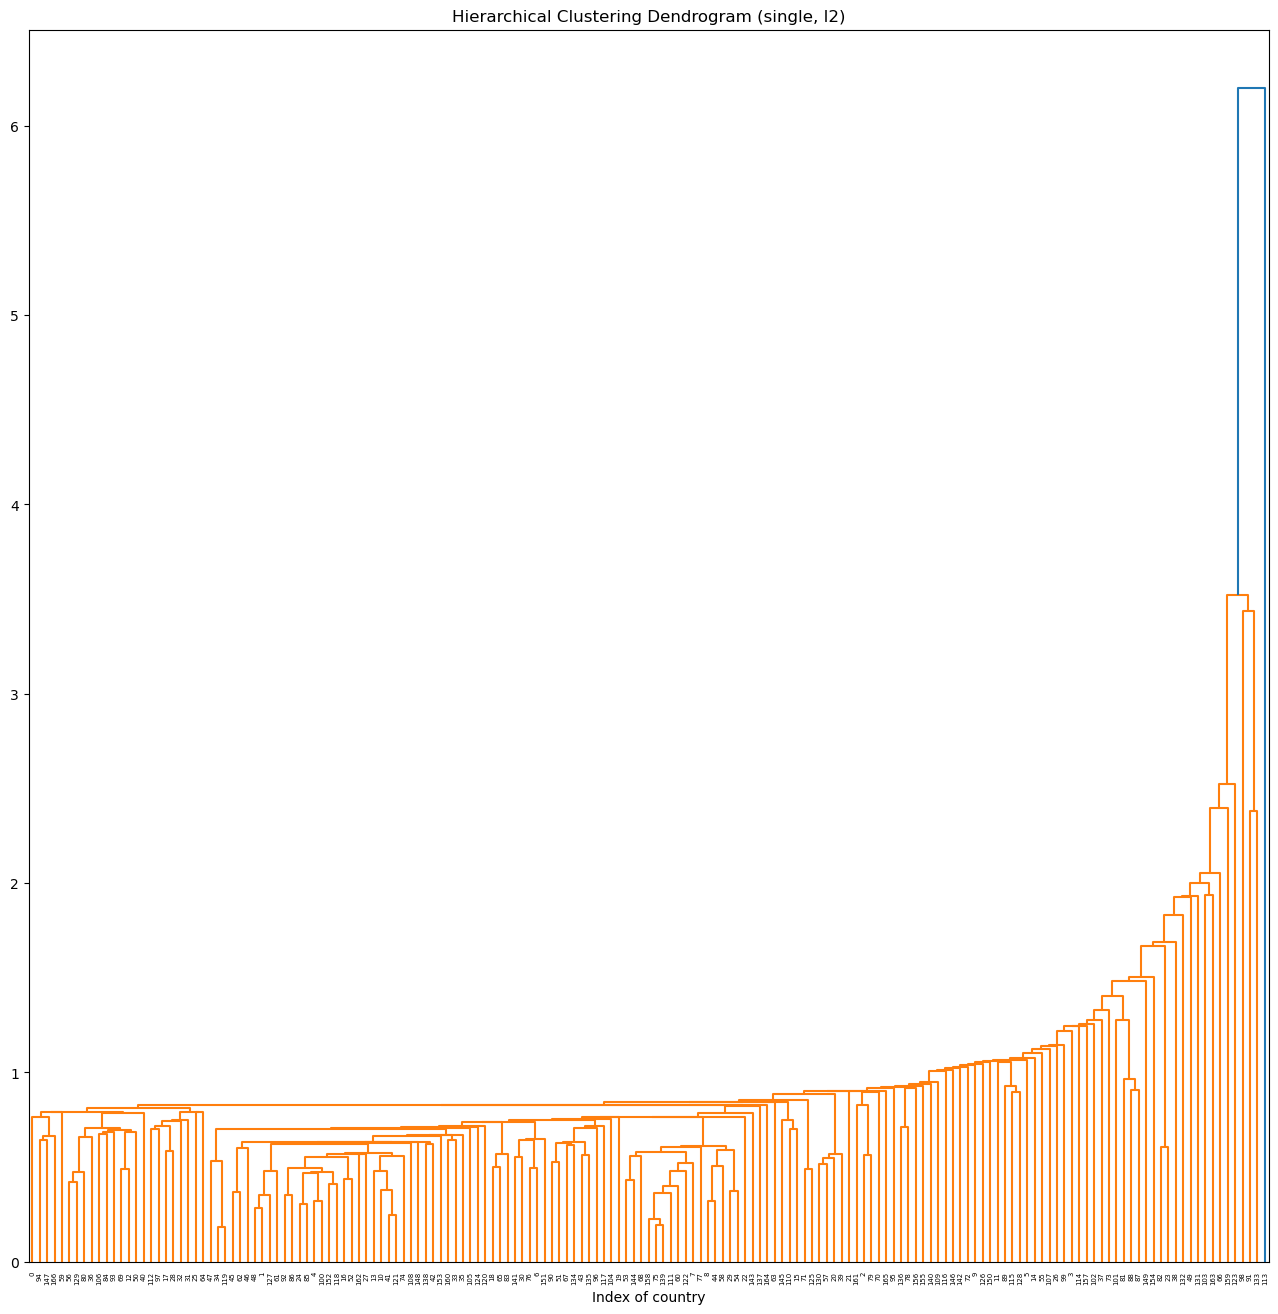

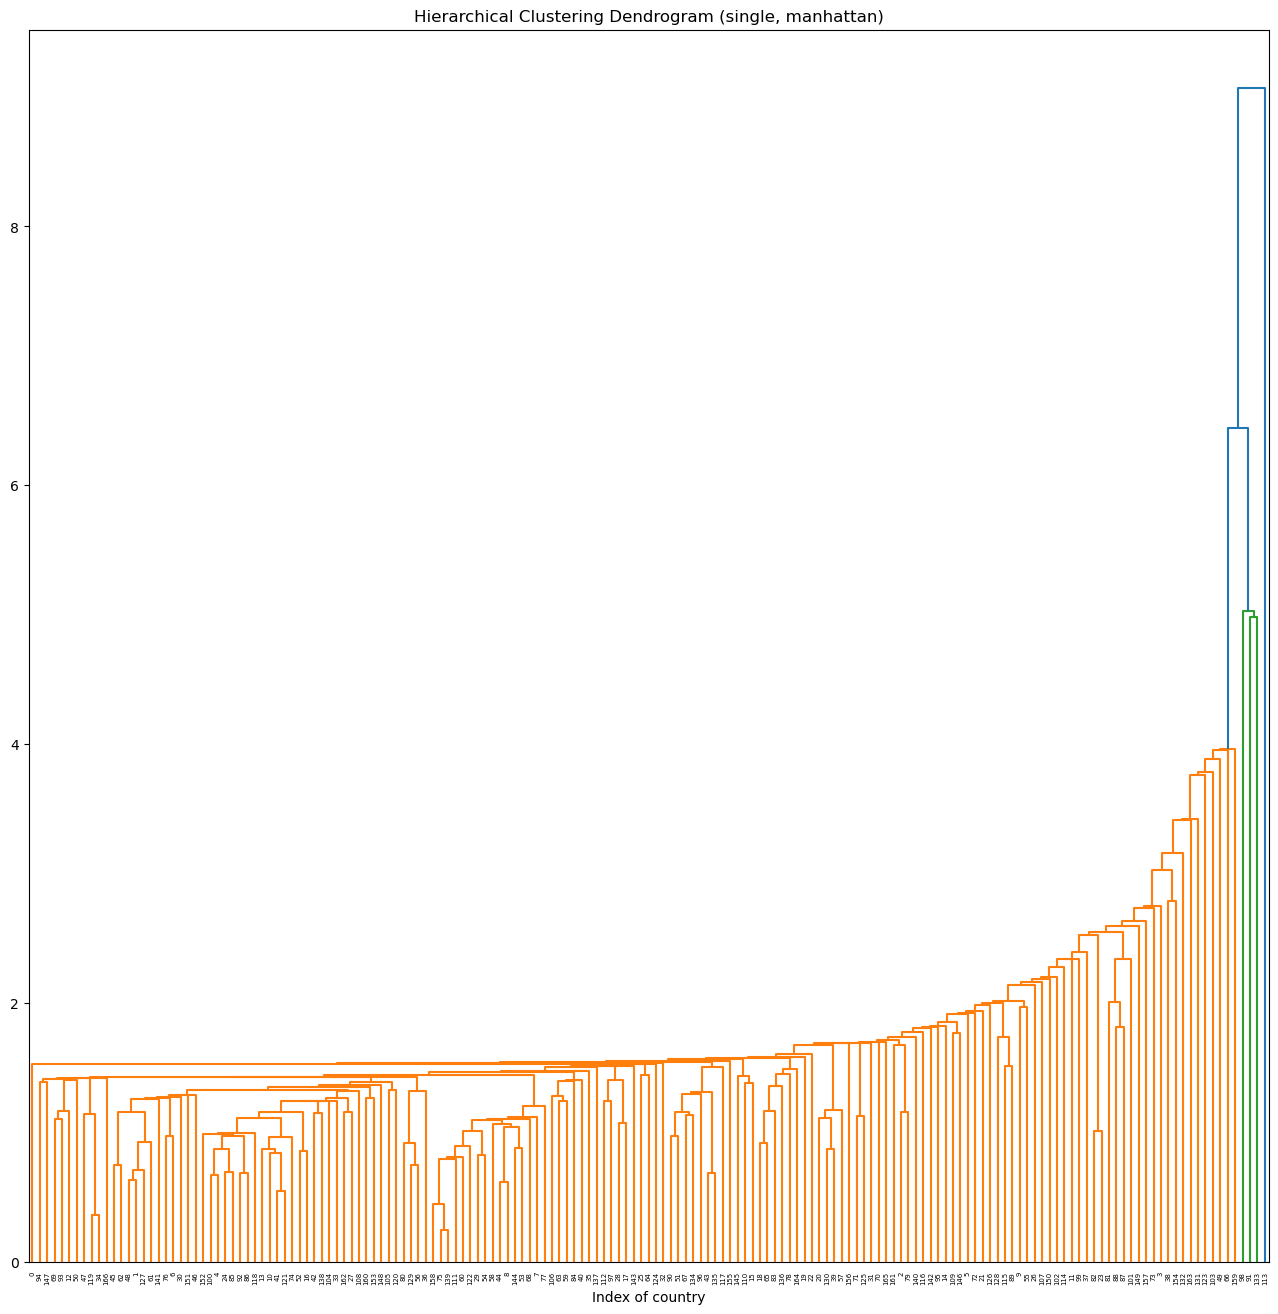

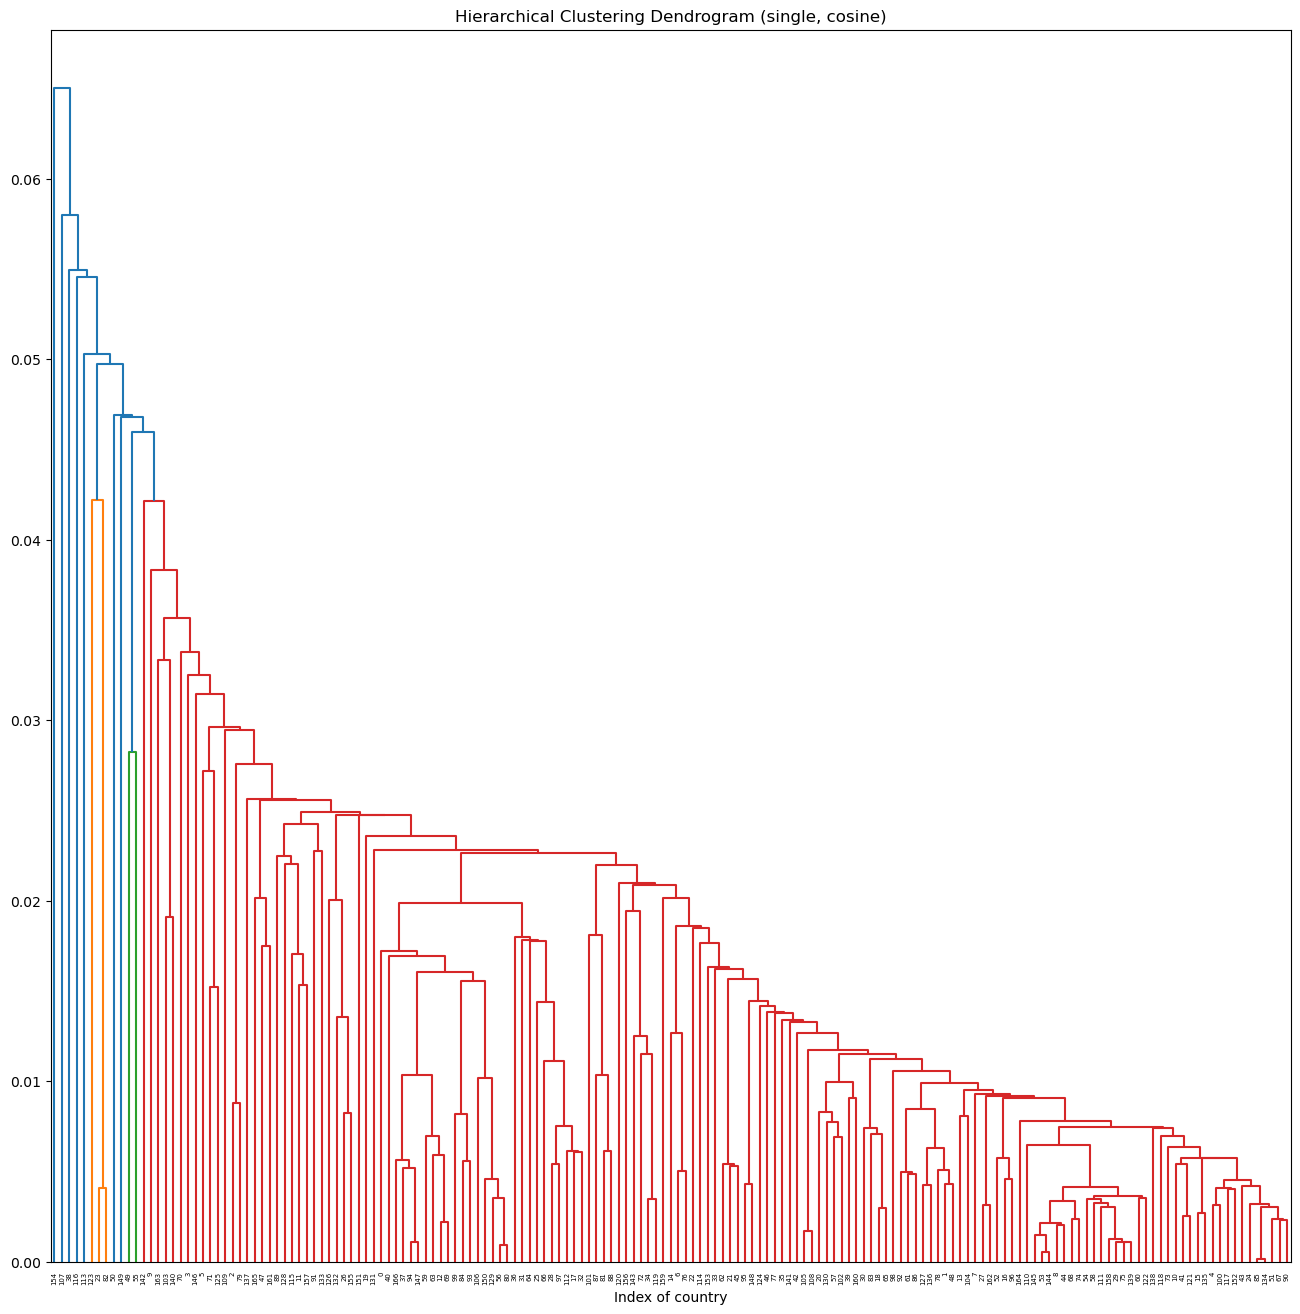

In [28]:
# hyperparameters for hierarchical clustering
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

for linkage in linkage_methods:
    for dm in distance_metrics:
        if linkage == "ward" and not (dm == "euclidean"):
            continue

        # hierarchical clustering
        model_h = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=linkage, metric=dm)
        model_h.fit(country)

        plt.figure(figsize=(16, 16))
        plt.title("Hierarchical Clustering Dendrogram ({}, {})".format(linkage, dm))
        # plot the top three levels of the dendrogram
        plot_dendrogram(model_h)
        plt.xlabel("Index of country")
        plt.show()

---
According to the above results, most of the combinations of linkage methods and distance metrics show the similar result which indicates that the countries should be categorized into three groups.I choose the linkage method to be `average` and the distance metric to be `euclidean`. 

In [29]:
n_clusters = 3
linkage = 'average'
metric = 'euclidean'

# hierarchical clustering
model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
model.fit(country)

groups = []
for i in range(n_clusters):
    groups.append([])
    
for i in range(len(model.labels_)):
    label = model.labels_[i]
    groups[label].append(country_names[i])

for i in range(n_clusters):
    print("Group {} contains: ".format(i))
    print(groups[i])
    print()
    display(country_original.loc[country_original['country'].isin(groups[i])].head())
    print()

Group 0 contains: 
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya'

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200



Group 1 contains: 
['Nigeria']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330



Group 2 contains: 
['Luxembourg', 'Malta', 'Singapore']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


---
According to the above result, one group consists of Nigeria only, which can be considered to be in the worst condition. Another group consists of three countries, Luxembourg, Malta and Singapore, which are in the best condition. And all the other countries are in the last group.

## 3.4 PCA + Hierarchical Clustering

Next, I try to perform Hierarchical Clustering on the 2-dimensional latent space obtained by PCA.

Explained variance ratio: [0.39064323 0.21984372]


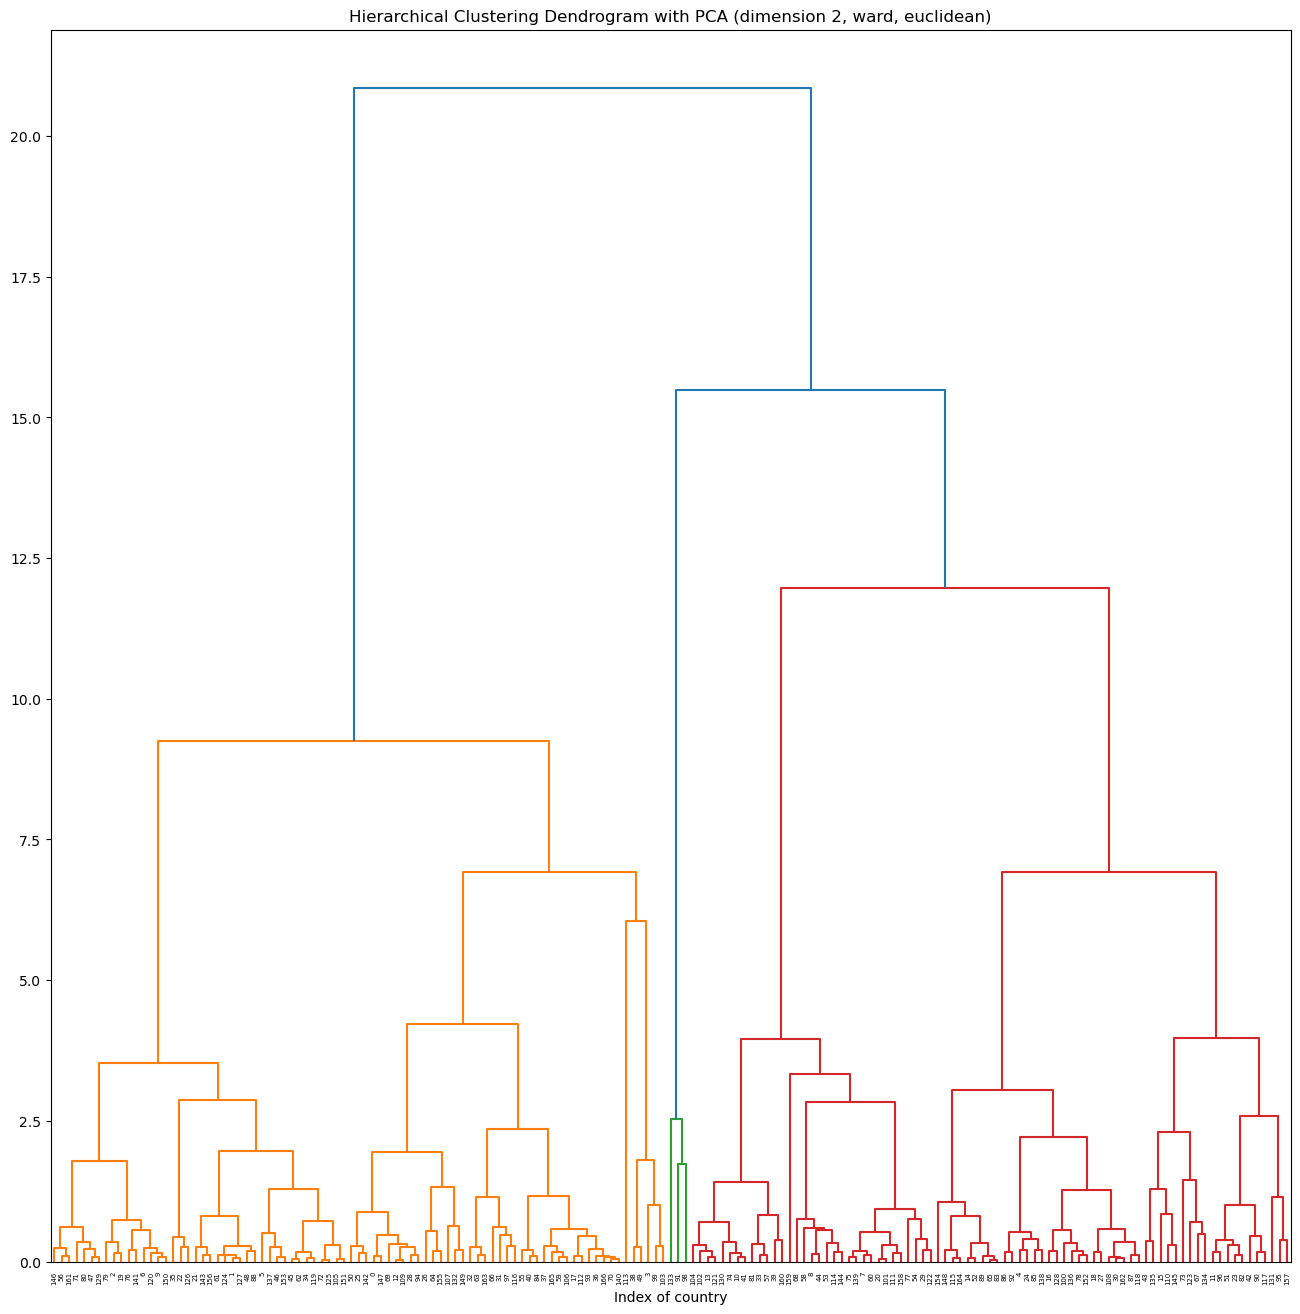

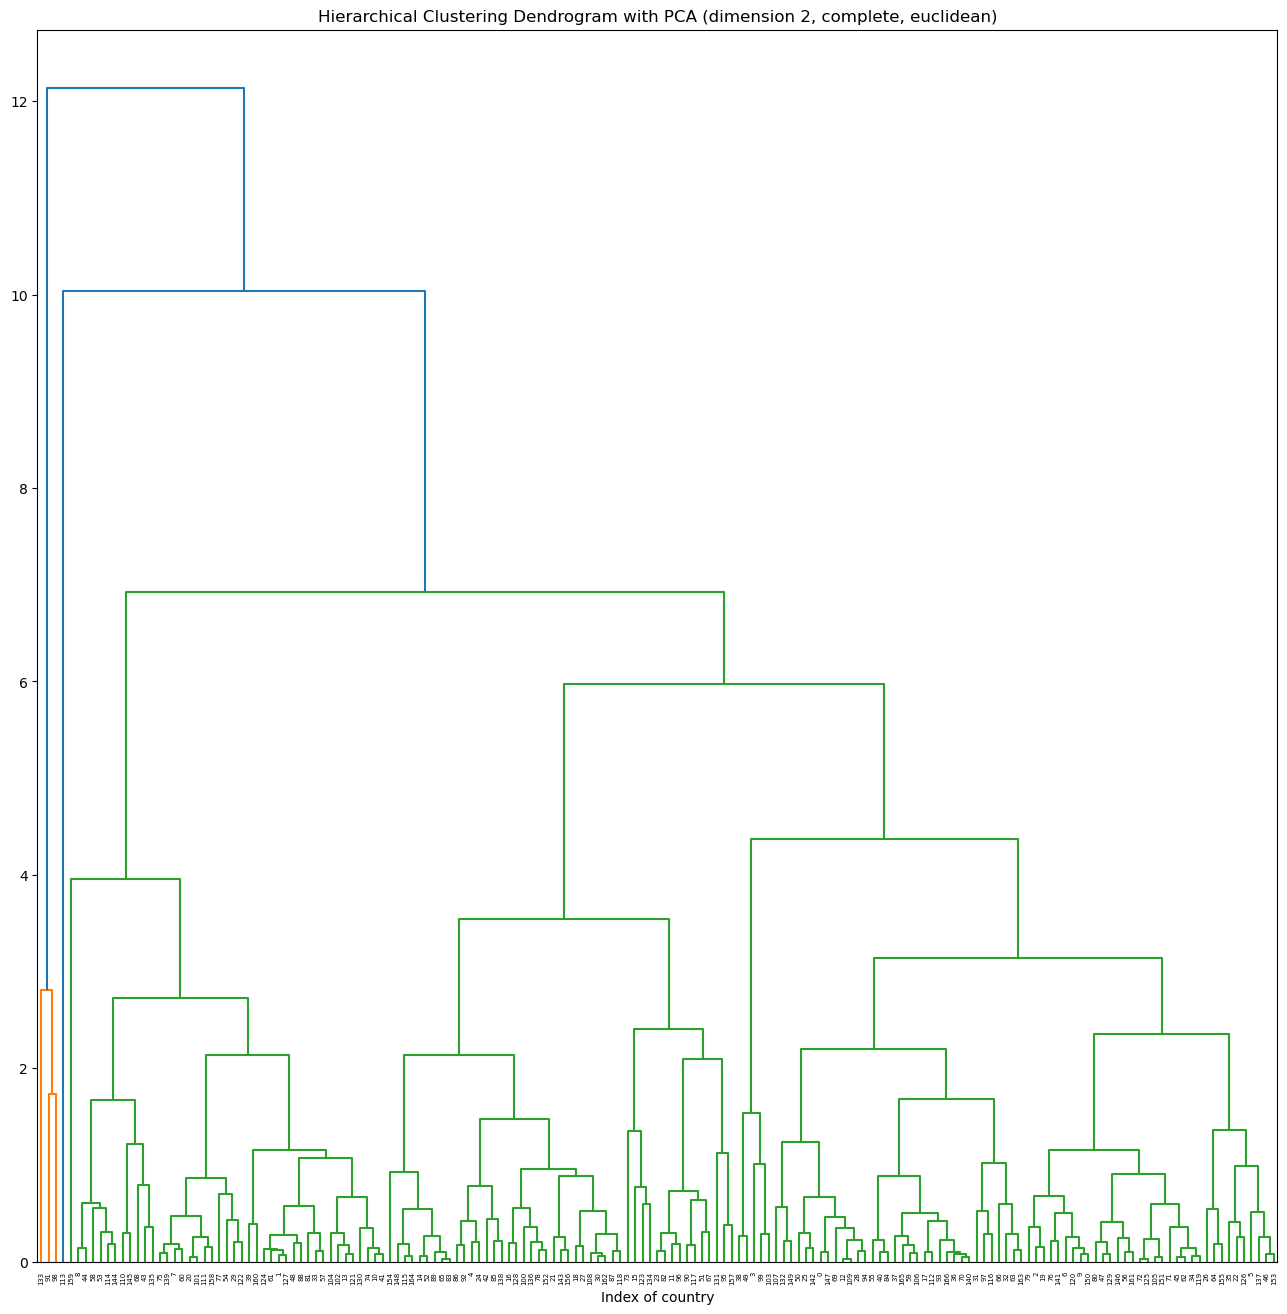

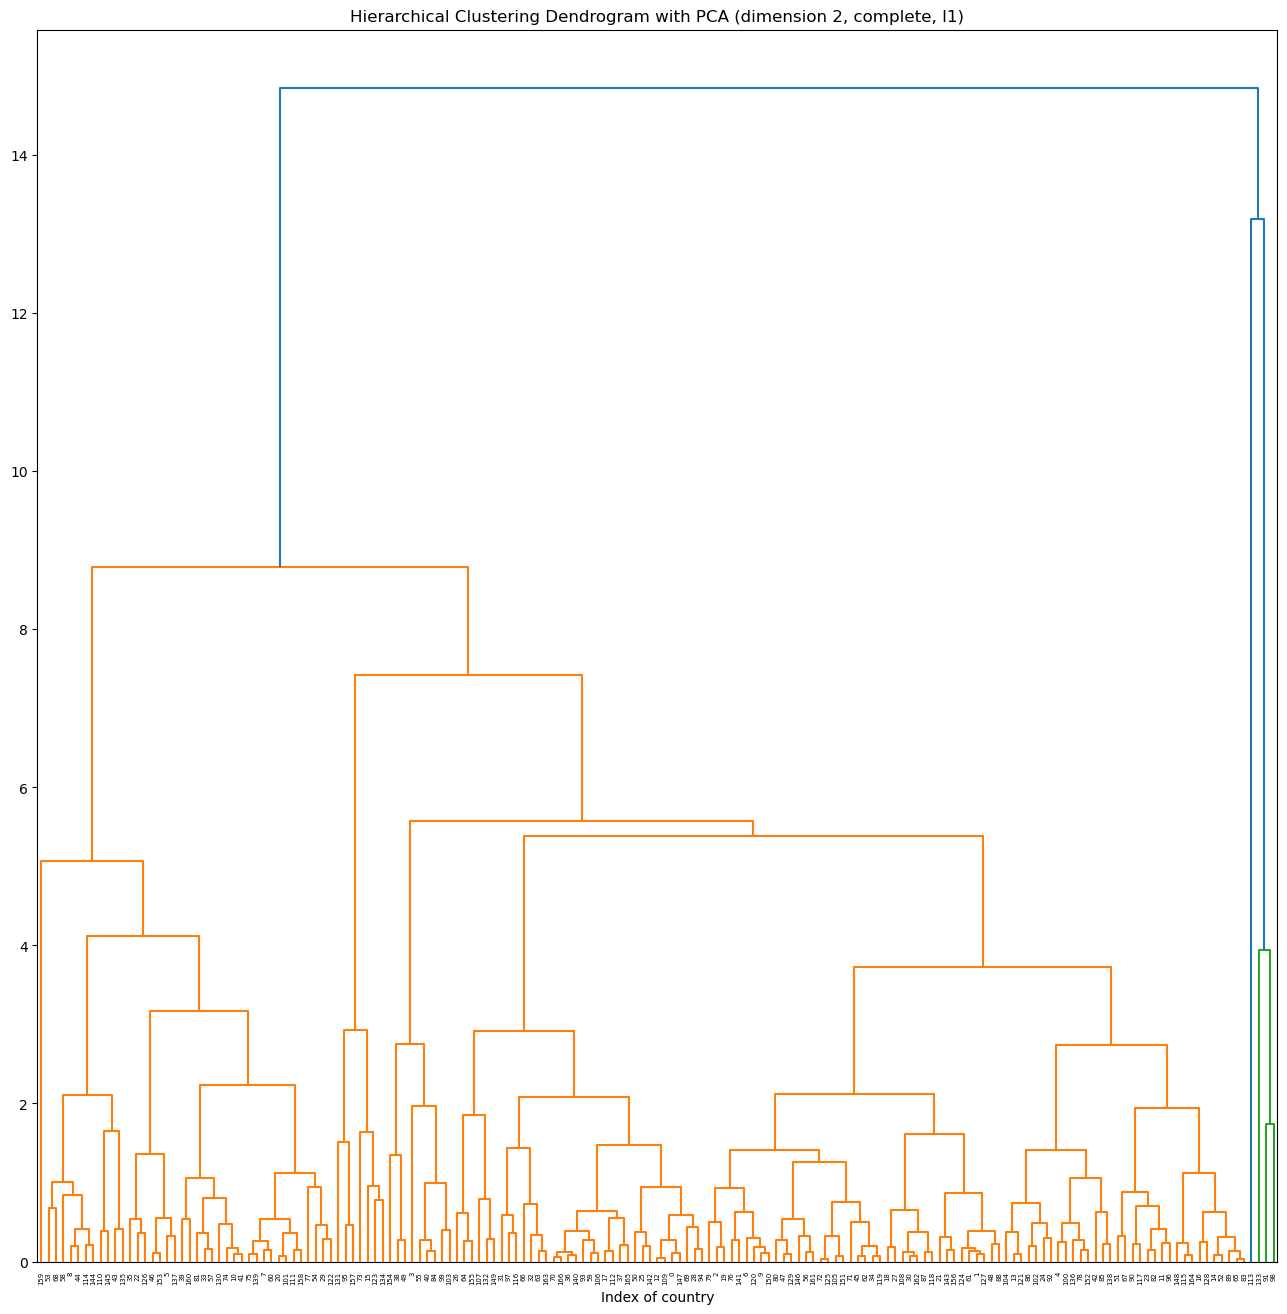

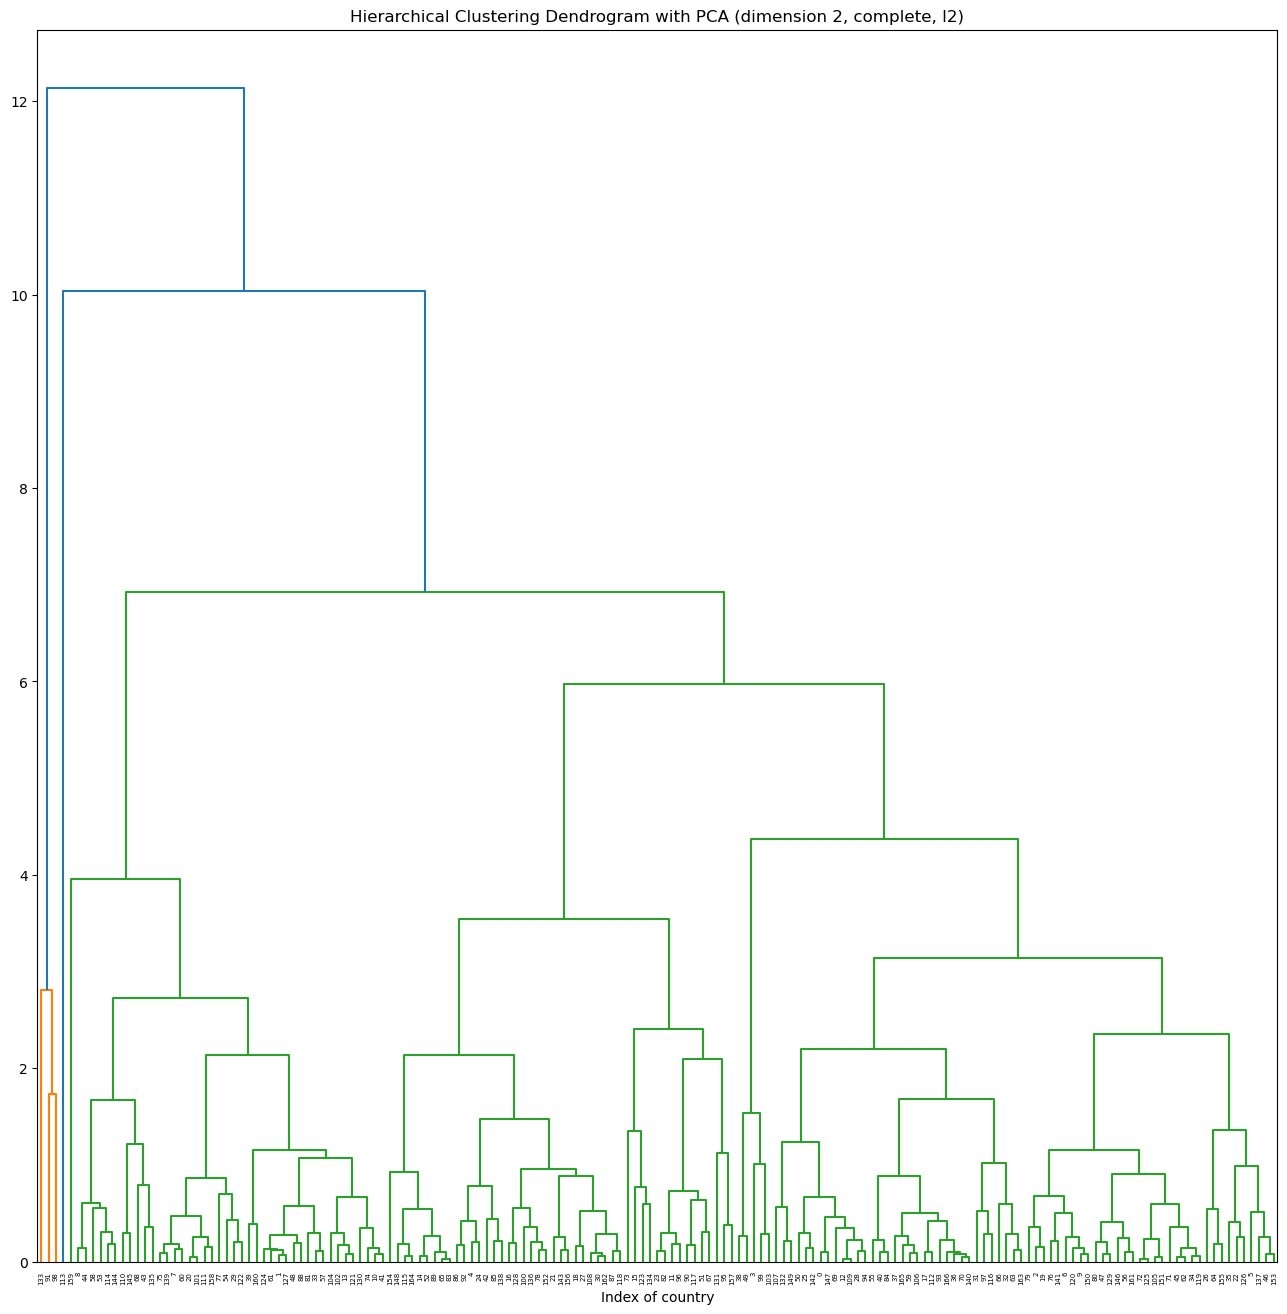

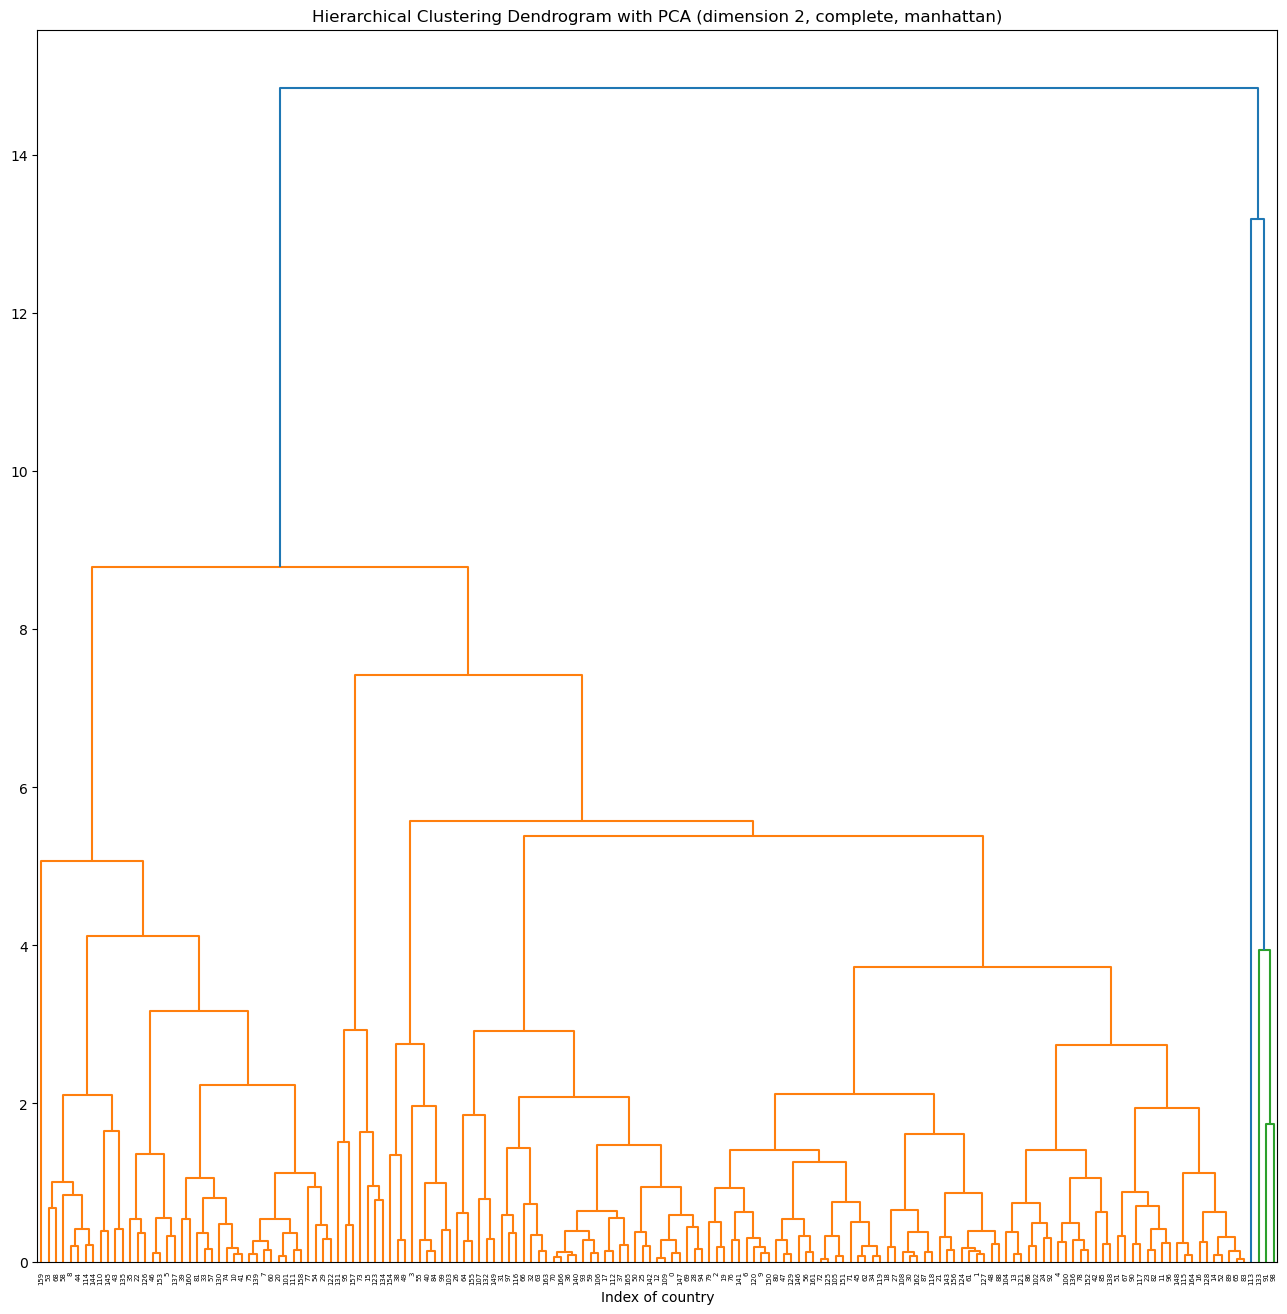

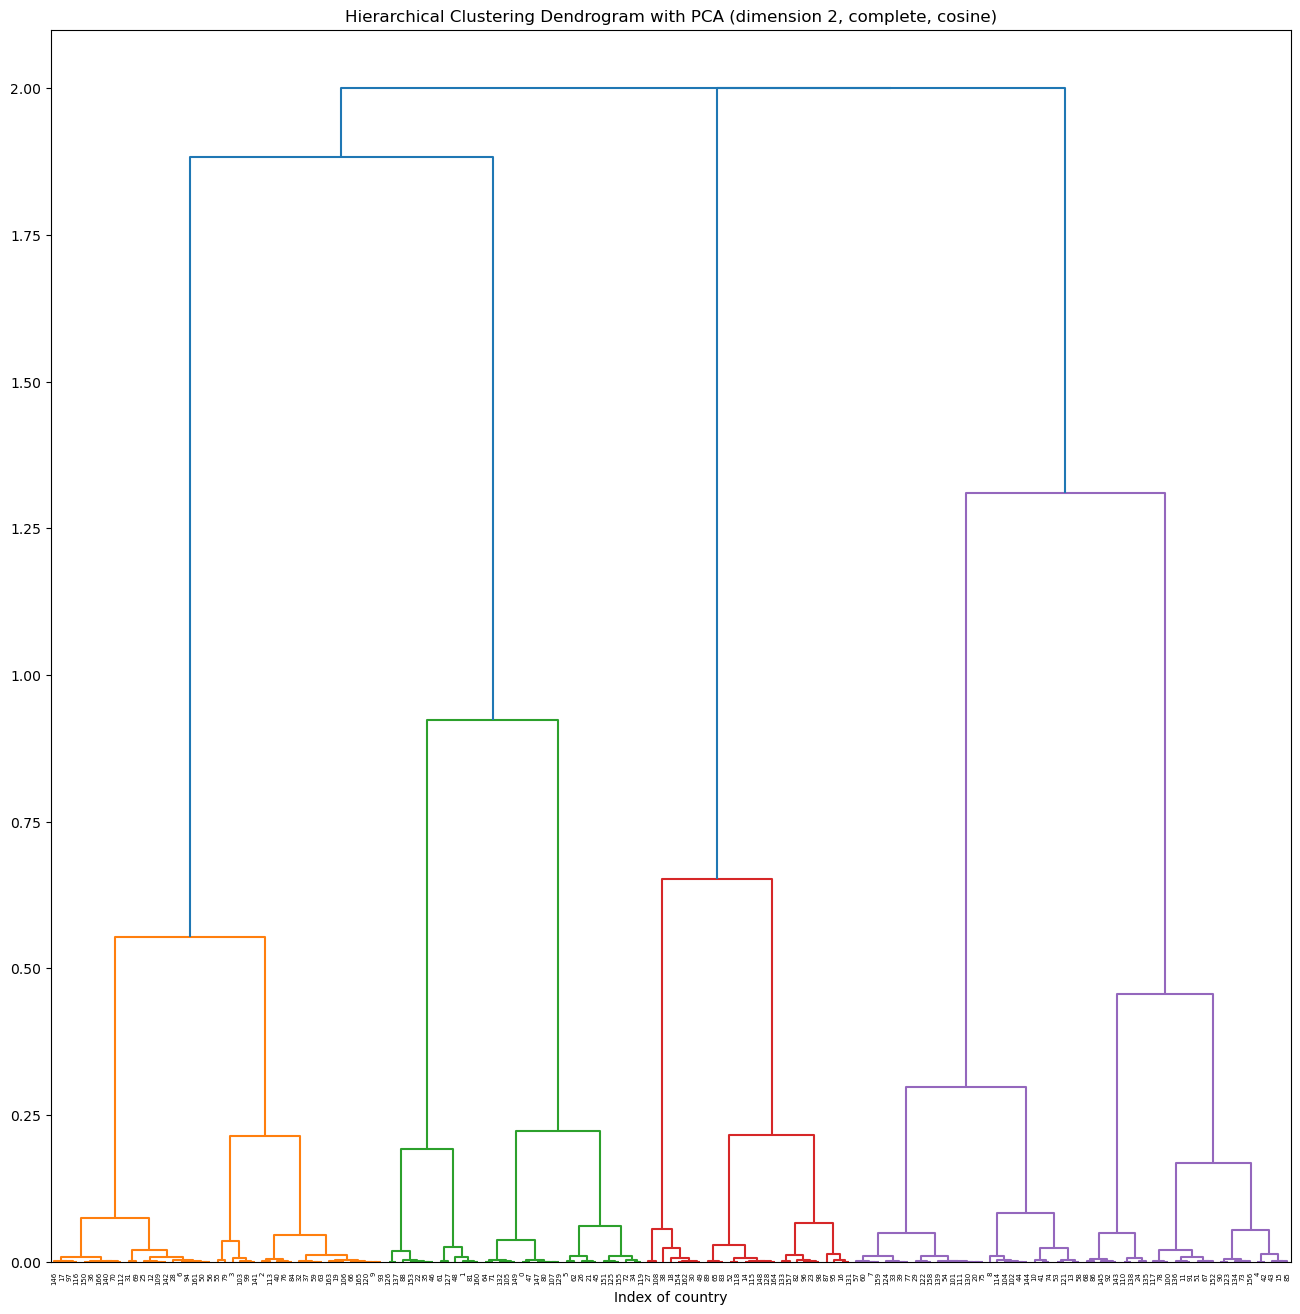

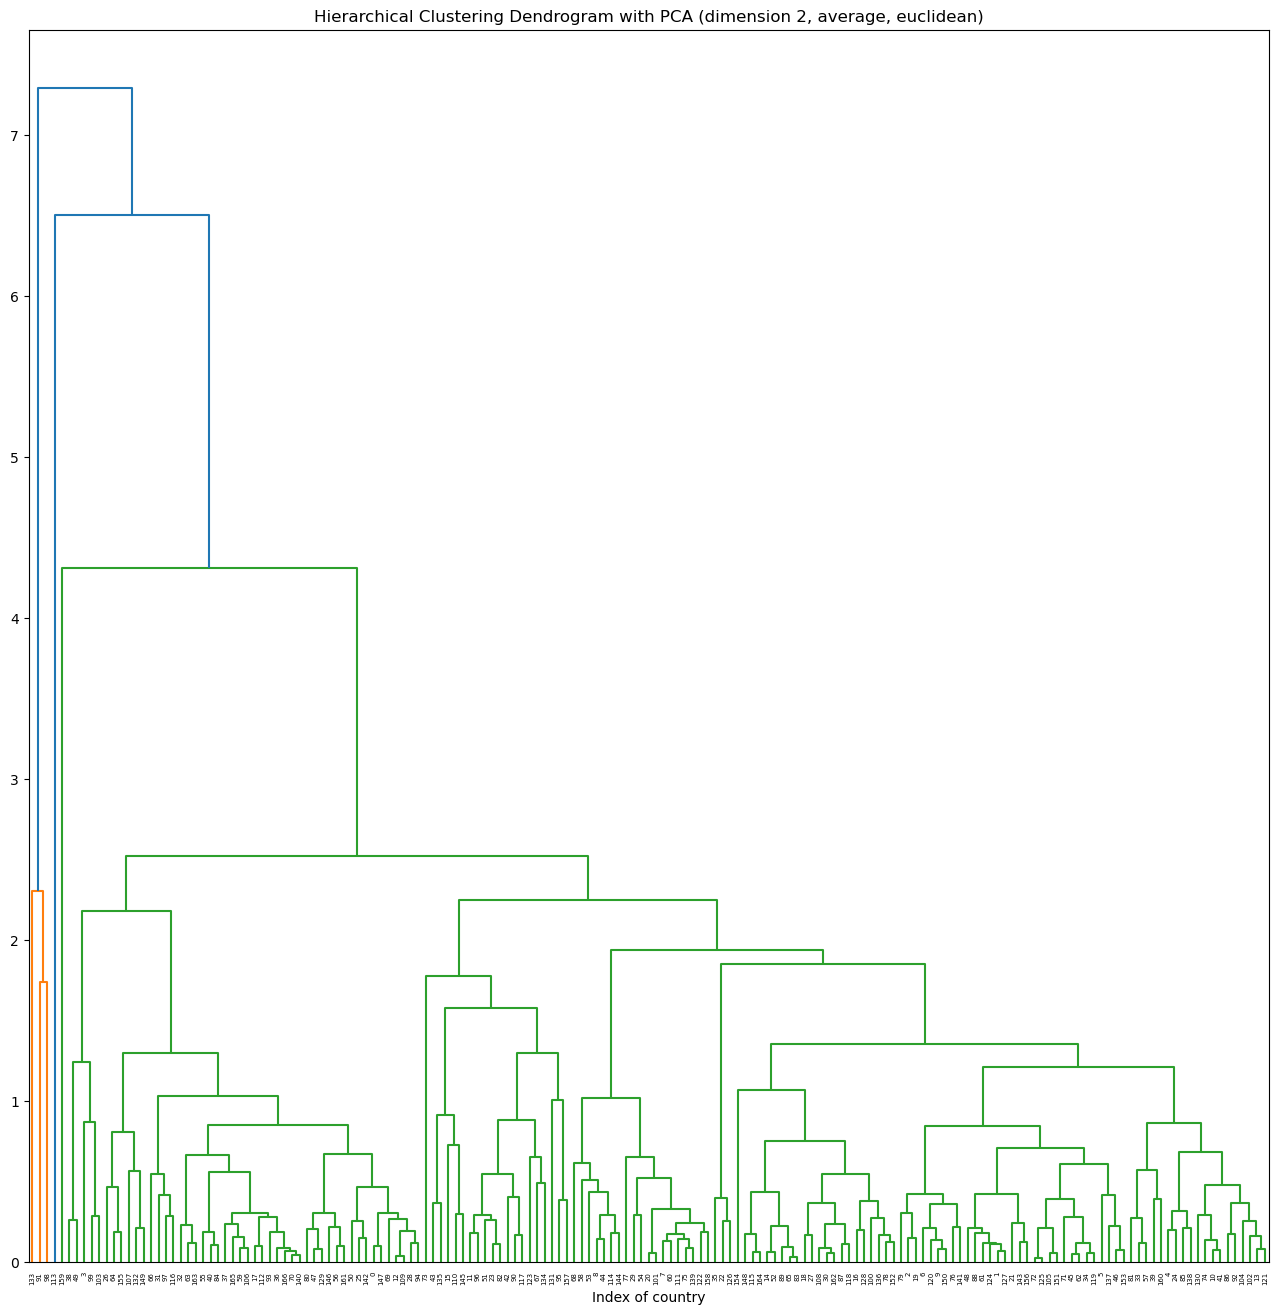

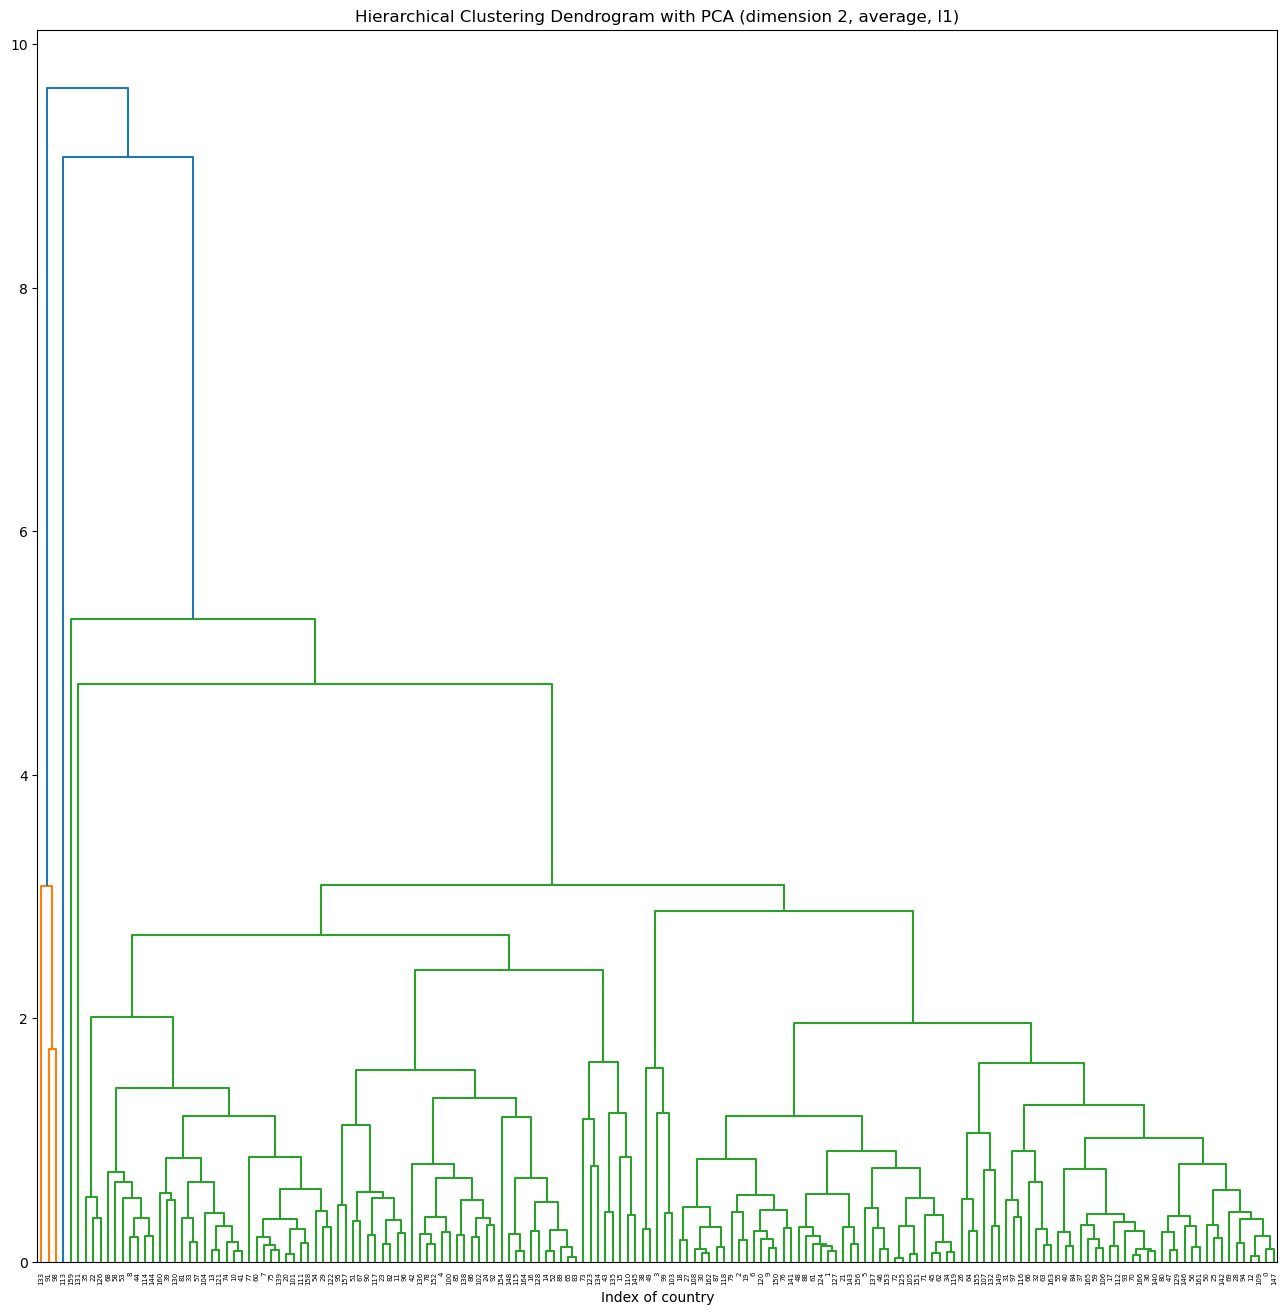

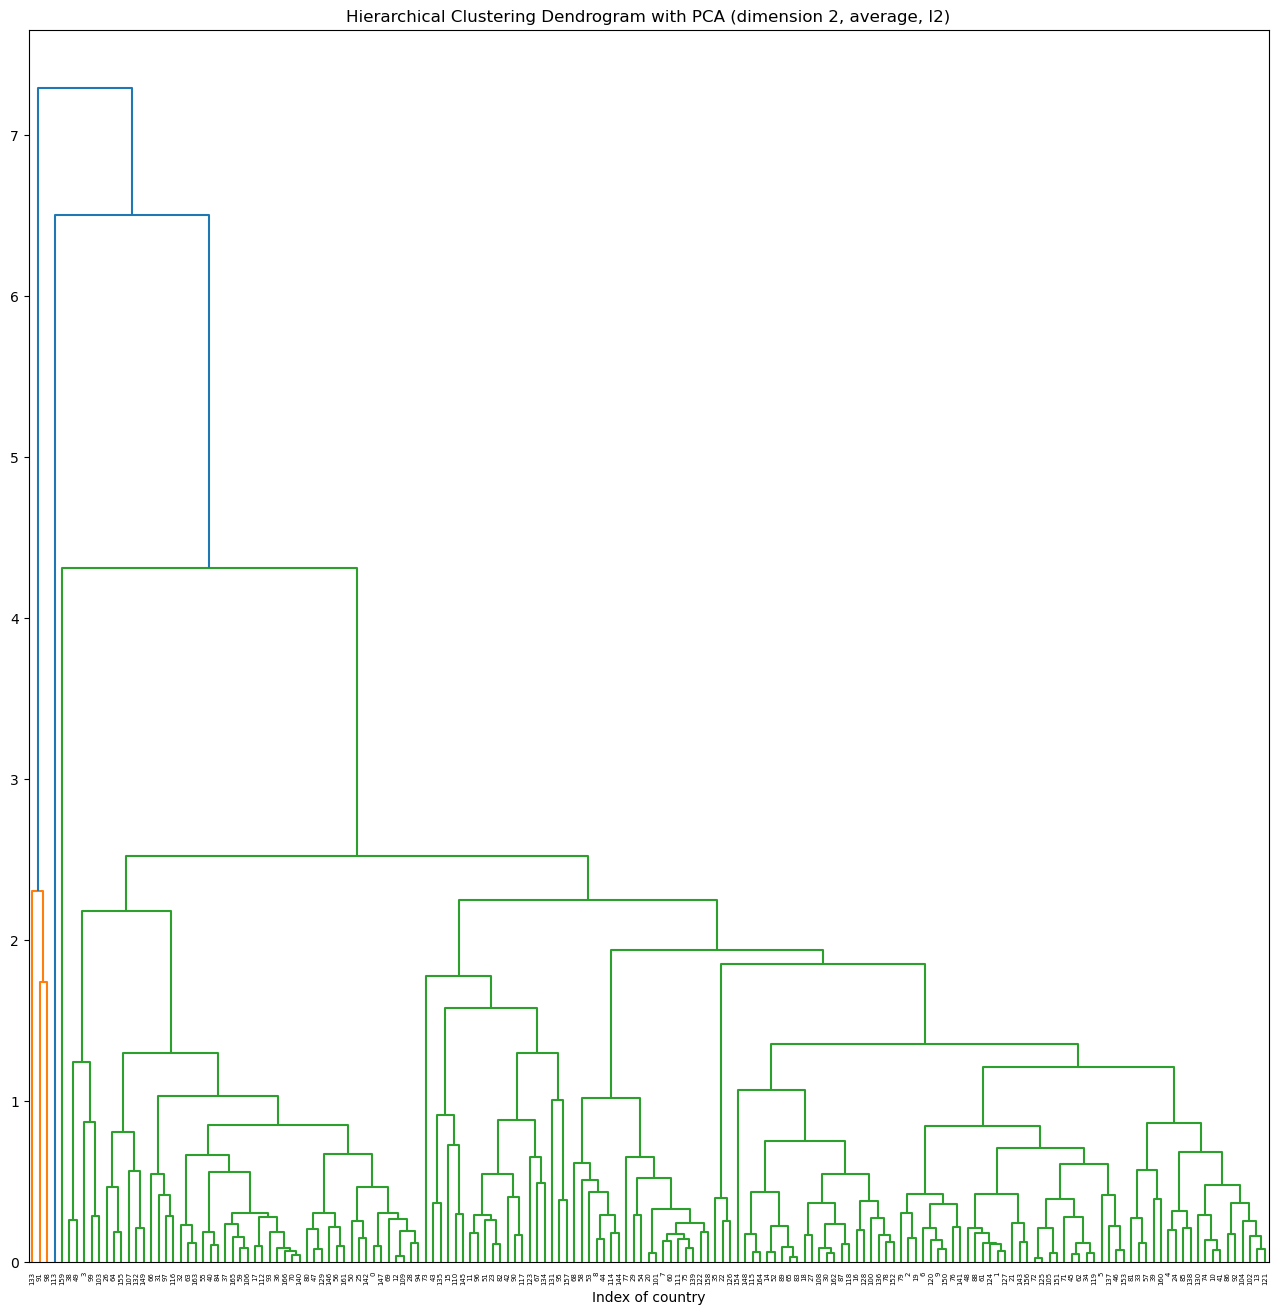

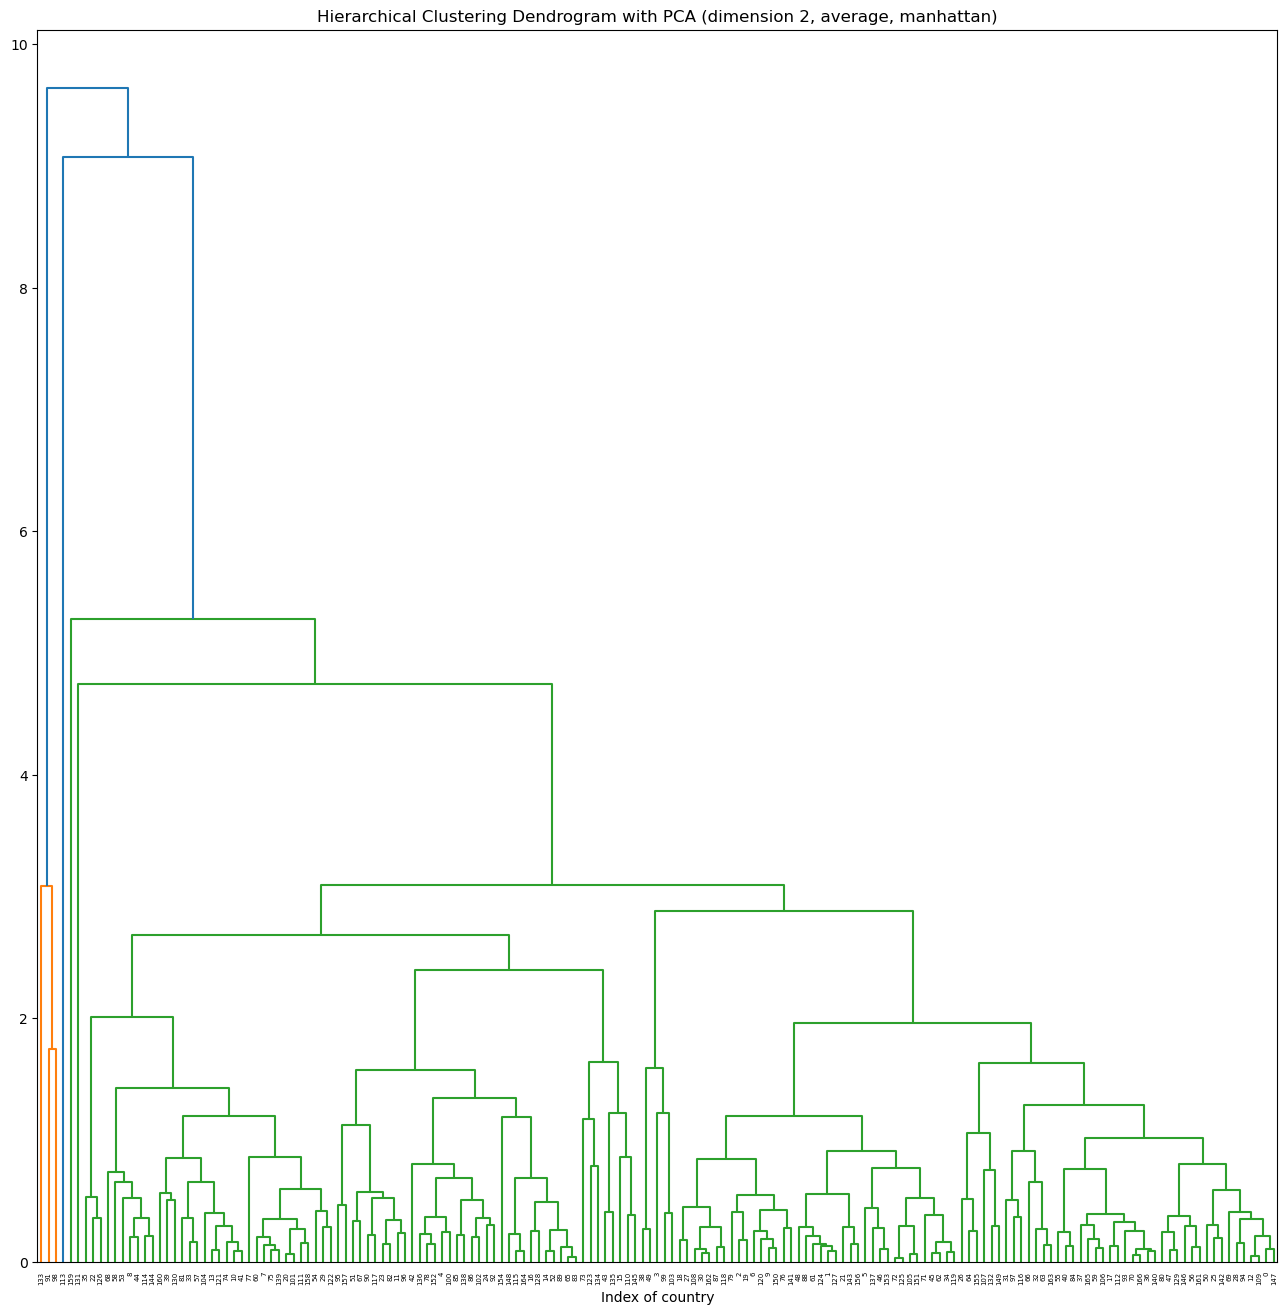

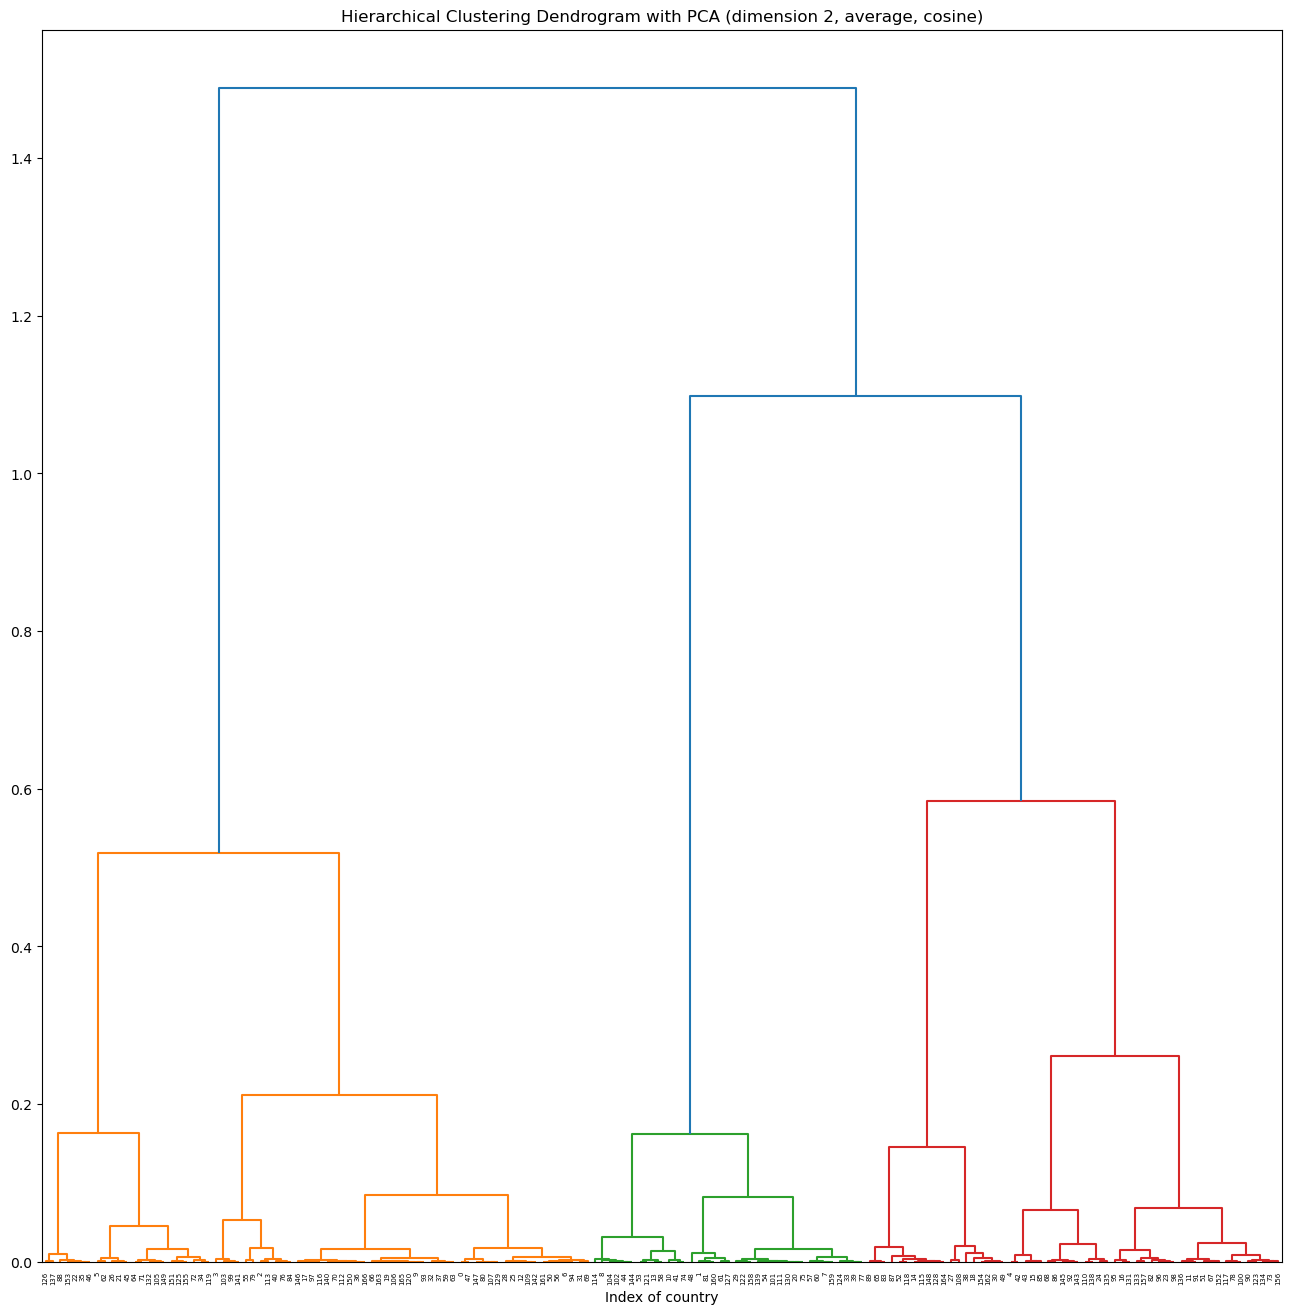

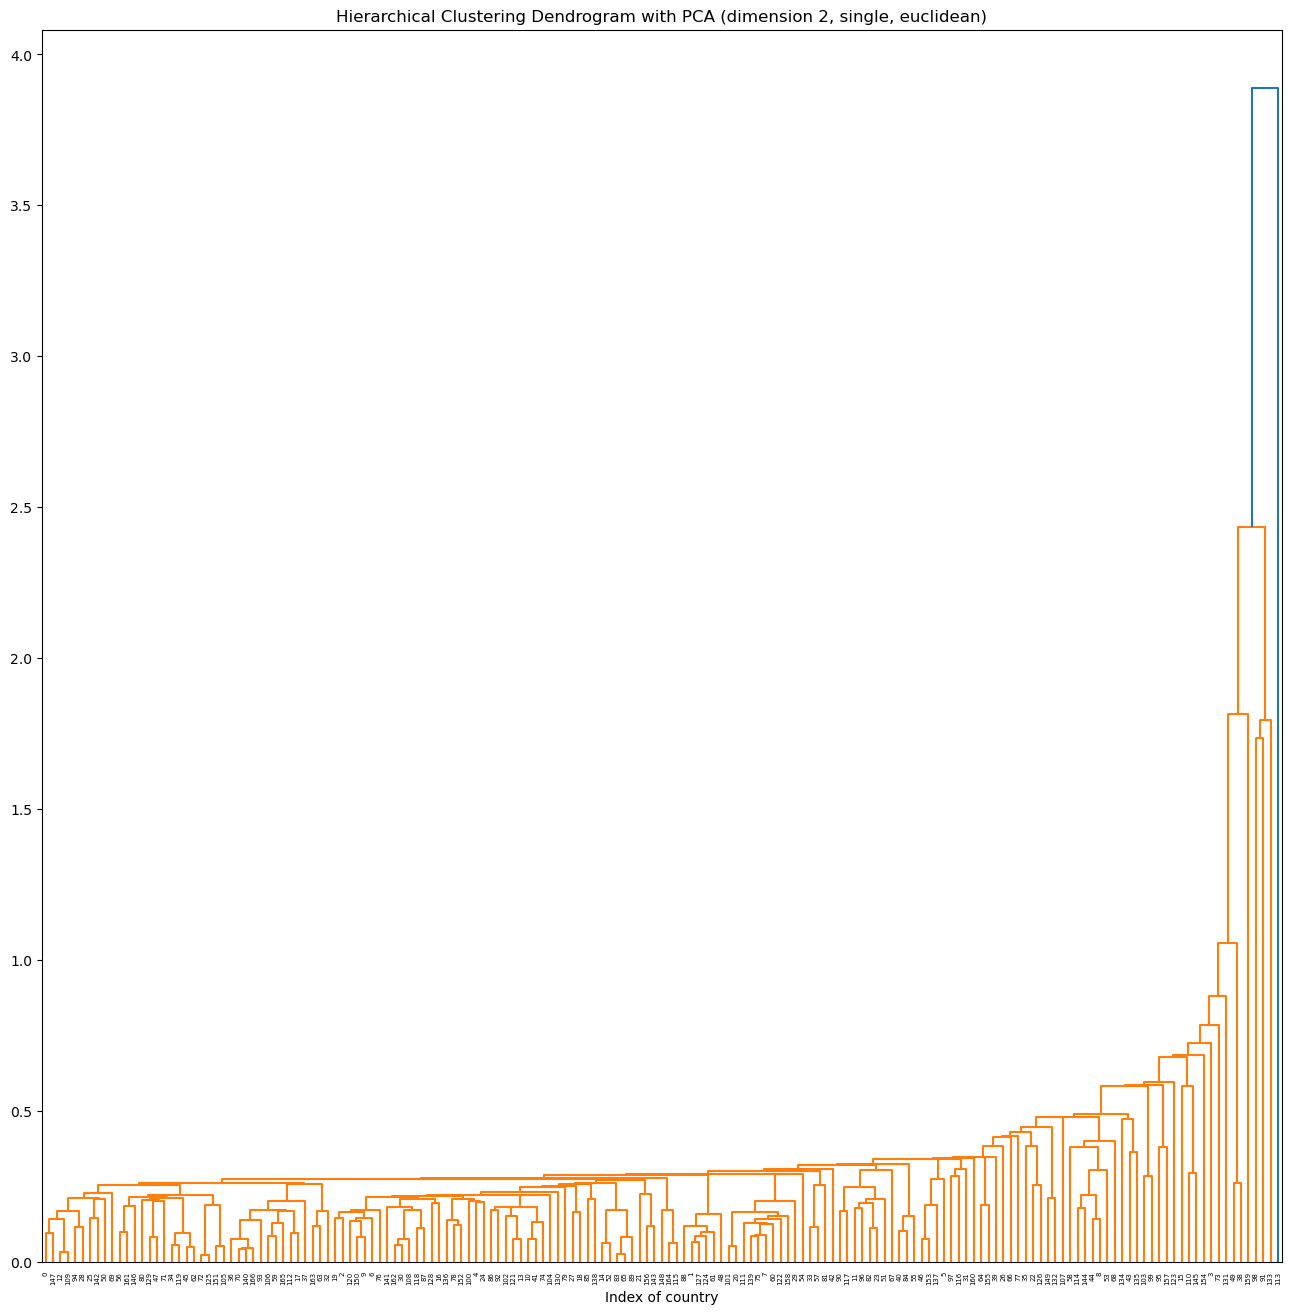

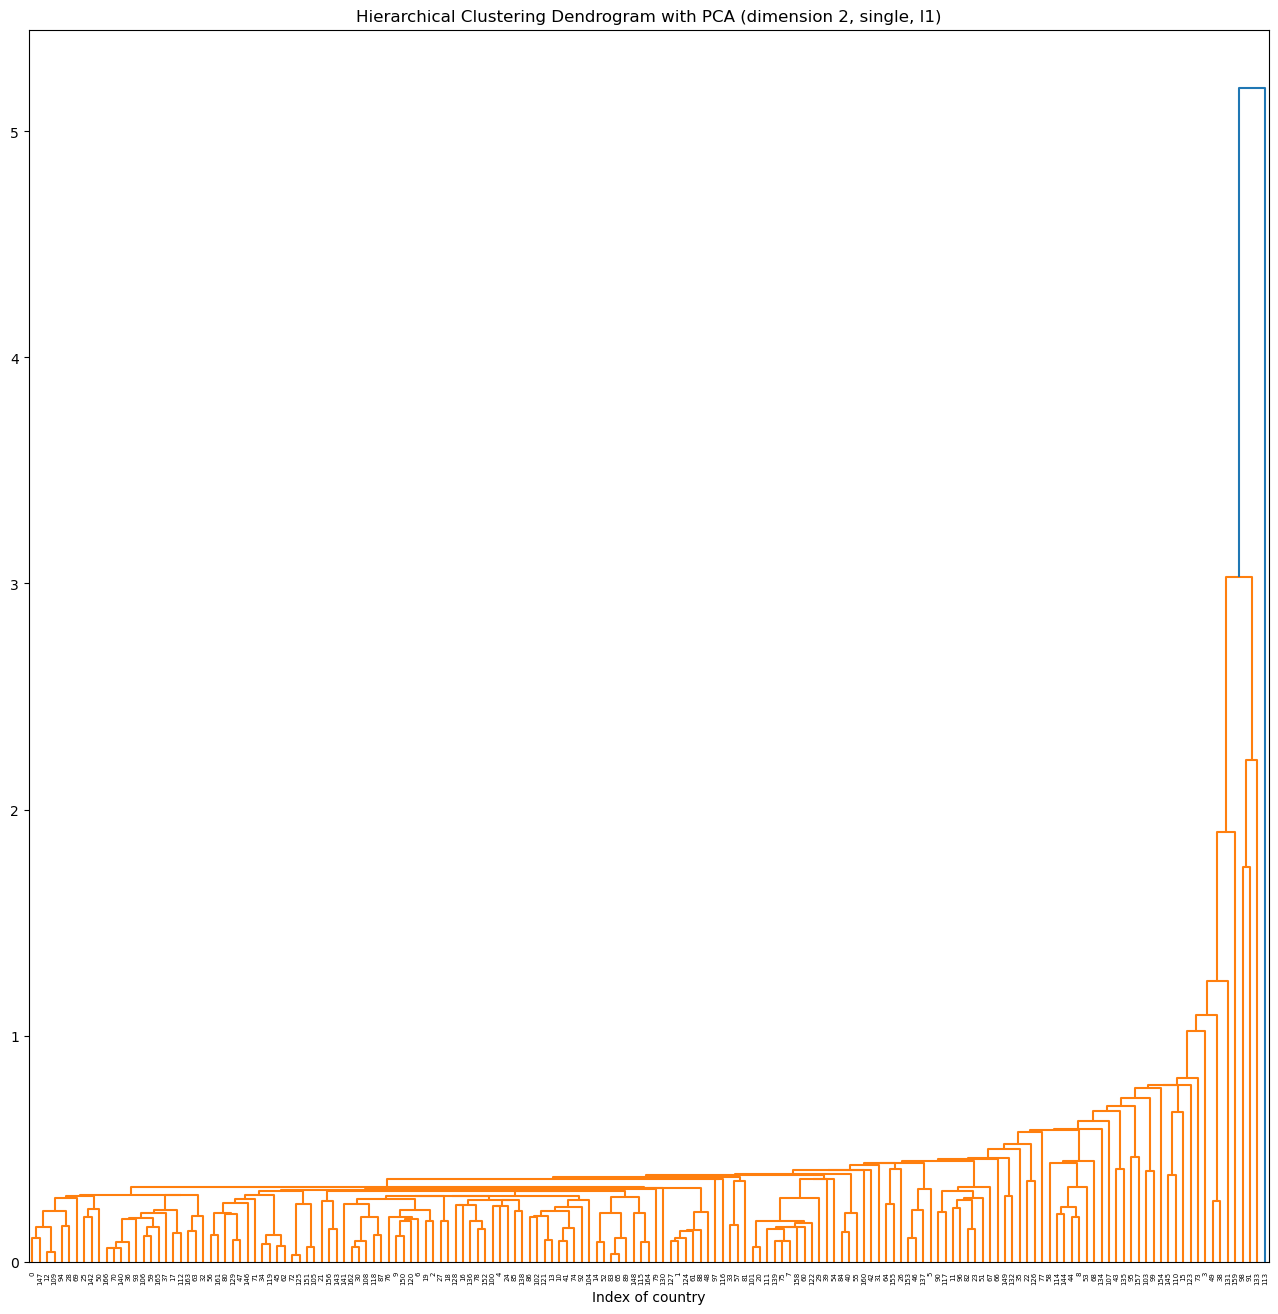

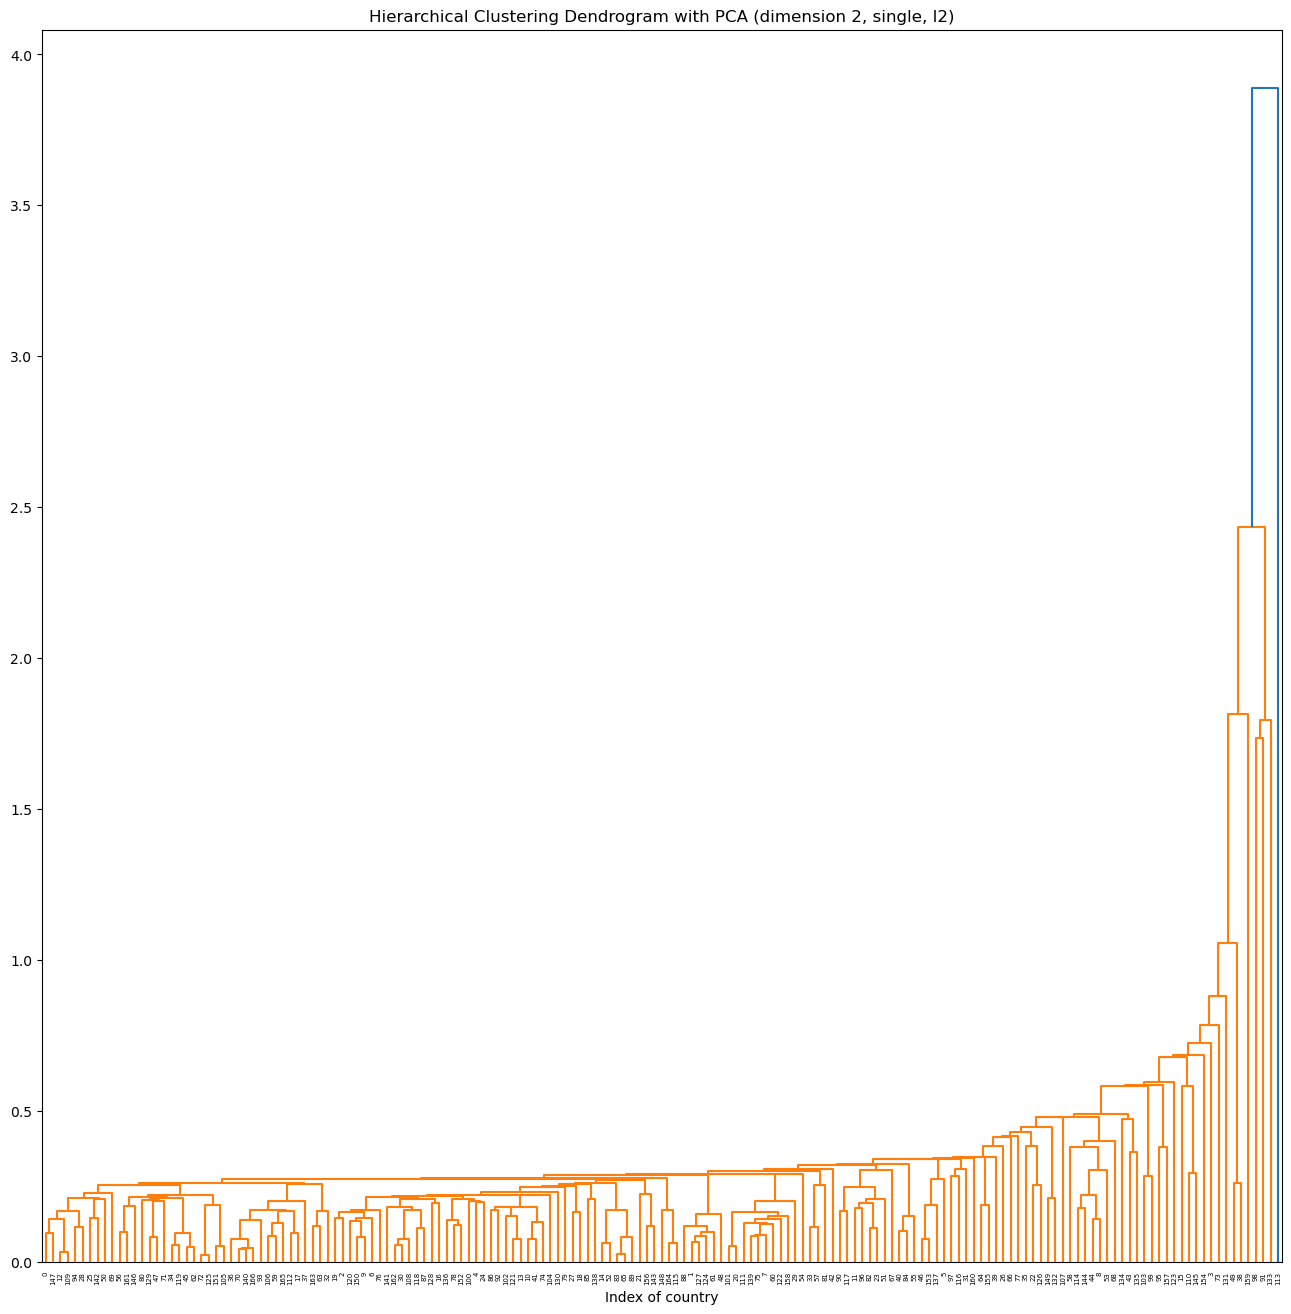

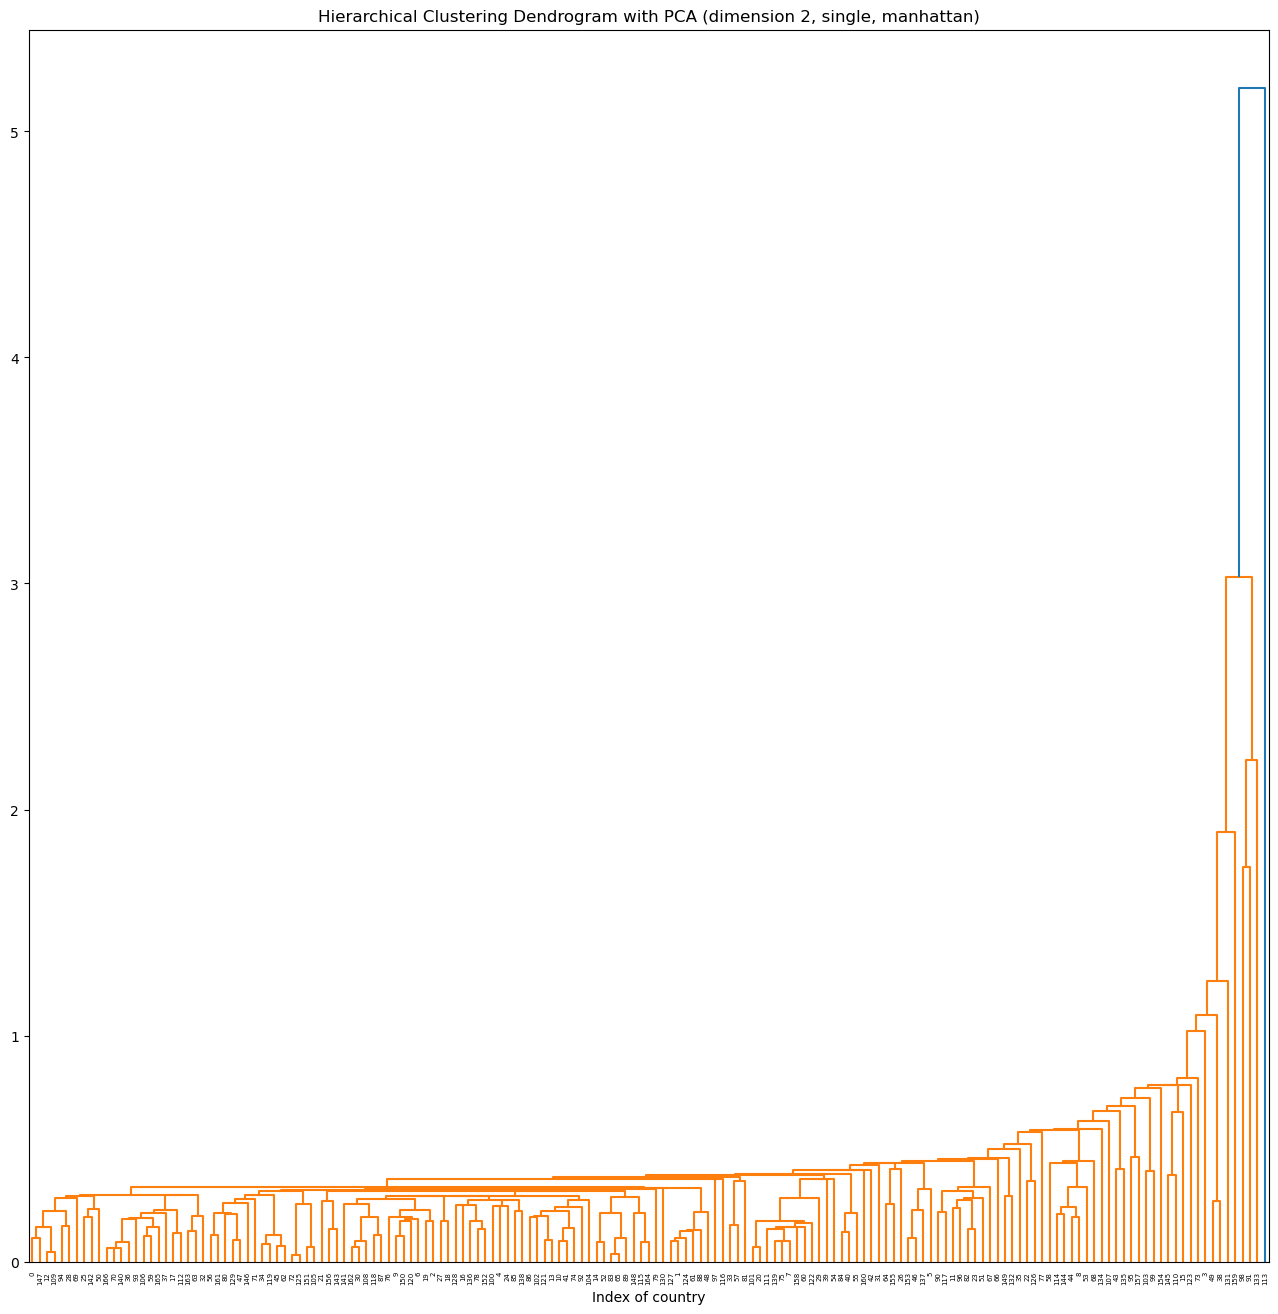

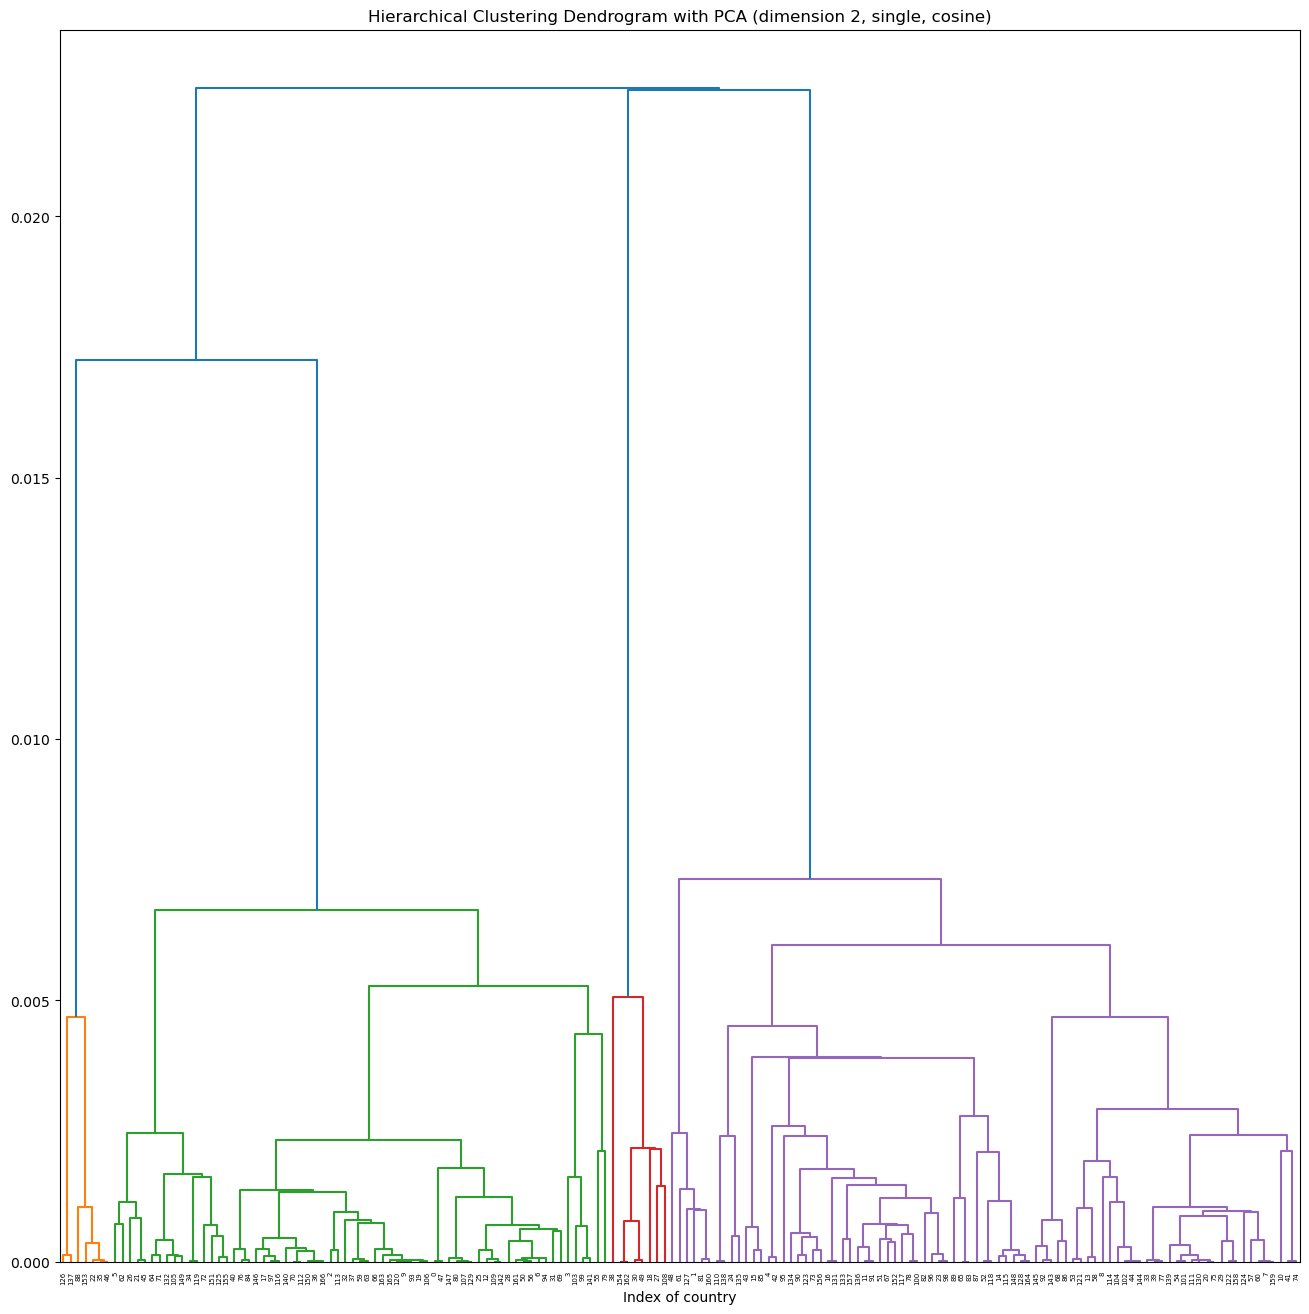

In [30]:
# dimension reduction with PCA (dimension 2)
pca_dim2 = PCA(n_components=2)
country_dim2 = pca_dim2.fit_transform(country)
print("Explained variance ratio: {}".format(pca_dim2.explained_variance_ratio_))

# hyperparameters for hierarchical clustering
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

for linkage in linkage_methods:
    for dm in distance_metrics:
        if linkage == "ward" and not (dm == "euclidean"):
            continue

        # hierarchical clustering
        model_h = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=linkage, metric=dm)
        model_h.fit(country_dim2)

        plt.figure(figsize=(16, 16))
        plt.title("Hierarchical Clustering Dendrogram with PCA (dimension 2, {}, {})".format(linkage, dm))
        # plot the top three levels of the dendrogram
        plot_dendrogram(model_h)
        plt.xlabel("Index of country")
        plt.show()

---
The results are pretty similar to that of Hierarchical Clustering without dimension reduction. It is shown that, in most combinations of linkage methods and distance metrics, the countries can be categorized into 3 groups. I choose the linkage method to be `complete` and the distance metric to be `l1`.

In [31]:
n_clusters = 3
linkage = 'complete'
metric = 'l1'

# hierarchical clustering
model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
model.fit(country_dim2)

groups = []
for i in range(n_clusters):
    groups.append([])
    
for i in range(len(model.labels_)):
    label = model.labels_[i]
    groups[label].append(country_names[i])

for i in range(n_clusters):
    print("Group {} contains: ".format(i))
    print(groups[i])
    print()
    display(country_original.loc[country_original['country'].isin(groups[i])].head())
    print()

Group 0 contains: 
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya'

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200



Group 1 contains: 
['Luxembourg', 'Malta', 'Singapore']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600



Group 2 contains: 
['Nigeria']



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330


---
The results of Hierarchical Clustering with dimension reduction are just the same as the previous one. Nigeria is also categorized into a single-element group. Luxembourg, Malta and Singapore are in another group, and these countries are in the best condition. And all the other countries are in the last group.

# Conclusion and Discussion

In the original data, there are some columns that are correlated. Three columns, life_expec, total_fer and gdpp, are dropped.

The range of values differ very much between different columns. So the values are standardized and then offset so that the transformed values are all non-negative and roughly in the same range.

I use two clustering methods, K-means Clustering and Hierarchical Clustering, to categorize the countries. The Clustering methods are performed on the original feature space, and on latent spaces of different dimensions obtained by PCA or NMF. According to the results, dimension reduction by PCA or NMF does not improve the performance. I think the reason is that the dimension of original data (after correlated columns are dropped) is 6 which is already small enough. 

All the results share a common piece: Nigeria can be categorized into a single-element group. Nigeria is a country with very high child mortality (130 death of children under 5 years of age per 1000 live births), inflation (104) and total fertiity rate (5.84 children that would be born to each woman), and low life expectation (60.5), GDP per capita (2330), exports of goods and services (25.3% of GDP per capita) and imports (17.4% of GDP per capita). It can be concluded that Nigeria is in the direst need of aid.

There is a three-element group that is frequently shown in the results. The group consists of Luxembourg, Malta and Singapore. These three countries are in the best condition.